<font size="8">  
    !---Exchange Rate Analysis---!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.ticker as ticker
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Load the Excel file
exchange_rate_file_path = 'Exchange Rates.xlsx'
excel_data = pd.ExcelFile(exchange_rate_file_path)

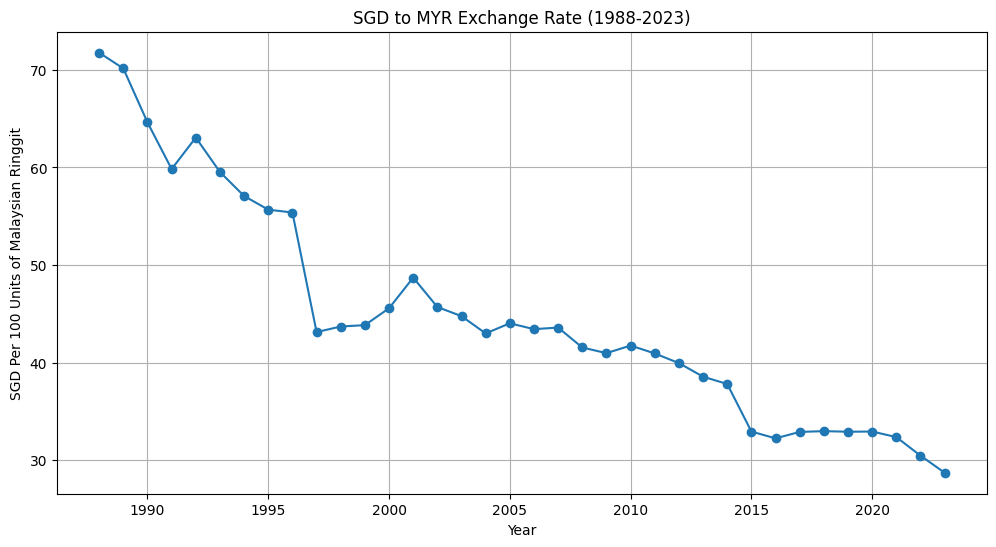

In [2]:
# Load the data from the "Exchange Rates" sheet
exchange_rates_data = pd.read_excel(excel_data, 'Exchange Rates')

# Clean and prepare the data for plotting
exchange_rates_cleaned = exchange_rates_data.iloc[6:].copy()  # Exclude the header rows
exchange_rates_cleaned.columns = ['Year', 'SGD_per_100_MYR']  # Rename columns for clarity
exchange_rates_cleaned['Year'] = pd.to_numeric(exchange_rates_cleaned['Year'], errors='coerce')
exchange_rates_cleaned['SGD_per_100_MYR'] = pd.to_numeric(exchange_rates_cleaned['SGD_per_100_MYR'], errors='coerce')

# Drop rows with NaN values
exchange_rates_cleaned.dropna(inplace=True)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(exchange_rates_cleaned['Year'], exchange_rates_cleaned['SGD_per_100_MYR'], marker='o', linestyle='-')
plt.title('SGD to MYR Exchange Rate (1988-2023)')
plt.xlabel('Year')
plt.ylabel('SGD Per 100 Units of Malaysian Ringgit')
plt.grid(True)

<font size="9">
    Start of EDA for currency exchange factors

<font size="6">  
    !---CPI Analysis---!

"The Consumer Price Index (CPI) is a broad measure of inflation within an economy in relation to the cost of goods and services. That figure can have a significant impact on the value of a currency in relation to the currencies of other nations"

https://www.investopedia.com/articles/forex/111015/how-cpi-affects-dollar-against-other-currencies.asp

In [3]:
# Load the Excel file for CPI data
cpi_file_path = 'CPI.xlsx'
cpi_excel_data = pd.ExcelFile(cpi_file_path)

# Correcting the syntax error and loading the CPI data
cpi_data = pd.read_excel(cpi_excel_data) #,'API_FP.CPI.TOTL_DS2_en_csv_v2_1'

# Display the first few rows of the dataframe to understand its structure and contents
cpi_data.head()

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Last Updated Date,2024-02-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2013.000000,2014.000000,2015.000000,2016.000000,2017.000000,2018.000000,2019.000000,2020.0,2021.0,2022.0
4,Aruba,ABW,Consumer price index (2010 = 100),FP.CPI.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,102.480876,102.912772,103.401365,102.438495,101.385139,105.061406,109.534355,NaN,NaN,NaN


In [4]:
# Setting the correct header and dropping unnecessary rows
cpi_data.columns = cpi_data.iloc[3]  # Setting the fourth row as the header
cpi_data = cpi_data[4:]  # Dropping the rows above the header

# Resetting index
cpi_data.reset_index(drop=True, inplace=True)

# Dropping the '2010' column to exclude data for the year 2010
cpi_data.drop(columns=[2010], inplace=True)

# Filter for Singapore and Malaysia
cpi_singapore_malaysia = cpi_data[(cpi_data['Country Name'] == 'Singapore') | (cpi_data['Country Name'] == 'Malaysia')]

# Displaying the filtered data
cpi_singapore_malaysia.head()

3,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0
169,Malaysia,MYS,Consumer price index (2010 = 100),FP.CPI.TOTL,21.309241,21.270798,21.293864,21.955092,21.866672,21.843606,...,107.098817,110.464923,112.789535,115.147475,119.605066,120.663223,121.463089,120.079987,123.054491,127.212131
208,Singapore,SGP,Consumer price index (2010 = 100),FP.CPI.TOTL,27.519175,27.629252,27.745179,28.357015,28.846484,28.898007,...,112.659477,113.814403,113.219589,112.616956,113.265923,113.762730,114.405786,114.197663,116.829758,123.980978


The data for 2010 is excluded, as it was not recorded and set as '100'

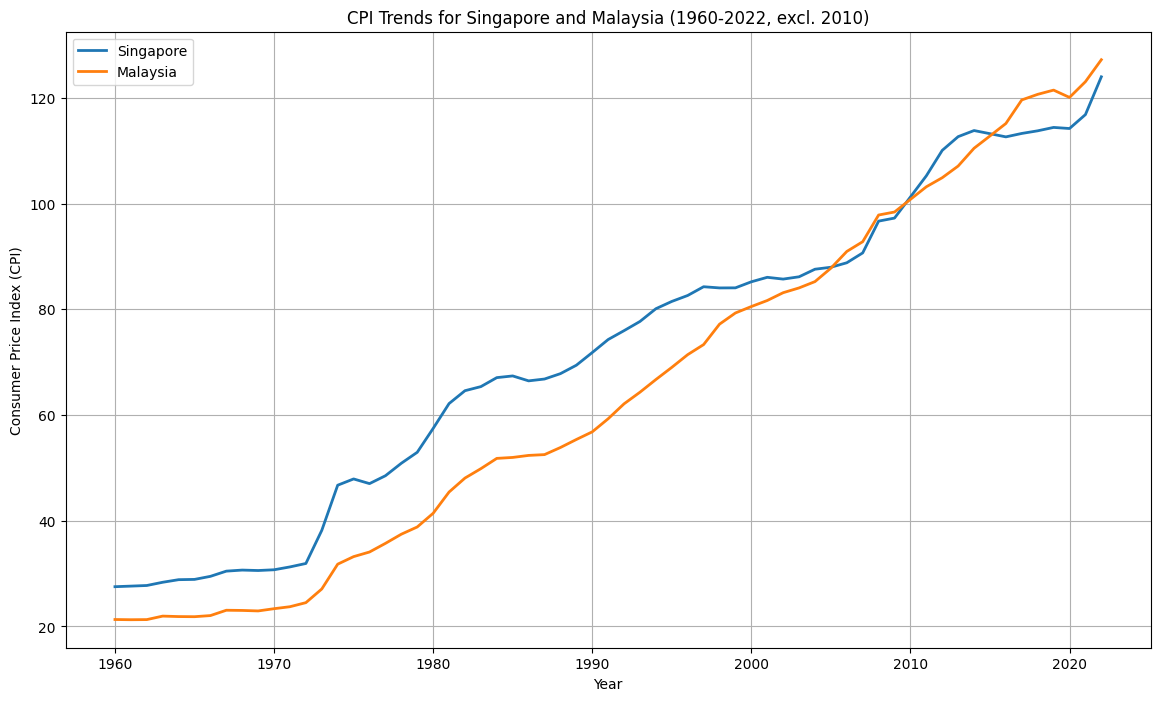

In [5]:
# Converting year columns to numeric and pivoting the dataframe for easier plotting
cpi_long_format = cpi_singapore_malaysia.melt(id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"], 
                                              var_name="Year", value_name="CPI")

# Converting 'Year' to numeric for plotting
cpi_long_format['Year'] = pd.to_numeric(cpi_long_format['Year'])

# Plotting CPI trends for Singapore and Malaysia
plt.figure(figsize=(14, 8))
for country in ['Singapore', 'Malaysia']:
    country_data = cpi_long_format[cpi_long_format['Country Name'] == country]
    plt.plot(country_data['Year'], country_data['CPI'], marker='', linewidth=2, label=country)

plt.title('CPI Trends for Singapore and Malaysia (1960-2022, excl. 2010)')
plt.xlabel('Year')
plt.ylabel('Consumer Price Index (CPI)')
plt.legend()
plt.grid(True)
plt.show()

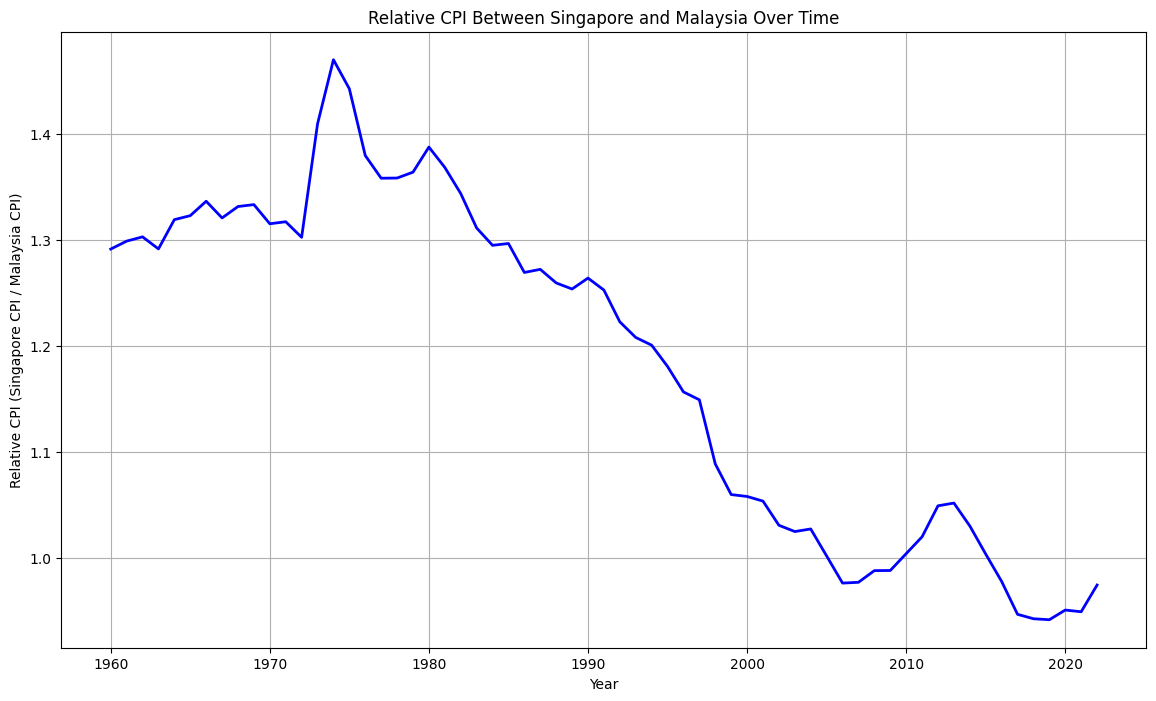

,Year,Relative_CPI
0,1960.0,1.291420
1,1961.0,1.298929
2,1962.0,1.302966
3,1963.0,1.291592
4,1964.0,1.319199


In [6]:
# Calculating Relative CPI between Singapore and Malaysia for each available year
# Relative CPI is calculated as CPI_Singapore / CPI_Malaysia

# Isolating CPI data for Singapore and Malaysia
cpi_sg = cpi_long_format[cpi_long_format['Country Name'] == 'Singapore'].set_index('Year')['CPI']
cpi_my = cpi_long_format[cpi_long_format['Country Name'] == 'Malaysia'].set_index('Year')['CPI']

# Calculating Relative CPI
relative_cpi = cpi_sg / cpi_my

# Preparing data for a simple analysis or visualization
relative_cpi_df = relative_cpi.reset_index()
relative_cpi_df.columns = ['Year', 'Relative_CPI']

# Plotting the Relative CPI over time
plt.figure(figsize=(14, 8))
plt.plot(relative_cpi_df['Year'], relative_cpi_df['Relative_CPI'], marker='', color='blue', linewidth=2)
plt.title('Relative CPI Between Singapore and Malaysia Over Time')
plt.xlabel('Year')
plt.ylabel('Relative CPI (Singapore CPI / Malaysia CPI)')
plt.grid(True)
plt.show()

# Display the first few rows to verify numbers match the datasheet
relative_cpi_df.head()

The graph shows the trend of the Relative Consumer Price Index (CPI) between Singapore and Malaysia over time. A Relative CPI greater than one indicates that, on average, prices (as measured by CPI) are higher in Singapore compared to Malaysia for the given year, and vice versa for values less than one. Here are a few observations:

Overall Trend: The general trend over the years is a decline in Singapore's relative CPI compared to Malaysia, indicating that, relative to Malaysia, the cost of living in Singapore has been decreasing over the period shown. It started at a relative CPI of around 1.3 and ended up closer to 0.8 in the recent years.

Fluctuations: The line graph shows various fluctuations throughout the decades. The most significant spike is observed around the 1970s where the relative CPI peaks at nearly 1.4 before declining sharply. This could suggest a period of inflation in Singapore relative to Malaysia or deflation in Malaysia relative to Singapore.

Recent Years: In the most recent years on the graph, there appears to be a slight upward trend after a period of decline. This could indicate that either Singapore's inflation rate has been increasing relative to Malaysia's, or that there have been recent economic events that have affected the CPI of one or both countries.

In [7]:
# We'll focus on years up to 2019 for training, and use 2020-2023 for testing our predictions

# Preparing exchange rate data for merge
exchange_rates_sg_my = exchange_rates_cleaned[['Year', 'SGD_per_100_MYR']].copy()
exchange_rates_sg_my['Year'] = pd.to_numeric(exchange_rates_sg_my['Year'])

# Merging CPI and exchange rate data on Year
merged_data_cpi = pd.merge(left=relative_cpi_df, right=exchange_rates_sg_my, on='Year', how='inner')

# Splitting the dataset into training and testing sets
# Training set: Years up to 2019
# Testing set: Years 2020-2023
train_data_cpi = merged_data_cpi[merged_data_cpi['Year'] <= 2019]
test_data_cpi = merged_data_cpi[(merged_data_cpi['Year'] >= 2020) & (merged_data_cpi['Year'] <= 2023)]

# Checking the final structure of our training and testing datasets
train_data_cpi.tail(), test_data_cpi.head()


(      Year  Relative_CPI  SGD_per_100_MYR
 26  2015.0      1.003813            32.94
 27  2016.0      0.978024            32.24
 28  2017.0      0.946999            32.90
 29  2018.0      0.942812            32.98
 30  2019.0      0.941898            32.92,
       Year  Relative_CPI  SGD_per_100_MYR
 31  2020.0      0.951013            32.94
 32  2021.0      0.949415            32.37
 33  2022.0      0.974600            30.47)

RMSE: 3.9408857715128


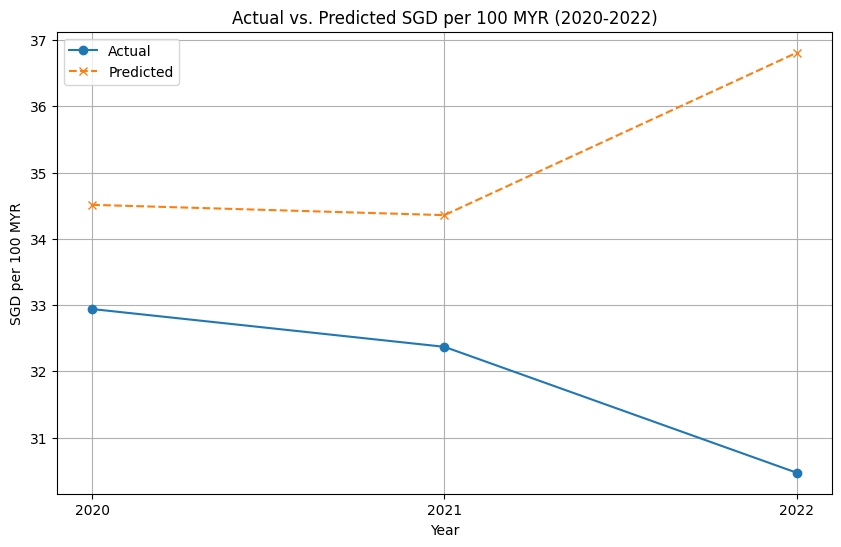

In [8]:
# Initializing the linear regression model
model_cpi = LinearRegression()

# Training the model
X_train_cpi = train_data_cpi[['Relative_CPI']]
y_train_cpi = train_data_cpi['SGD_per_100_MYR']
model_cpi.fit(X_train_cpi, y_train_cpi)

# Making predictions for the test set
X_test_cpi = test_data_cpi[['Relative_CPI']]
y_test_cpi = test_data_cpi['SGD_per_100_MYR']
predictions_cpi = model_cpi.predict(X_test_cpi)

# Calculating error metrics
mae_cpi = mean_absolute_error(y_test_cpi, predictions_cpi)
rmse_cpi = np.sqrt(mean_squared_error(y_test_cpi, predictions_cpi))
print(f"RMSE: {rmse_cpi}")

# Displaying predictions and error metrics
predictions_cpi_df = test_data_cpi.copy()
predictions_cpi_df['Predicted_SGD_per_100_MYR'] = predictions_cpi
predictions_cpi_df[['Year', 'SGD_per_100_MYR', 'Predicted_SGD_per_100_MYR']], mae_cpi, rmse_cpi

# Plotting actual vs. predicted exchange rates for 2020-2022
plt.figure(figsize=(10, 6))
plt.plot(predictions_cpi_df['Year'], predictions_cpi_df['SGD_per_100_MYR'], label='Actual', marker='o')
plt.plot(predictions_cpi_df['Year'], predictions_cpi_df['Predicted_SGD_per_100_MYR'], label='Predicted', marker='x', linestyle='--')

plt.title('Actual vs. Predicted SGD per 100 MYR (2020-2022)')
plt.xlabel('Year')
plt.ylabel('SGD per 100 MYR')
plt.xticks(predictions_cpi_df['Year'])
plt.legend()
plt.grid(True)


<font size="6">  
    !---GDP Analysis---!

" The GDP of a country is a representation of the dollar value of goods and services that have been produced within that country, generally over the span of one year. The GDP may also be thought of as the basic size of the country's economy.

Changes in the GDP reveal changes in economic growth and can directly impact the relative value of a country’s currency. A high GDP reflects larger production rates, an indication of greater demand for that country's products. An increase in demand for a country's goods and services often translates into increased demand for the country's currency. "

https://www.investopedia.com/ask/answers/021715/what-economic-indicators-are-most-used-when-forecasting-exchange-rate.asp

In [9]:
# Load the GDP data
gdp_file_path = 'GDP.xlsx'
gdp_data = pd.read_excel(gdp_file_path)

# Display the first few rows of the dataframe
gdp_data.head()

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Last Updated Date,2024-02-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2.013000e+03,2.014000e+03,2.015000e+03,2.016000e+03,2.017000e+03,2.018000e+03,2.019000e+03,2.020000e+03,2.021000e+03,2.022000e+03
4,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.727850e+09,2.790850e+09,2.962907e+09,2.983635e+09,3.092429e+09,3.276184e+09,3.395799e+09,2.558906e+09,3.103184e+09,3.544708e+09


In [10]:
# Setting the correct header and dropping unnecessary rows
gdp_data.columns = gdp_data.iloc[3]  # Setting the fourth row as the header
gdp_data = gdp_data[4:]  # Dropping the rows above the header

# Resetting index
gdp_data.reset_index(drop=True, inplace=True)

# Filter for Singapore and Malaysia GDP data
gdp_singapore_malaysia = gdp_data[(gdp_data['Country Name'] == 'Singapore') | (gdp_data['Country Name'] == 'Malaysia')]

# Dropping unnecessary columns to focus on the years
gdp_singapore_malaysia = gdp_singapore_malaysia.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code'])

# Melting the dataframe to have one row per year per country
gdp_singapore_malaysia_melted = gdp_singapore_malaysia.melt(id_vars=['Country Name'], var_name='Year', value_name='GDP')

# Converting 'Year' to numeric for further processing
gdp_singapore_malaysia_melted['Year'] = pd.to_numeric(gdp_singapore_malaysia_melted['Year'])

# Display the prepared data for a quick review
gdp_singapore_malaysia_melted.head()


,Country Name,Year,GDP
0,Malaysia,1960.0,1.916229e+09
1,Singapore,1960.0,7.047517e+08
2,Malaysia,1961.0,1.901856e+09
3,Singapore,1961.0,7.646298e+08
4,Malaysia,1962.0,2.001490e+09


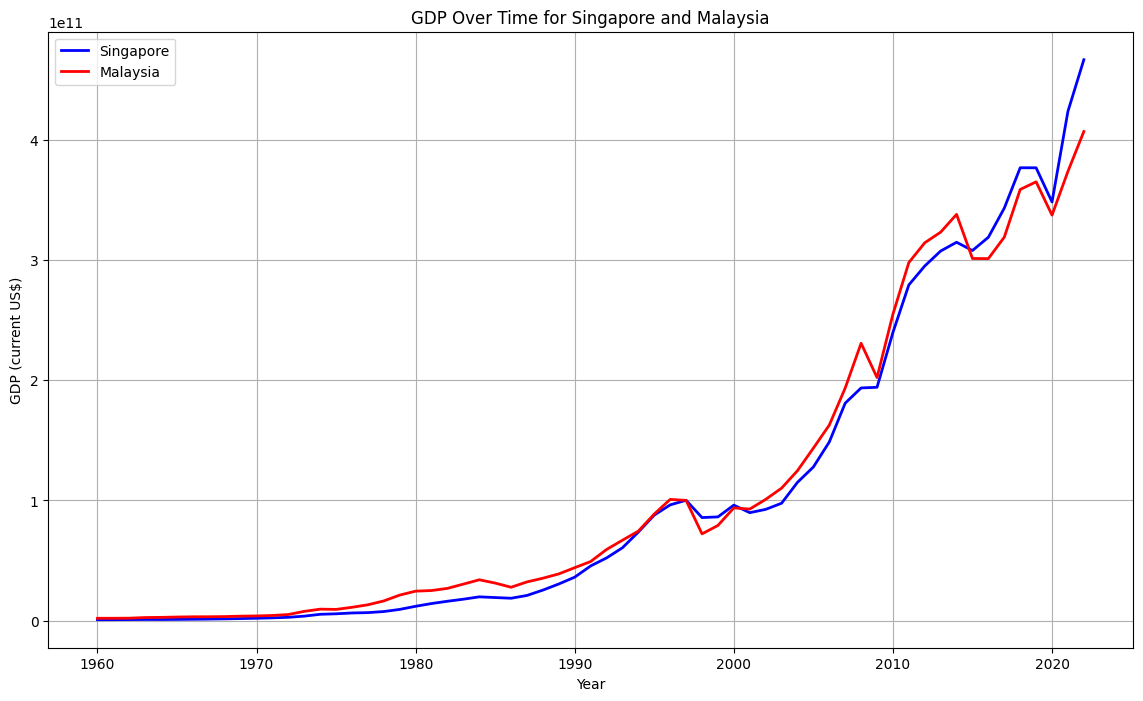

In [11]:
# To merge, we first need to ensure the GDP data is in a suitable format for merging with our exchange rate data
# We'll pivot the GDP data so we have one row per year, with separate columns for Singapore and Malaysia GDP

# Pivoting the GDP data
gdp_pivoted = gdp_singapore_malaysia_melted.pivot(index='Year', columns='Country Name', values='GDP').reset_index()

# Renaming the columns for clarity
gdp_pivoted.columns = ['Year', 'GDP_Malaysia', 'GDP_Singapore']

# Plotting the GDP for Singapore and Malaysia over time for the available years in our dataset
plt.figure(figsize=(14, 8))

# Singapore
plt.plot(gdp_pivoted['Year'], gdp_pivoted['GDP_Singapore'], label='Singapore', marker='', color='blue', linewidth=2)

# Malaysia
plt.plot(gdp_pivoted['Year'], gdp_pivoted['GDP_Malaysia'], label='Malaysia', marker='', color='red', linewidth=2)

plt.title('GDP Over Time for Singapore and Malaysia')
plt.xlabel('Year')
plt.ylabel('GDP (current US$)')
plt.legend()
plt.grid(True)
plt.show()

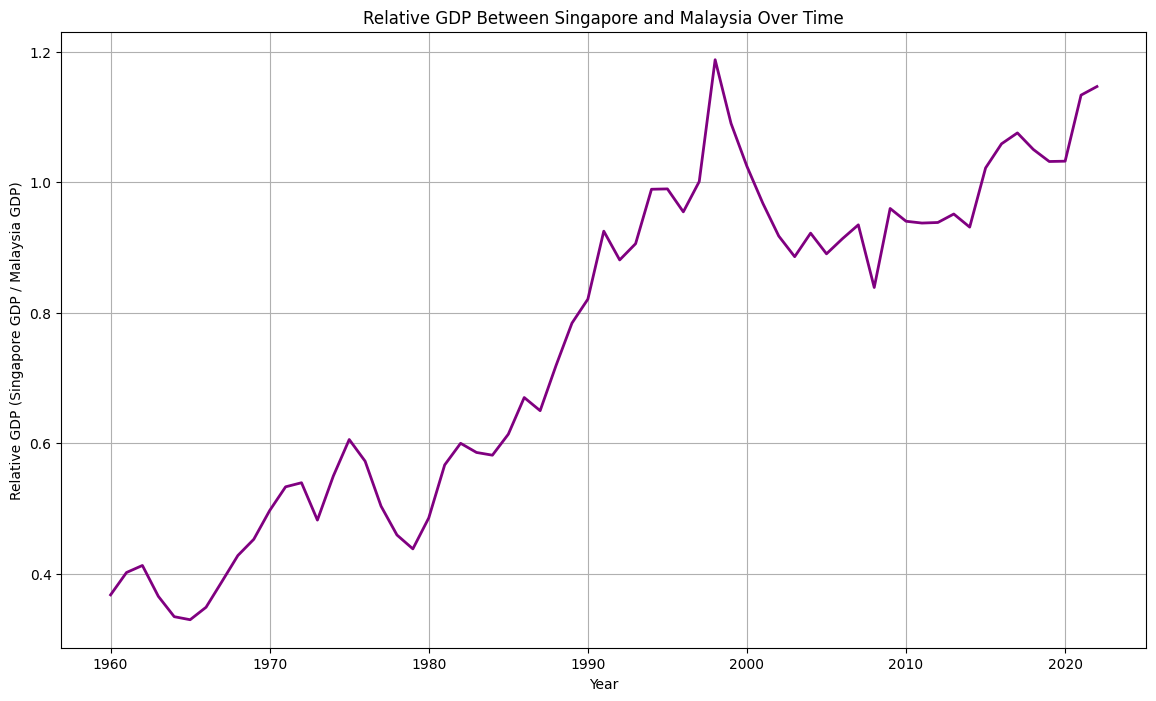

In [12]:
# Calculating Relative GDP between Singapore and Malaysia for each available year
# Relative GDP is calculated as GDP_Singapore / GDP_Malaysia

# Using the gdp_pivoted dataframe which already has GDP data for both countries
relative_gdp = gdp_pivoted['GDP_Singapore'] / gdp_pivoted['GDP_Malaysia']

# Preparing data for visualization
relative_gdp_df = gdp_pivoted[['Year']].copy()
relative_gdp_df['Relative_GDP'] = relative_gdp

# Plotting the Relative GDP over time
plt.figure(figsize=(14, 8))
plt.plot(relative_gdp_df['Year'], relative_gdp_df['Relative_GDP'], marker='', color='purple', linewidth=2)
plt.title('Relative GDP Between Singapore and Malaysia Over Time')
plt.xlabel('Year')
plt.ylabel('Relative GDP (Singapore GDP / Malaysia GDP)')
plt.grid(True)
plt.show()


The graph illustrates the Relative GDP between Singapore and Malaysia over time, calculated as the ratio of Singapore's GDP to Malaysia's GDP.

Key observations from the graph:

Overall Trend: The Relative GDP shows an upward trend, indicating that Singapore's economy has been growing at a higher pace relative to Malaysia's, reflected in the increasing ratio.

Economic Dynamics: The rising trend in the Relative GDP suggests that, over the years, Singapore's GDP has grown faster than Malaysia's in relative terms, which could be attributed to economic policies, industrial growth, and development strategies.

Fluctuations: While the overall trend is upward, there are fluctuations in the Relative GDP ratio, which may correspond to specific economic events, policy changes, or external economic factors affecting one country more than the other.

RMSE: 8.750718127536782


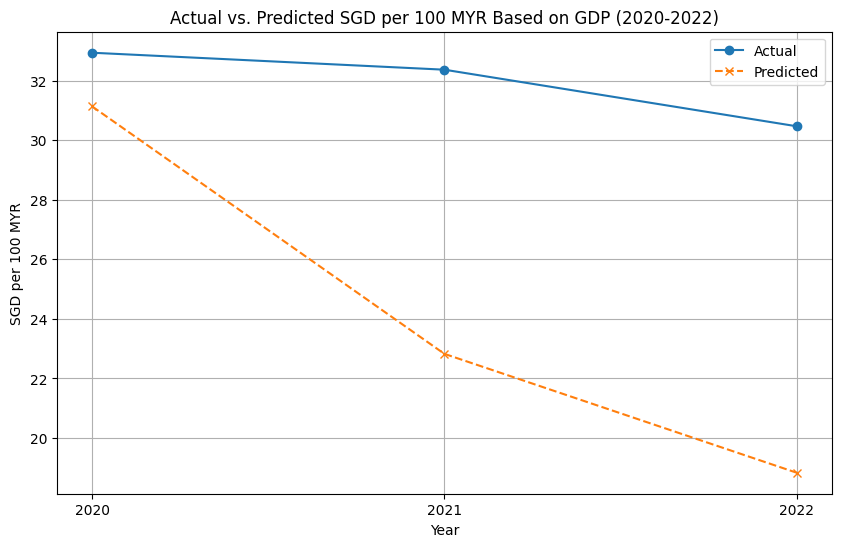

In [13]:
# Merging the GDP data with the exchange rate data on 'Year'
merged_data_gdp = pd.merge(left=gdp_pivoted, right=exchange_rates_sg_my, on='Year', how='inner')

# Excluding the year 2010 if it's present
#merged_data_gdp = merged_data_gdp[merged_data_gdp['Year'] != 2010]

# Splitting the dataset into training and testing sets again
# Training set: Years up to 2019
# Testing set: Years 2020-2023
train_data_gdp = merged_data_gdp[merged_data_gdp['Year'] <= 2019]
test_data_gdp = merged_data_gdp[(merged_data_gdp['Year'] >= 2020) & (merged_data_gdp['Year'] <= 2023)]

# Verifying the structure of the training set
train_data_gdp.tail(), test_data_gdp.head()

# Initializing the linear regression model for GDP data
model_gdp = LinearRegression()

# Training the model with GDP data from both countries as predictors
X_train_gdp = train_data_gdp[['GDP_Malaysia', 'GDP_Singapore']]
y_train_gdp = train_data_gdp['SGD_per_100_MYR']
model_gdp.fit(X_train_gdp, y_train_gdp)

# Making predictions for the test set
X_test_gdp = test_data_gdp[['GDP_Malaysia', 'GDP_Singapore']]
y_test_gdp = test_data_gdp['SGD_per_100_MYR']
predictions_gdp = model_gdp.predict(X_test_gdp)

# Calculating error metrics for GDP-based predictions
mae_gdp = mean_absolute_error(y_test_gdp, predictions_gdp)
rmse_gdp = np.sqrt(mean_squared_error(y_test_gdp, predictions_gdp))
print(f"RMSE: {rmse_gdp}")

# Displaying predictions and error metrics for GDP
predictions_gdp_df = test_data_gdp.copy()
predictions_gdp_df['Predicted_SGD_per_100_MYR'] = predictions_gdp
predictions_gdp_df[['Year', 'SGD_per_100_MYR', 'Predicted_SGD_per_100_MYR']]

# Plotting actual vs. predicted exchange rates for 2020-2022 based on GDP
plt.figure(figsize=(10, 6))
plt.plot(predictions_gdp_df['Year'], predictions_gdp_df['SGD_per_100_MYR'], label='Actual', marker='o')
plt.plot(predictions_gdp_df['Year'], predictions_gdp_df['Predicted_SGD_per_100_MYR'], label='Predicted', marker='x', linestyle='--')

plt.title('Actual vs. Predicted SGD per 100 MYR Based on GDP (2020-2022)')
plt.xlabel('Year')
plt.ylabel('SGD per 100 MYR')
plt.xticks(predictions_gdp_df['Year'])
plt.legend()
plt.grid(True)

<font size="6">  
    !---Employment to Population Rate Analysis---! 

" Unemployment rates have an important yet indirect connection with the forex market. High unemployment signals economic distress, potentially weakening a nation’s currency. Conversely, low unemployment suggests a robust economy and a stronger currency. "

https://blueberrymarkets.com/market-analysis/news/how-unemployment-rates-affect-the-forex-market/

In [14]:
# Load the Employment to Population Rate data
employment_file_path = 'Employment to Population Rate.xlsx'
employment_data = pd.read_excel(employment_file_path)

# Display the first few rows of the dataframe
employment_data.head()


,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Last Updated Date,2024-02-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0
4,Aruba,ABW,"Employment to population ratio, 15+, total (%)...",SL.EMP.TOTL.SP.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Setting the correct header and dropping unnecessary rows
employment_data.columns = employment_data.iloc[3]  # Setting the fourth row as the header
employment_data = employment_data[4:]  # Dropping the rows above the header

# Resetting index
employment_data.reset_index(drop=True, inplace=True)

# Filter for Singapore and Malaysia Employment to Population Rate data
employment_sg_my = employment_data[(employment_data['Country Name'] == 'Singapore') | (employment_data['Country Name'] == 'Malaysia')]

# Dropping unnecessary columns to focus on the years
employment_sg_my = employment_sg_my.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code'])

# Melting the dataframe to have one row per year per country
employment_sg_my_melted = employment_sg_my.melt(id_vars=['Country Name'], var_name='Year', value_name='Employment_to_Population_Rate')

# Converting 'Year' to numeric for further processing
employment_sg_my_melted['Year'] = pd.to_numeric(employment_sg_my_melted['Year'])

# Display the prepared data
employment_sg_my_melted.head()


,Country Name,Year,Employment_to_Population_Rate
0,Malaysia,1960.0,NaN
1,Singapore,1960.0,NaN
2,Malaysia,1961.0,NaN
3,Singapore,1961.0,NaN
4,Malaysia,1962.0,NaN


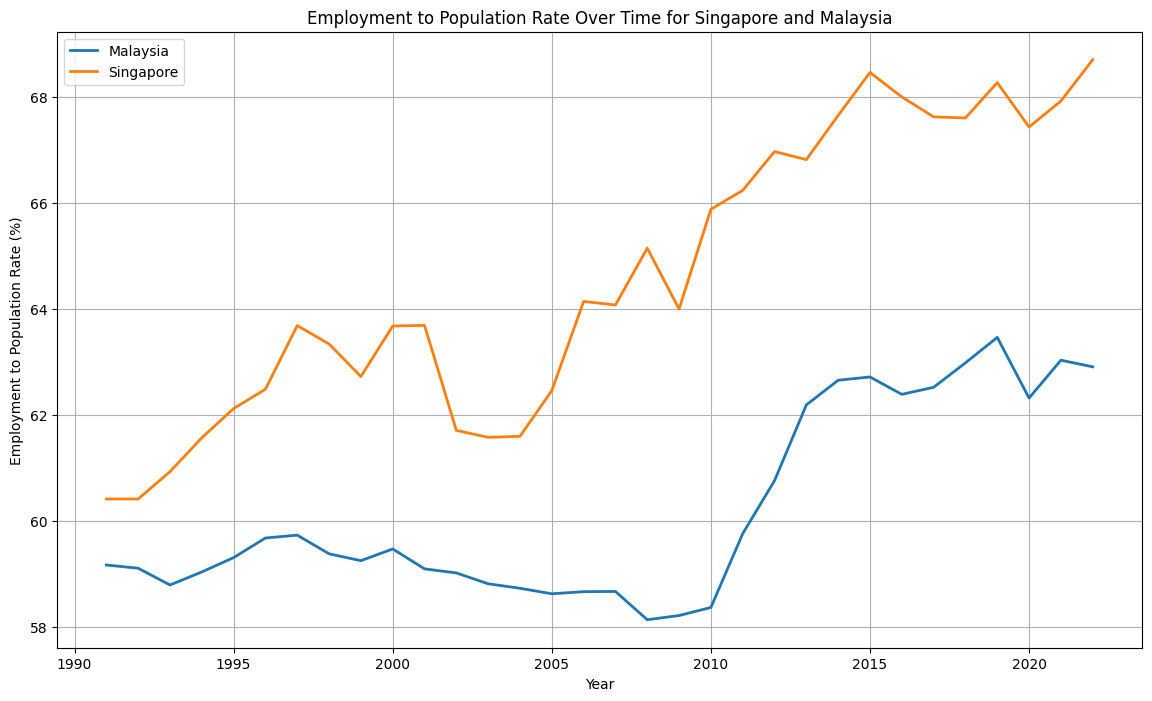

In [16]:
# Filtering out rows with NaN values in Employment to Population Rate for clearer visualization
employment_sg_my_filtered = employment_sg_my_melted.dropna(subset=['Employment_to_Population_Rate'])

# Plotting the Employment to Population Rate for Singapore and Malaysia over time
plt.figure(figsize=(14, 8))

# Loop through each country and plot their Employment to Population Rate
for country in employment_sg_my_filtered['Country Name'].unique():
    country_data = employment_sg_my_filtered[employment_sg_my_filtered['Country Name'] == country]
    plt.plot(country_data['Year'], country_data['Employment_to_Population_Rate'], marker='', linewidth=2, label=country)

plt.title('Employment to Population Rate Over Time for Singapore and Malaysia')
plt.xlabel('Year')
plt.ylabel('Employment to Population Rate (%)')
plt.legend()
plt.grid(True)

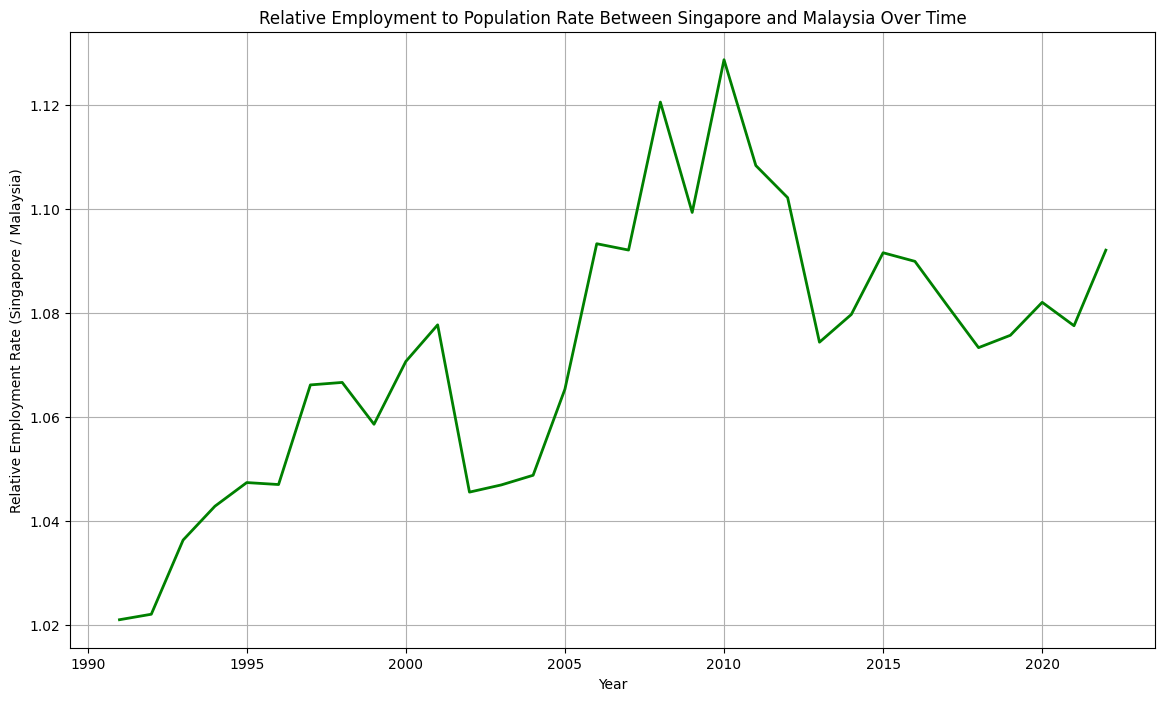

In [17]:
# Calculating Relative Employment to Population Rate between Singapore and Malaysia for each available year
# Relative Employment Rate is calculated as Employment Rate of Singapore / Employment Rate of Malaysia

# Since the data is already melted and filtered, we'll prepare it for merging by pivoting
employment_pivoted = employment_sg_my_filtered.pivot(index='Year', columns='Country Name', values='Employment_to_Population_Rate').reset_index()

# Renaming columns for clarity
employment_pivoted.columns = ['Year', 'Employment_to_Population_Rate_Malaysia', 'Employment_to_Population_Rate_Singapore']

# Using the employment_pivoted dataframe which already has Employment to Population Rate data for both countries
relative_employment_rate = employment_pivoted['Employment_to_Population_Rate_Singapore'] / employment_pivoted['Employment_to_Population_Rate_Malaysia']

# Preparing data for visualization
relative_employment_rate_df = employment_pivoted[['Year']].copy()
relative_employment_rate_df['Relative_Employment_Rate'] = relative_employment_rate

# Plotting the Relative Employment Rate over time
plt.figure(figsize=(14, 8))
plt.plot(relative_employment_rate_df['Year'], relative_employment_rate_df['Relative_Employment_Rate'], marker='', color='green', linewidth=2)
plt.title('Relative Employment to Population Rate Between Singapore and Malaysia Over Time')
plt.xlabel('Year')
plt.ylabel('Relative Employment Rate (Singapore / Malaysia)')
plt.grid(True)
plt.show()


The graph displays the Relative Employment to Population Rate between Singapore and Malaysia over time, calculated as the ratio of Singapore's Employment to Population Rate to Malaysia's.

Key observations include:

Trend: The Relative Employment Rate shows variations over time, reflecting differences in labor market conditions, economic policies, and possibly demographic factors affecting employment in Singapore and Malaysia.

Relative Positioning: The ratio suggests that, on average, Singapore's Employment to Population Rate relative to Malaysia's has seen fluctuations. This could indicate periods where Singapore's employment conditions were more favorable compared to Malaysia's and vice versa.

Economic and Policy Implications: Changes in the relative employment rates could be influenced by a variety of factors, including economic growth, industrial diversification, education and skill levels of the workforce, and government policies towards employment and labor markets.

In [18]:
# Merging the Employment to Population Rate data with the exchange rate data on 'Year'
merged_data_employment = pd.merge(left=employment_pivoted, right=exchange_rates_sg_my, on='Year', how='inner')

# Excluding the year 2010 if it's present
#merged_data_employment = merged_data_employment[merged_data_employment['Year'] != 2010]

# Splitting the dataset into training and testing sets
# Training set: Years up to 2019
# Testing set: Years 2020-2023
train_data_employment = merged_data_employment[merged_data_employment['Year'] <= 2019]
test_data_employment = merged_data_employment[(merged_data_employment['Year'] >= 2020) & (merged_data_employment['Year'] <= 2023)]

# Checking the final structure of our training and testing datasets
train_data_employment.tail(), test_data_employment.head()


(      Year  Employment_to_Population_Rate_Malaysia  \
 24  2015.0                                  62.712   
 25  2016.0                                  62.384   
 26  2017.0                                  62.517   
 27  2018.0                                  62.978   
 28  2019.0                                  63.458   
 
     Employment_to_Population_Rate_Singapore  SGD_per_100_MYR  
 24                                   68.454            32.94  
 25                                   67.993            32.24  
 26                                   67.616            32.90  
 27                                   67.596            32.98  
 28                                   68.262            32.92  ,
       Year  Employment_to_Population_Rate_Malaysia  \
 29  2020.0                                  62.314   
 30  2021.0                                  63.028   
 31  2022.0                                  62.903   
 
     Employment_to_Population_Rate_Singapore  SGD_per_100_MYR

In [19]:
# Initializing the linear regression model for Employment to Population Rate data
model_employment = LinearRegression()

# Training the model with Employment to Population Rate data from both countries as predictors
X_train_employment = train_data_employment[['Employment_to_Population_Rate_Malaysia', 'Employment_to_Population_Rate_Singapore']]
y_train_employment = train_data_employment['SGD_per_100_MYR']
model_employment.fit(X_train_employment, y_train_employment)

# Making predictions for the test set
X_test_employment = test_data_employment[['Employment_to_Population_Rate_Malaysia', 'Employment_to_Population_Rate_Singapore']]
y_test_employment = test_data_employment['SGD_per_100_MYR']
predictions_employment = model_employment.predict(X_test_employment)

# Calculating error metrics for Employment to Population Rate-based predictions
mae_employment = mean_absolute_error(y_test_employment, predictions_employment)
rmse_employment = np.sqrt(mean_squared_error(y_test_employment, predictions_employment))

# Displaying predictions and error metrics for Employment to Population Rate
predictions_employment_df = test_data_employment.copy()
predictions_employment_df['Predicted_SGD_per_100_MYR'] = predictions_employment
predictions_employment_df[['Year', 'SGD_per_100_MYR', 'Predicted_SGD_per_100_MYR']], mae_employment, rmse_employment


(      Year  SGD_per_100_MYR  Predicted_SGD_per_100_MYR
 29  2020.0            32.94                  35.704423
 30  2021.0            32.37                  34.634849
 31  2022.0            30.47                  32.009856,
 2.1897091661067924,
 2.2466811780534743)

RMSE: 2.2466811780534743


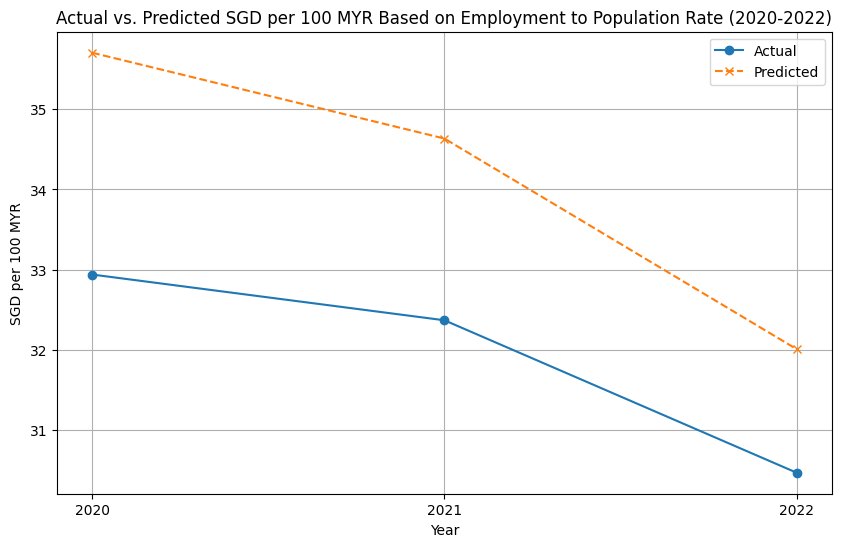

In [20]:
print(f"RMSE: {rmse_employment}")

# Plotting actual vs. predicted exchange rates for 2020-2022 based on Employment to Population Rate
plt.figure(figsize=(10, 6))
plt.plot(predictions_employment_df['Year'], predictions_employment_df['SGD_per_100_MYR'], label='Actual', marker='o')
plt.plot(predictions_employment_df['Year'], predictions_employment_df['Predicted_SGD_per_100_MYR'], label='Predicted', marker='x', linestyle='--')

plt.title('Actual vs. Predicted SGD per 100 MYR Based on Employment to Population Rate (2020-2022)')
plt.xlabel('Year')
plt.ylabel('SGD per 100 MYR')
plt.xticks(predictions_employment_df['Year'])
plt.legend()
plt.grid(True)
plt.show()


<font size="6">  
    !---Inflation Analysis---!

In [21]:
inflation_file_path = 'inflation.xlsx'
inflation_excel_data = pd.ExcelFile(inflation_file_path)

In [22]:
inflation_data = pd.read_excel(inflation_excel_data)
inflation_data.columns = inflation_data.iloc[3]  # Setting the fourth row as the header
inflation_data = inflation_data[4:]  # Dropping the rows above the header
# Filter for Singapore and Malaysia
inflation_Singapore_Malaysia= inflation_data[(inflation_data['Country Name'] == 'Singapore') | (inflation_data['Country Name'] == 'Malaysia')]
inflation_Singapore_Malaysia.head()

3,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0
173,Malaysia,MYS,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,0.063183,-0.180408,0.10844,3.105254,-0.402732,-0.105485,...,3.142991,2.104390,2.090567,3.871201,0.884709,0.662892,-1.138702,2.477102,3.378699,NaN
212,Singapore,SGP,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,0.400000,0.41958,2.205200,1.726096,0.178611,...,1.025148,-0.522618,-0.532269,0.576260,0.438620,0.565261,-0.181917,2.304860,6.121060,NaN


In [23]:
# Resetting index
inflation_data.reset_index(drop=True, inplace=True)

# Dropping columns for the year 1960 and 2023, assuming they are integers
inflation_data.drop(columns=[1960, 2023], inplace=True)

inflation_Singapore_Malaysia= inflation_data[(inflation_data['Country Name'] == 'Singapore') | (inflation_data['Country Name'] == 'Malaysia')]

# Displaying the filtered data
inflation_Singapore_Malaysia.head()

3,Country Name,Country Code,Indicator Name,Indicator Code,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,...,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0
169,Malaysia,MYS,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,-0.180408,0.10844,3.105254,-0.402732,-0.105485,0.967969,...,2.105012,3.142991,2.104390,2.090567,3.871201,0.884709,0.662892,-1.138702,2.477102,3.378699
208,Singapore,SGP,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,0.400000,0.41958,2.205200,1.726096,0.178611,2.005795,...,2.358604,1.025148,-0.522618,-0.532269,0.576260,0.438620,0.565261,-0.181917,2.304860,6.121060


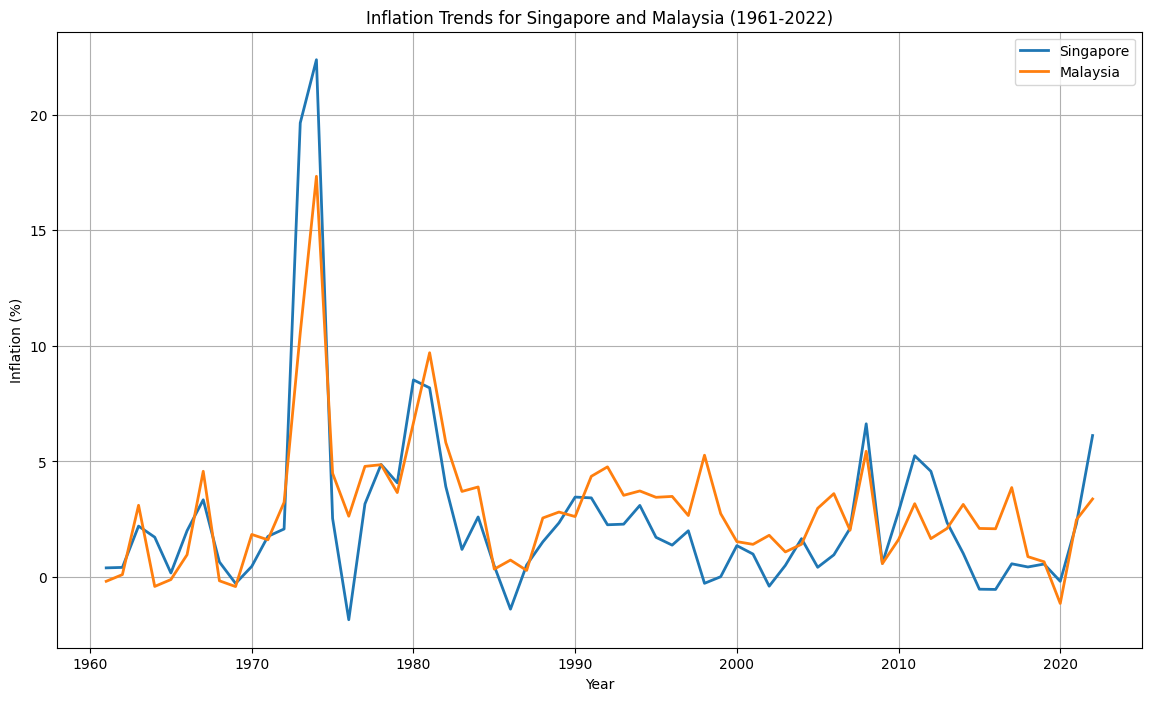

In [24]:
inflation_long_format = inflation_Singapore_Malaysia.melt(id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"], 
                                                          var_name="Year", value_name="Inflation")

# Converting 'Year' to numeric for sorting and filtering
inflation_long_format['Year'] = pd.to_numeric(inflation_long_format['Year'])

# Correctly filtering out the data to exclude the year 1960
inflation_long_format = inflation_long_format[inflation_long_format['Year'] >= 1960]

# Plotting Inflation trends for Singapore and Malaysia
plt.figure(figsize=(14, 8))
for country in ['Singapore', 'Malaysia']:
    country_data = inflation_long_format[inflation_long_format['Country Name'] == country]
    plt.plot(country_data['Year'], country_data['Inflation'], marker='', linewidth=2, label=country)

plt.title('Inflation Trends for Singapore and Malaysia (1961-2022)')
plt.xlabel('Year')
plt.ylabel('Inflation (%)')
plt.legend()
plt.grid(True)
plt.show()


Text(0.5, 1.0, 'Singapore Inflation and SGD to MYR Exchange Rate (1988-2022)')

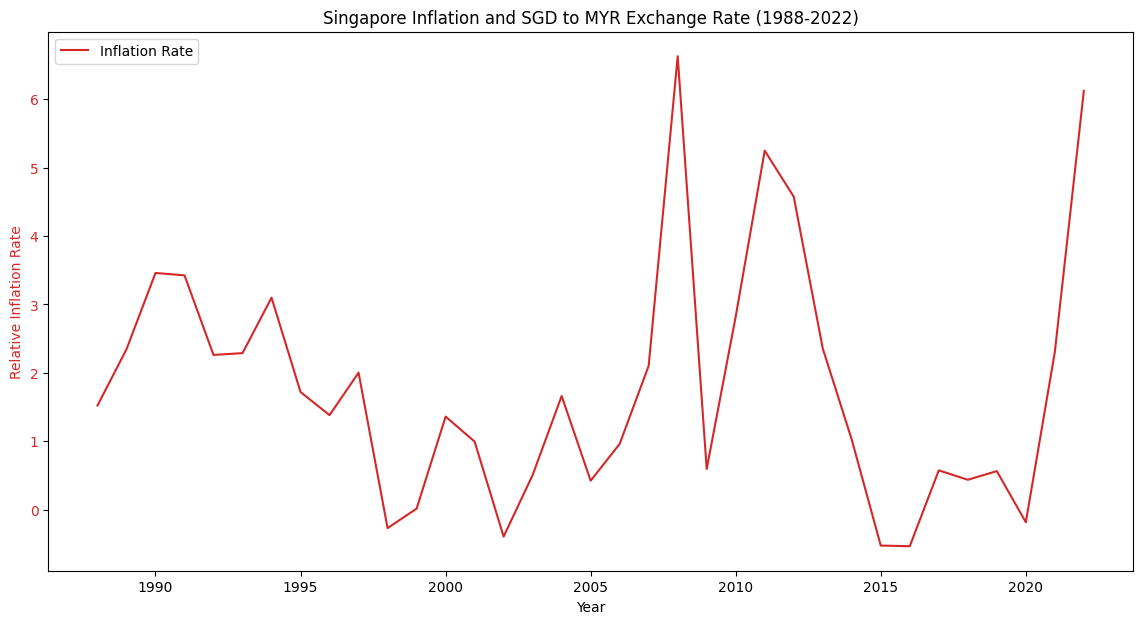

In [25]:
# Melt the inflation data
inflation_data_long = inflation_data.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], 
                                          var_name='Year', 
                                          value_name='Inflation')
inflation_data_long['Year'] = pd.to_numeric(inflation_data_long['Year'], errors='coerce')

# Filter for Singapore
inflation_sg = inflation_data_long[inflation_data_long['Country Name'] == 'Singapore']

# Filter years for the period 1988 - 2022
inflation_sg = inflation_sg[(inflation_sg['Year'] >= 1988) & (inflation_sg['Year'] <= 2022)]
exchange_rates_sg = exchange_rates_cleaned[(exchange_rates_cleaned['Year'] >= 1988) & (exchange_rates_cleaned['Year'] <= 2022)]

# Merge the datasets
Merge_inflation_data_sg = pd.merge(inflation_sg, exchange_rates_sg, on='Year')

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Relative Inflation Rate', color=color)
ax1.plot(Merge_inflation_data_sg['Year'], Merge_inflation_data_sg['Inflation'], color=color, label='Inflation Rate')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

plt.title('Singapore Inflation and SGD to MYR Exchange Rate (1988-2022)')


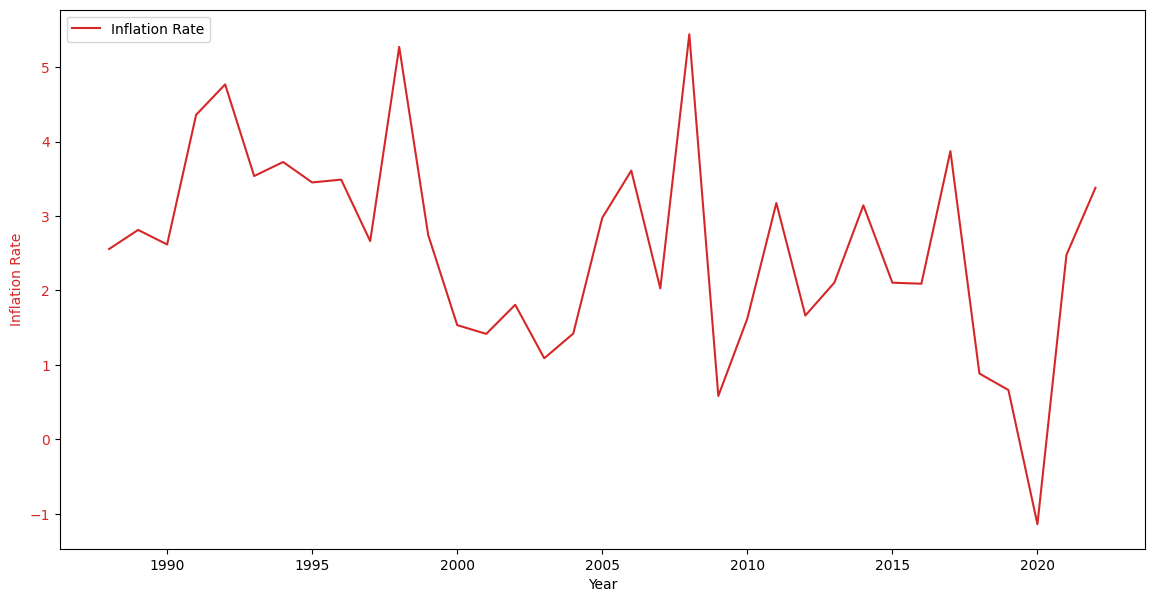

In [26]:
# Melt the inflation data
inflation_data_long = inflation_data.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], 
                                          var_name='Year', 
                                          value_name='Inflation')
inflation_data_long['Year'] = pd.to_numeric(inflation_data_long['Year'], errors='coerce')

inflation_my = inflation_data_long[inflation_data_long['Country Name'] == 'Malaysia']

# Filter years for the period 1988 - 2022
inflation_my = inflation_my[(inflation_my['Year'] >= 1988) & (inflation_my['Year'] <= 2022)]

# Assuming exchange_rates_cleaned is already defined and cleaned with 'Year' as a column
exchange_rates_sg = exchange_rates_cleaned[(exchange_rates_cleaned['Year'] >= 1988) & (exchange_rates_cleaned['Year'] <= 2022)]

# Merge the datasets
Merge_inflation_data_my = pd.merge(inflation_my, exchange_rates_sg, on='Year')

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Inflation Rate', color=color)
ax1.plot(Merge_inflation_data_my['Year'], Merge_inflation_data_my['Inflation'], color=color, label='Inflation Rate')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

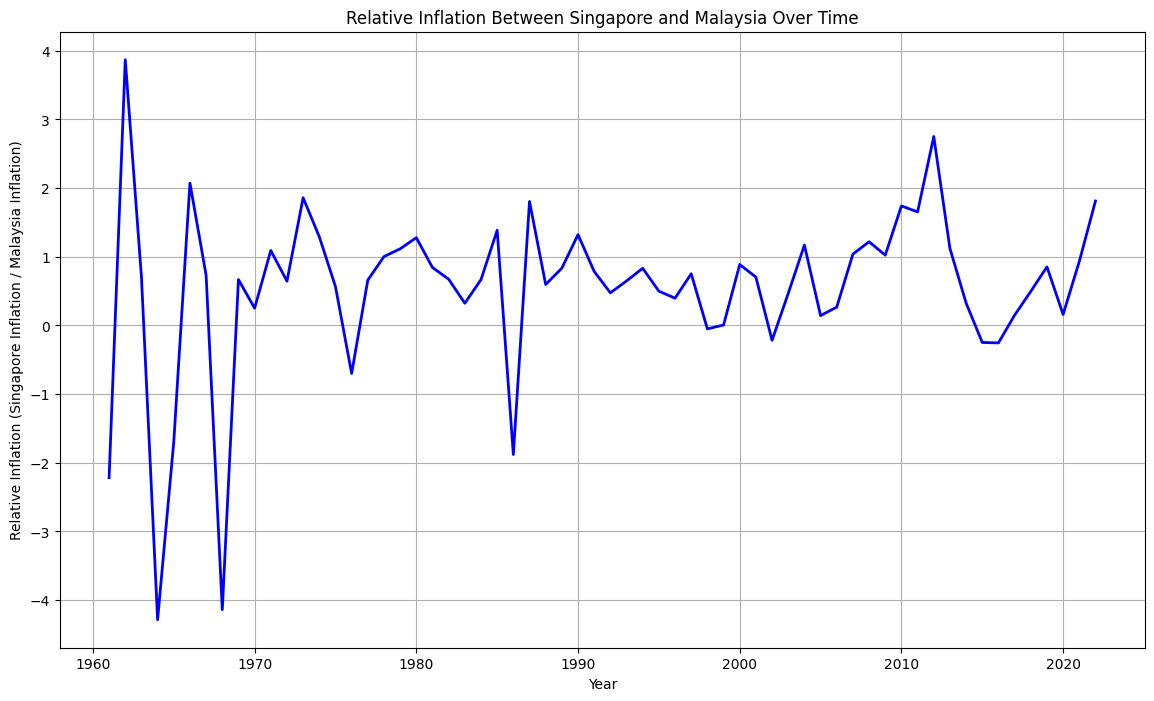

In [27]:
# Isolating Inflation data for Singapore and Malaysia
inflation_sg = inflation_long_format[inflation_long_format['Country Name'] == 'Singapore'].set_index('Year')['Inflation']
inflation_my = inflation_long_format[inflation_long_format['Country Name'] == 'Malaysia'].set_index('Year')['Inflation']

# Calculating Relative Inflation
relative_inflation = inflation_sg / inflation_my

# Preparing data for visualization
relative_inflation_df = relative_inflation.reset_index()
relative_inflation_df.columns = ['Year', 'Relative_Inflation']  # Ensure column names are correctly set

# Plotting the Relative Inflation over time
plt.figure(figsize=(14, 8))
plt.plot(relative_inflation_df['Year'], relative_inflation_df['Relative_Inflation'], marker='', color='blue', linewidth=2)
plt.title('Relative Inflation Between Singapore and Malaysia Over Time')
plt.xlabel('Year')
plt.ylabel('Relative Inflation (Singapore Inflation / Malaysia Inflation)')
plt.grid(True)
plt.show()

Some key observations about the above graph:

Overall Trends: The graph displaying the relative inflation between Singapore and Malaysia does not show a consistent trend over the long term. Instead, it alternates between periods where one country's inflation rate is higher than the other's. Over time, the instances of extreme divergence in inflation rates have lessened, hinting at a possible convergence or less volatile economic relationship.

Fluctuations: The relative inflation graph is characterized by significant fluctuations, especially in the early decades. These fluctuations have smoothed out somewhat over time, suggesting a stabilization in the relative inflation rates between the two countries, even though occasional variations persist.

Recent Years Spike: In recent years, there's a noticeable spike in relative inflation, with Singapore's rate increasing sharply compared to Malaysia's. This uptick could reflect recent economic developments or policy changes that have impacted Singapore more than Malaysia.

In [28]:
# We'll focus on years up to 2019 for training, and use 2020-2023 for testing our predictions

# Preparing exchange rate data for merge
exchange_rates_sg_my = exchange_rates_cleaned[['Year', 'SGD_per_100_MYR']].copy()
exchange_rates_sg_my['Year'] = pd.to_numeric(exchange_rates_sg_my['Year'])

# Merging CPI and exchange rate data on Year
merged_data_inflation = pd.merge(left=relative_inflation_df, right=exchange_rates_sg_my, on='Year', how='inner')

# Splitting the dataset into training and testing sets
# Training set: Years up to 2019
# Testing set: Years 2020-2023
train_data_inflation = merged_data_inflation[merged_data_inflation['Year'] <= 2019]
test_data_inflation = merged_data_inflation[(merged_data_inflation['Year'] >= 2020) & (merged_data_inflation['Year'] < 2023)]

# Checking the final structure of the training and testing datasets
train_data_inflation.tail(), test_data_inflation.head()

(      Year  Relative_Inflation  SGD_per_100_MYR
 27  2015.0           -0.248347            32.94
 28  2016.0           -0.254605            32.24
 29  2017.0            0.148858            32.90
 30  2018.0            0.495779            32.98
 31  2019.0            0.852719            32.92,
       Year  Relative_Inflation  SGD_per_100_MYR
 32  2020.0            0.159758            32.94
 33  2021.0            0.930466            32.37
 34  2022.0            1.811662            30.47)

RMSE: 15.182143949765276


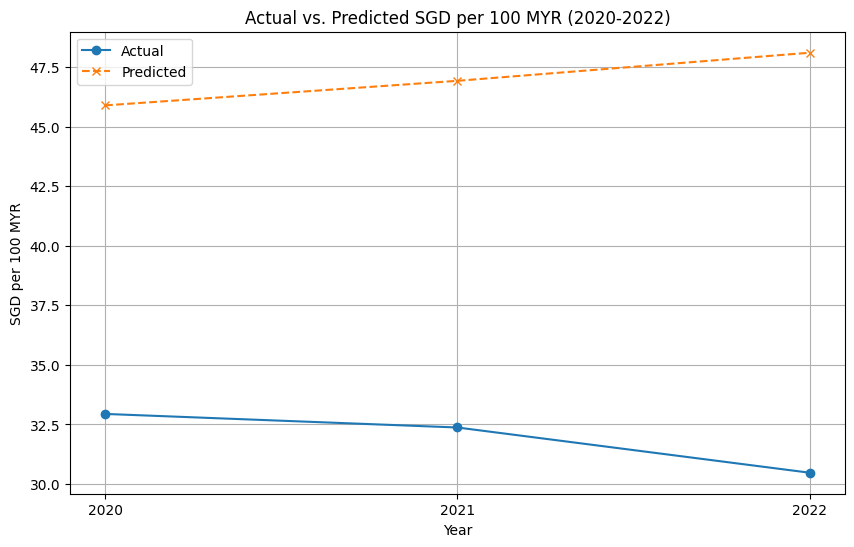

In [29]:
model_inflation = LinearRegression()

# Training the model
X_train_inflation = train_data_inflation[['Relative_Inflation']]
y_train_inflation = train_data_inflation['SGD_per_100_MYR']
model_inflation.fit(X_train_inflation, y_train_inflation)

# Making predictions for the test set
X_test_inflation = test_data_inflation[['Relative_Inflation']]
y_test_inflation = test_data_inflation['SGD_per_100_MYR']
predictions_inflation = model_inflation.predict(X_test_inflation)

# Calculating error metrics
mae_inflation = mean_absolute_error(y_test_inflation, predictions_inflation)
rmse_inflation = np.sqrt(mean_squared_error(y_test_inflation, predictions_inflation))
print(f"RMSE: {rmse_inflation}")

# Preparing the DataFrame for results display
predictions_inflation_df = test_data_inflation.copy()
predictions_inflation_df['Predicted_SGD_per_100_MYR'] = predictions_inflation

# Plotting actual vs. predicted exchange rates for the relevant years
plt.figure(figsize=(10, 6))
plt.plot(predictions_inflation_df['Year'], predictions_inflation_df['SGD_per_100_MYR'], label='Actual', marker='o')
plt.plot(predictions_inflation_df['Year'], predictions_inflation_df['Predicted_SGD_per_100_MYR'], label='Predicted', marker='x', linestyle='--')
plt.title('Actual vs. Predicted SGD per 100 MYR (2020-2022)')
plt.xlabel('Year')
plt.ylabel('SGD per 100 MYR')
plt.legend()
plt.grid(True)
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))


<font size="6">  
    !---Interest Rate Analysis---!

In [30]:
Real_Interest_file_path = 'Real_Interest_rate.xlsx'
Real_Interest_excel_data = pd.ExcelFile(Real_Interest_file_path)

In [31]:
Real_Interest_data = pd.read_excel(Real_Interest_excel_data)
Real_Interest_data.columns = Real_Interest_data.iloc[3]  # Setting the fourth row as the header
Real_Interest_data = Real_Interest_data[4:]  # Dropping the rows above the header
# Filter for Singapore and Malaysia
Real_Interest_singapore_malaysia= Real_Interest_data[(Real_Interest_data['Country Name'] == 'Singapore') | ( Real_Interest_data['Country Name'] == 'Malaysia')]
Real_Interest_singapore_malaysia.head()

3,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0
173,Malaysia,MYS,Real interest rate (%),FR.INR.RINR,NaN,NaN,NaN,NaN,NaN,NaN,...,2.068518,3.307038,2.825945,0.798926,4.277048,4.801617,4.801492,-2.141200,-2.384056,NaN
212,Singapore,SGP,Real interest rate (%),FR.INR.RINR,NaN,NaN,NaN,NaN,NaN,NaN,...,5.632324,2.210150,4.857711,2.337636,1.734056,5.462664,8.166665,-3.248965,NaN,NaN


In [32]:
# Resetting the index after dropping rows
Real_Interest_data.reset_index(drop=True, inplace=True)

# Adjusting the range to include all years from 1960 to 1977 as integers, and also 2022 to 2023
years_to_drop = list(range(1960, 1978)) + [2022, 2023]
Real_Interest_data.drop(columns=years_to_drop, inplace=True)

# Filter for Singapore and Malaysia
Real_Interest_singapore_malaysia = Real_Interest_data[(Real_Interest_data['Country Name'] == 'Singapore') | (Real_Interest_data['Country Name'] == 'Malaysia')]

# Displaying the filtered data
Real_Interest_singapore_malaysia.head()

3,Country Name,Country Code,Indicator Name,Indicator Code,1978.0,1979.0,1980.0,1981.0,1982.0,1983.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
169,Malaysia,MYS,Real interest rate (%),FR.INR.RINR,-0.455553,-2.346501,3.045538,10.716385,9.590518,5.537335,...,3.748419,4.467531,2.068518,3.307038,2.825945,0.798926,4.277048,4.801617,4.801492,-2.141200
208,Singapore,SGP,Real interest rate (%),FR.INR.RINR,3.006598,3.105355,0.535025,7.338347,5.448404,5.698664,...,4.860578,5.836217,5.632324,2.210150,4.857711,2.337636,1.734056,5.462664,8.166665,-3.248965


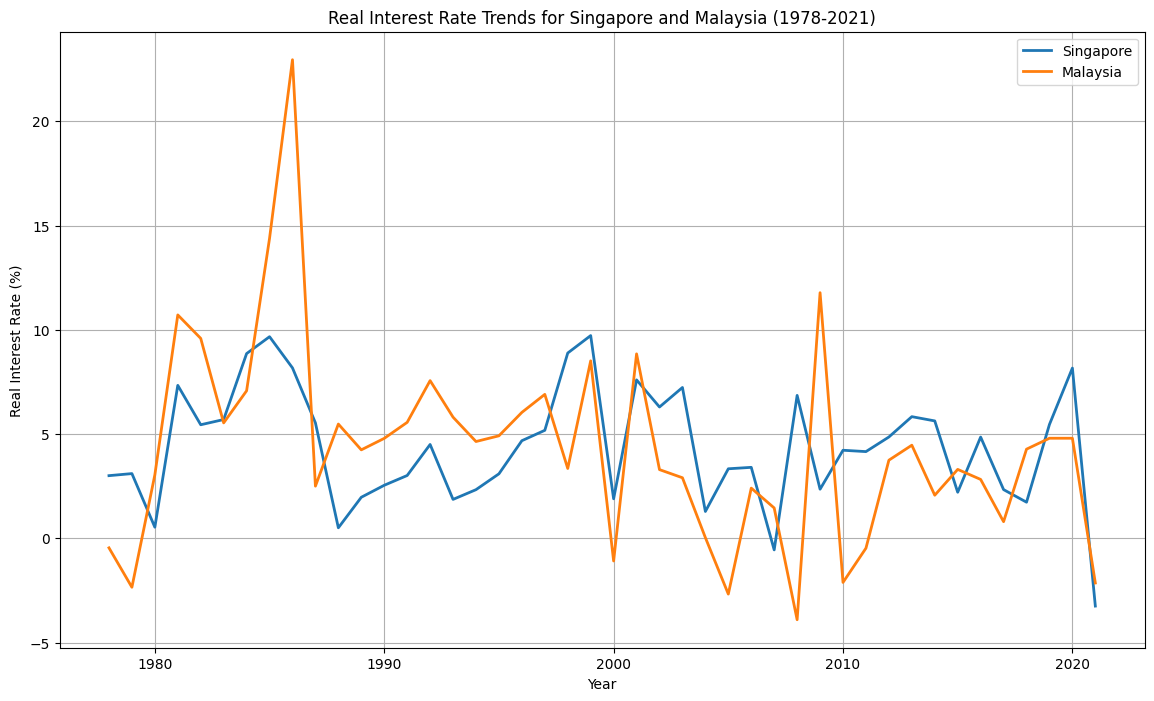

In [33]:
Real_Interest_long_format = Real_Interest_singapore_malaysia.melt(id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"], 
                                                          var_name="Year", value_name="Real_Interest")

# Converting 'Year' to numeric for sorting and filtering
Real_Interest_long_format['Year'] = pd.to_numeric(Real_Interest_long_format['Year'])

# Correctly filtering out the data to include only the years 1978 to 2021
Real_Interest_long_format = Real_Interest_long_format[(Real_Interest_long_format['Year'] > 1977) & (Real_Interest_long_format['Year'] <= 2021)]

# Plotting Real Interest Rate trends for Singapore and Malaysia
plt.figure(figsize=(14, 8))
for country in ['Singapore', 'Malaysia']:
    country_data = Real_Interest_long_format[Real_Interest_long_format['Country Name'] == country]
    plt.plot(country_data['Year'], country_data['Real_Interest'], marker='', linewidth=2, label=country)

plt.title('Real Interest Rate Trends for Singapore and Malaysia (1978-2021)')
plt.xlabel('Year')
plt.ylabel('Real Interest Rate (%)')
plt.legend()
plt.grid(True)

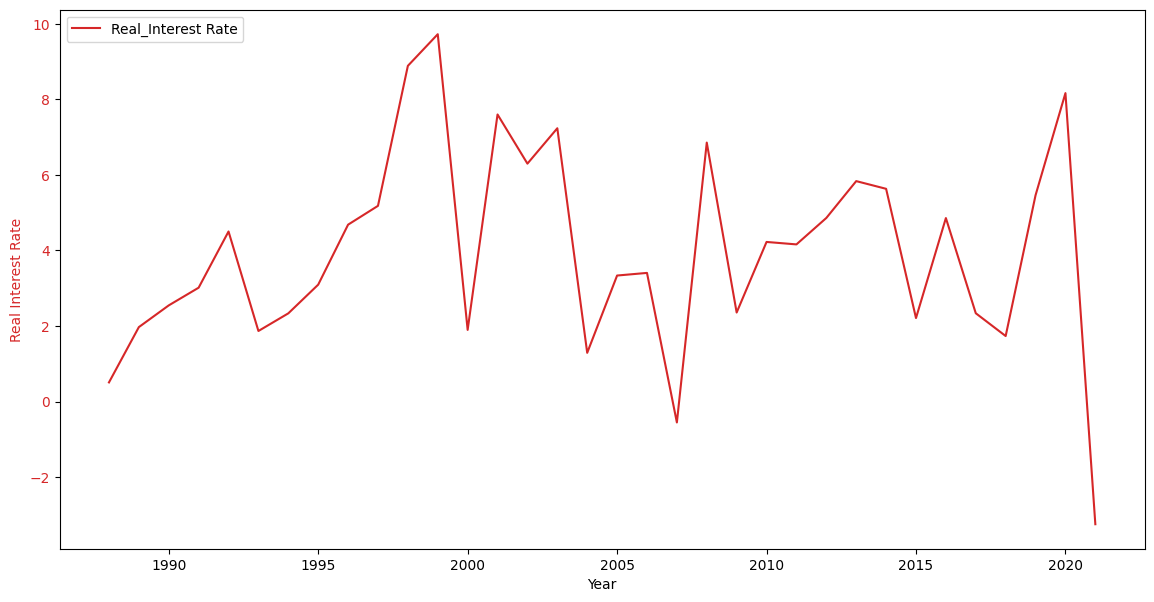

In [34]:
# Melt the inflation data
Real_Interest_data_long = Real_Interest_data.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], 
                                                  var_name='Year', 
                                                  value_name='Real_Interest')
Real_Interest_data_long['Year'] = pd.to_numeric(Real_Interest_data_long['Year'], errors='coerce')

# Filter for Singapore
Real_Interest_sg = Real_Interest_data_long[Real_Interest_data_long['Country Name'] == 'Singapore']

# Filter years for the period 1988 - 2022
Real_Interest_sg = Real_Interest_sg[(Real_Interest_sg['Year'] >= 1978) & (Real_Interest_sg['Year'] <= 2021)]

# Assuming exchange_rates_cleaned is already defined and cleaned with 'Year' as a column
exchange_rates_sg = exchange_rates_cleaned[(exchange_rates_cleaned['Year'] >= 1978) & (exchange_rates_cleaned['Year'] <= 2021)]

# Merge the datasets
Merge_data_Real_Interest_sg= pd.merge(Real_Interest_sg, exchange_rates_sg, on='Year')

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Real Interest Rate', color=color)
ax1.plot(Merge_data_Real_Interest_sg['Year'], Merge_data_Real_Interest_sg['Real_Interest'], color=color, label='Real_Interest Rate')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

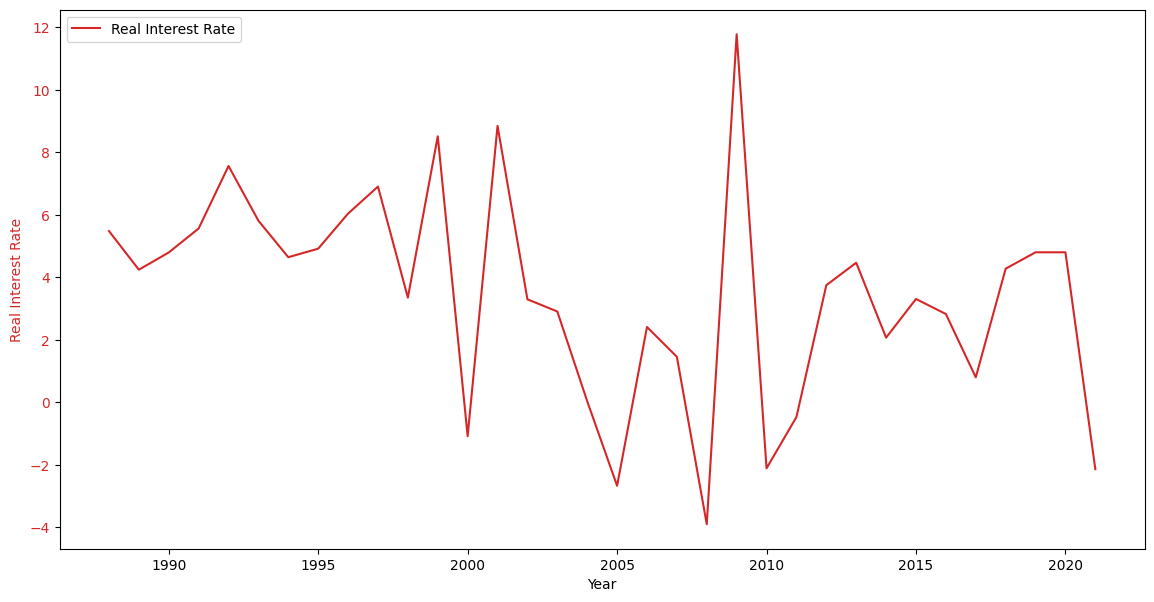

In [35]:
Real_Interest_data_long = Real_Interest_data.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], 
                                          var_name='Year', 
                                          value_name='Real Interest Rate')
Real_Interest_data_long['Year'] = pd.to_numeric(Real_Interest_data_long['Year'], errors='coerce')

# Filter for Malaysia
Real_Interest_my = Real_Interest_data_long[Real_Interest_data_long['Country Name'] == 'Malaysia']

# Filter years for the period 1988 - 2022
Real_Interest_my = Real_Interest_my[(Real_Interest_my['Year'] >= 1978) & (Real_Interest_my['Year'] <= 2021)]

# Assuming exchange_rates_cleaned is already defined and cleaned with 'Year' as a column
exchange_rates_sg = exchange_rates_cleaned[(exchange_rates_cleaned['Year'] >= 1978) & (exchange_rates_cleaned['Year'] <= 2021)]

# Merge the datasets
Merge_data_Real_Interest_my = pd.merge(Real_Interest_my, exchange_rates_sg, on='Year')

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Real Interest Rate', color=color)
ax1.plot(Merge_data_Real_Interest_my['Year'], Merge_data_Real_Interest_my['Real Interest Rate'], color=color, label='Real Interest Rate')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

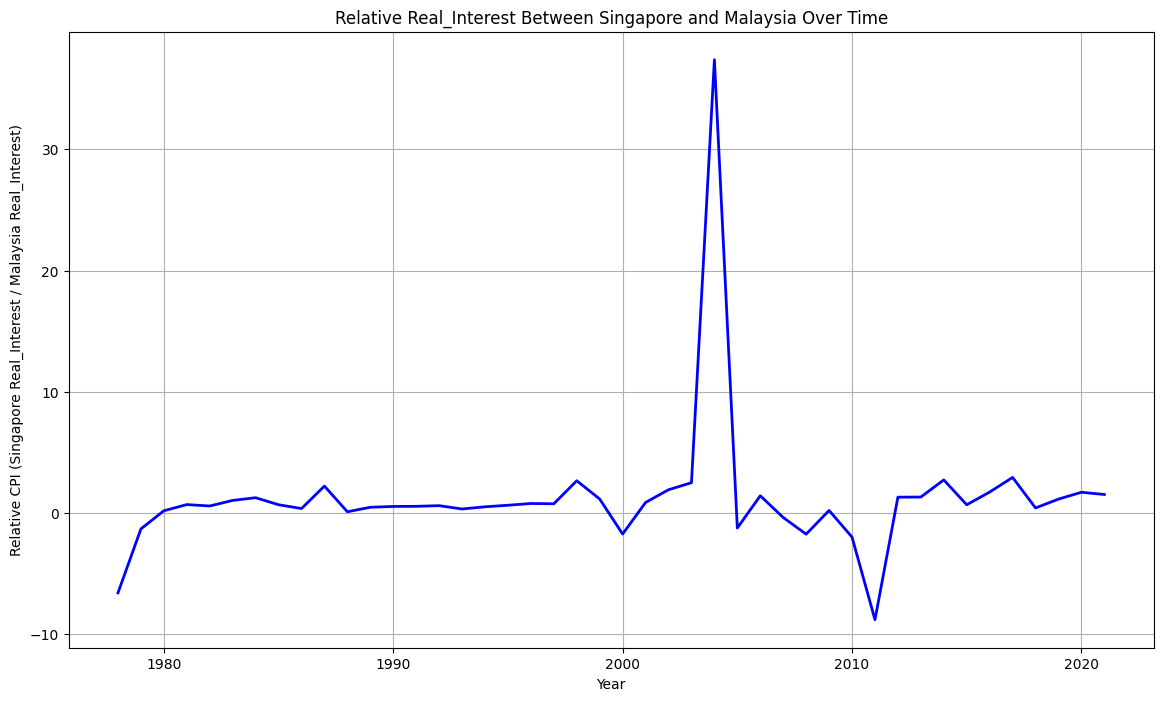

In [36]:
# Calculating Relative CPI between Singapore and Malaysia for each available year
# Relative CPI is calculated as CPI_Singapore / CPI_Malaysia

# Isolating CPI data for Singapore and Malaysia
Real_Interest_sg = Real_Interest_long_format[Real_Interest_long_format['Country Name'] == 'Singapore'].set_index('Year')['Real_Interest']
Real_Interest_my = Real_Interest_long_format[Real_Interest_long_format['Country Name'] == 'Malaysia'].set_index('Year')['Real_Interest']

# Calculating Relative CPI
relative_Real_Interest = Real_Interest_sg / Real_Interest_my

# Preparing data for a simple analysis or visualization
relative_Real_Interest_df = relative_Real_Interest.reset_index()
relative_Real_Interest_df.columns = ['Year', 'Relative_Real_Interest']

# Display the first few rows to verify
relative_Real_Interest_df.head()

# Plotting the Relative CPI over time
plt.figure(figsize=(14, 8))
plt.plot(relative_Real_Interest_df['Year'], relative_Real_Interest_df['Relative_Real_Interest'], marker='', color='blue', linewidth=2)
plt.title('Relative Real_Interest Between Singapore and Malaysia Over Time')
plt.xlabel('Year')
plt.ylabel('Relative CPI (Singapore Real_Interest / Malaysia Real_Interest)')
plt.grid(True)
plt.show()


Overall Trends: The graph displaying the relative real interest rate between Singapore and Malaysia over time indicates a lack of a consistent trend. Instead, it shows an episodic nature, with periods of relative parity and instances of significant divergence between the two countries' real interest rates.

Significant Fluctuations: The relative real interest rates have experienced substantial fluctuations throughout the period. There are multiple periods where the real interest rate of one country dramatically exceeds that of the other. These fluctuations suggest an intermittent economic relationship influenced by varying monetary policies and inflationary pressures.

Recent Stabilization: In the years following the spike, and particularly in the last decade shown, the relative real interest rates appear to have stabilized somewhat, although there are still noticeable ups and downs. This stabilization could indicate more aligned monetary policies or similar responses to global economic conditions.

The observations suggest a complex and dynamic economic relationship between Singapore and Malaysia, influenced by various internal and external factors over the past few decades.

In [37]:
# We'll focus on years up to 2019 for training, and use 2020-2023 for testing our predictions

# Preparing exchange rate data for merge
exchange_rates_sg_my = exchange_rates_cleaned[['Year', 'SGD_per_100_MYR']].copy()
exchange_rates_sg_my['Year'] = pd.to_numeric(exchange_rates_sg_my['Year'])

# Merging CPI and exchange rate data on Year
Merged_data_Real_Interest = pd.merge(left=relative_Real_Interest_df, right=exchange_rates_sg_my, on='Year', how='inner')

# Splitting the dataset into training and testing sets
# Training set: Years up to 2019
# Testing set: Years 2020-2023
train_data_Real_Interest = Merged_data_Real_Interest[Merged_data_Real_Interest['Year'] < 2022]
test_data_Real_Interest = Merged_data_Real_Interest[(Merged_data_Real_Interest['Year'] >2018 ) & (Merged_data_Real_Interest['Year'] < 2022)]

# Checking the final structure of the training and testing datasets
train_data_Real_Interest.tail(), test_data_Real_Interest.head()

(      Year  Relative_Real_Interest  SGD_per_100_MYR
 29  2017.0                2.925973            32.90
 30  2018.0                0.405433            32.98
 31  2019.0                1.137672            32.92
 32  2020.0                1.700860            32.94
 33  2021.0                1.517357            32.37,
       Year  Relative_Real_Interest  SGD_per_100_MYR
 31  2019.0                1.137672            32.92
 32  2020.0                1.700860            32.94
 33  2021.0                1.517357            32.37)

RMSE: 13.073531371517857


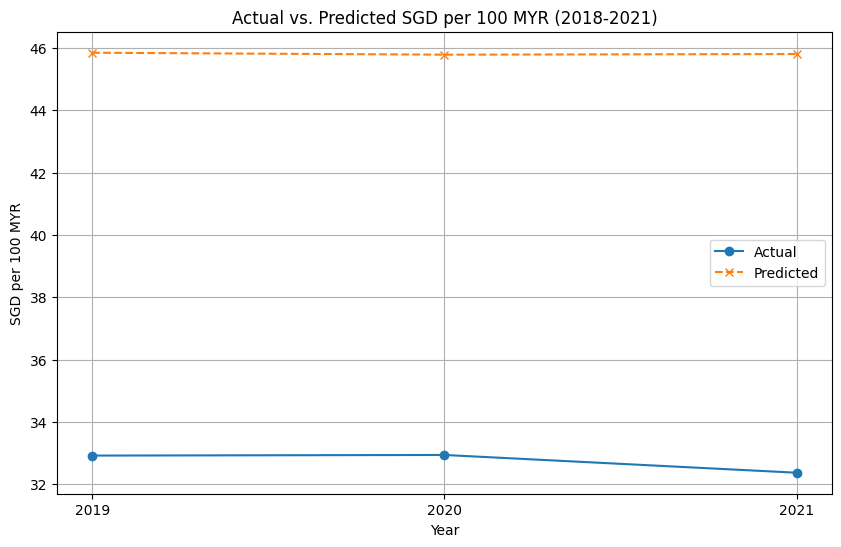

In [38]:
model_Real_Interest = LinearRegression()

# Training the model
X_train_Real_Interest = train_data_Real_Interest[['Relative_Real_Interest']]
y_train_Real_Interest = train_data_Real_Interest['SGD_per_100_MYR']
model_Real_Interest.fit(X_train_Real_Interest, y_train_Real_Interest)

# Making predictions for the test set
X_test_Real_Interest = test_data_Real_Interest[['Relative_Real_Interest']]
y_test_Real_Interest = test_data_Real_Interest['SGD_per_100_MYR']
predictions_Real_Interest = model_Real_Interest.predict(X_test_Real_Interest)  # Corrected model object

# Calculating error metrics
mae_Real_Interest = mean_absolute_error(y_test_Real_Interest, predictions_Real_Interest)
rmse_Real_Interest = np.sqrt(mean_squared_error(y_test_Real_Interest, predictions_Real_Interest))

# Preparing the DataFrame for results display
predictions_Real_Interest_df = test_data_Real_Interest.copy()  # Corrected DataFrame
predictions_Real_Interest_df['Predicted_SGD_per_100_MYR'] = predictions_Real_Interest

# Displaying predictions and error metrics
results_display = predictions_Real_Interest_df[['Year', 'SGD_per_100_MYR', 'Predicted_SGD_per_100_MYR']]
mae_Real_Interest, rmse_Real_Interest  # These can be printed or returned depending on your context
print(f"RMSE: {rmse_Real_Interest}")
# Plotting actual vs. predicted exchange rates
plt.figure(figsize=(10, 6))
plt.plot(predictions_Real_Interest_df['Year'], predictions_Real_Interest_df['SGD_per_100_MYR'], label='Actual', marker='o')
plt.plot(predictions_Real_Interest_df['Year'], predictions_Real_Interest_df['Predicted_SGD_per_100_MYR'], label='Predicted', marker='x', linestyle='--')

plt.title('Actual vs. Predicted SGD per 100 MYR (2018-2021)')
plt.xlabel('Year')
plt.ylabel('SGD per 100 MYR')
plt.legend()
plt.grid(True)
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

<font size="6">  
    !---Merchandise Trade Analysis---!

In [39]:
Merchandise_Trade_file_path = 'Merchandise trade(%GDP).xlsx'

# Load the Excel file
Merchandise_Trade_excel_data = pd.ExcelFile(Merchandise_Trade_file_path)

In [40]:
# Assuming 'Merchandise_Trade_excel_data' contains the merchandise trade data
Merchandise_Trade_data = pd.read_excel(Merchandise_Trade_excel_data)

# Setting the fourth row as the header
Merchandise_Trade_data.columns = Merchandise_Trade_data.iloc[3]

# Dropping the rows above the header
Merchandise_Trade_data = Merchandise_Trade_data[4:]

# Resetting index
Merchandise_Trade_data.reset_index(drop=True, inplace=True)

# Dropping the '2023' column
Merchandise_Trade_data.drop(columns=[2023], inplace=True)

# Filter for Singapore and Malaysia
Merchandise_Trade_Singapore_Malaysia = Merchandise_Trade_data[(Merchandise_Trade_data['Country Name'] == 'Singapore') | (Merchandise_Trade_data['Country Name'] == 'Malaysia')]

# Displaying the filtered data for a quick review
Merchandise_Trade_Singapore_Malaysia.head()

3,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0
169,Malaysia,MYS,Merchandise trade (% of GDP),TG.VAL.TOTL.GD.ZS,109.433657,104.003661,103.073231,84.896666,80.465927,78.881382,...,134.321039,130.973797,124.744128,118.977534,129.594238,129.618578,121.363647,126.127789,143.825137,158.906235
208,Singapore,SGP,Merchandise trade (% of GDP),TG.VAL.TOTL.GD.ZS,350.336154,310.738613,294.708840,276.043797,228.484307,228.185859,...,254.657412,251.947843,210.609436,192.401934,204.318210,207.986058,199.032432,198.731262,203.772749,212.383158


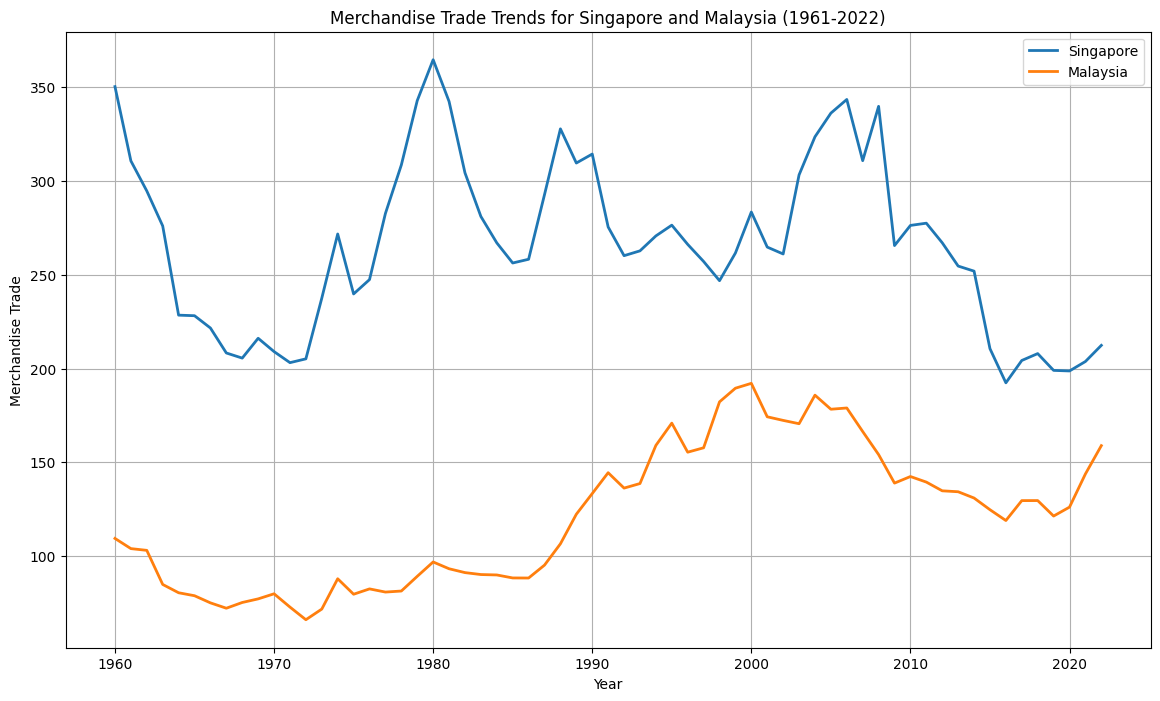

In [41]:
Merchandise_Trade_long_format = Merchandise_Trade_Singapore_Malaysia.melt(id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"], 
                                                          var_name="Year", value_name="Merchandise_Trade")

# Converting 'Year' to numeric for sorting and filtering
Merchandise_Trade_long_format['Year'] = pd.to_numeric(Merchandise_Trade_long_format['Year'])

# Filter out the year 1960, to start from 1961
Merchandise_Trade_long_format = Merchandise_Trade_long_format[Merchandise_Trade_long_format['Year'] >= 1960]

# Plotting Merchandise Trade trends for Singapore and Malaysia
plt.figure(figsize=(14, 8))
for country in ['Singapore', 'Malaysia']:
    country_data = Merchandise_Trade_long_format[Merchandise_Trade_long_format['Country Name'] == country]
    plt.plot(country_data['Year'], country_data['Merchandise_Trade'], marker='', linewidth=2, label=country)

plt.title('Merchandise Trade Trends for Singapore and Malaysia (1961-2022)')
plt.xlabel('Year')
plt.ylabel('Merchandise Trade')
plt.legend()
plt.grid(True)

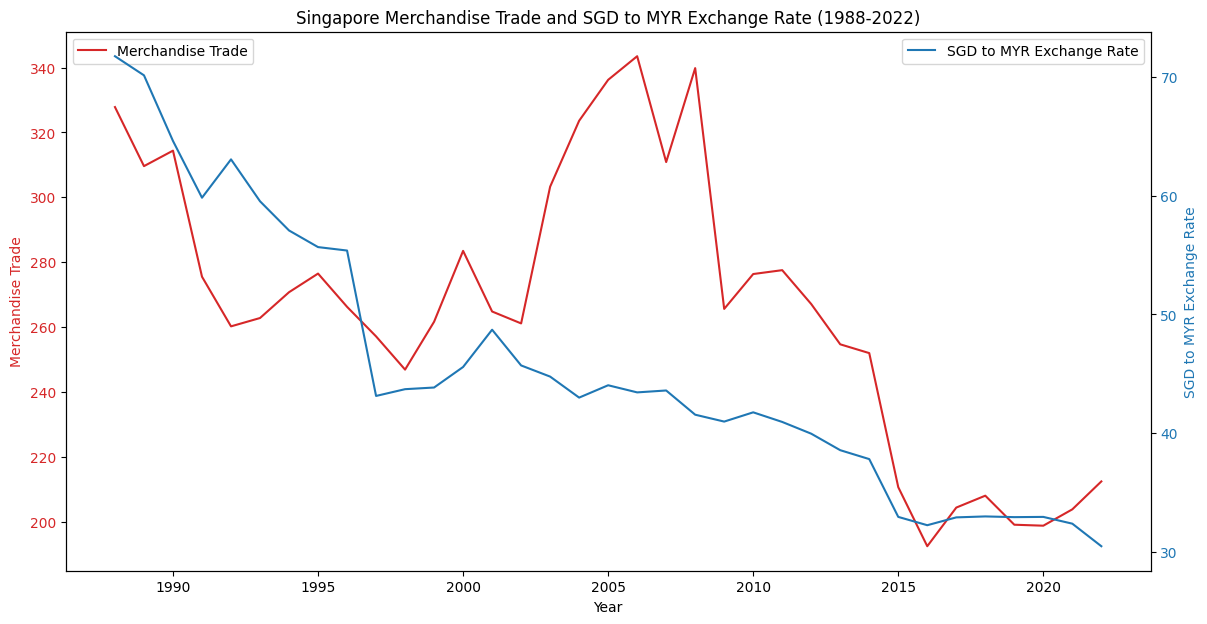

In [42]:
# Melt the merchandise trade data
Merchandise_Trade_data_long = Merchandise_Trade_data.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], 
                                                  var_name='Year', 
                                                  value_name='Merchandise_Trade')
Merchandise_Trade_data_long['Year'] = pd.to_numeric(Merchandise_Trade_data_long['Year'], errors='coerce')

# Filter for Singapore
Merchandise_Trade_sg = Merchandise_Trade_data_long[Merchandise_Trade_data_long['Country Name'] == 'Singapore']

# Filter years for the period 1988 - 2022
Merchandise_Trade_sg = Merchandise_Trade_sg[(Merchandise_Trade_sg['Year'] >= 1988) & (Merchandise_Trade_sg['Year'] <= 2022)]

# Assuming exchange_rates_cleaned is already defined and cleaned with 'Year' as a column
exchange_rates_sg = exchange_rates_cleaned[(exchange_rates_cleaned['Year'] >= 1988) & (exchange_rates_cleaned['Year'] <= 2022)]

# Merge the datasets
Merge_data_Merchandise_Trade_sg = pd.merge(Merchandise_Trade_sg, exchange_rates_sg, on='Year')

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Merchandise Trade', color=color)
ax1.plot(Merge_data_Merchandise_Trade_sg ['Year'], Merge_data_Merchandise_Trade_sg ['Merchandise_Trade'], color=color, label='Merchandise Trade')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('SGD to MYR Exchange Rate', color=color)
ax2.plot(Merge_data_Merchandise_Trade_sg ['Year'], Merge_data_Merchandise_Trade_sg ['SGD_per_100_MYR'], color=color, label='SGD to MYR Exchange Rate')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

plt.title('Singapore Merchandise Trade and SGD to MYR Exchange Rate (1988-2022)')
plt.show()


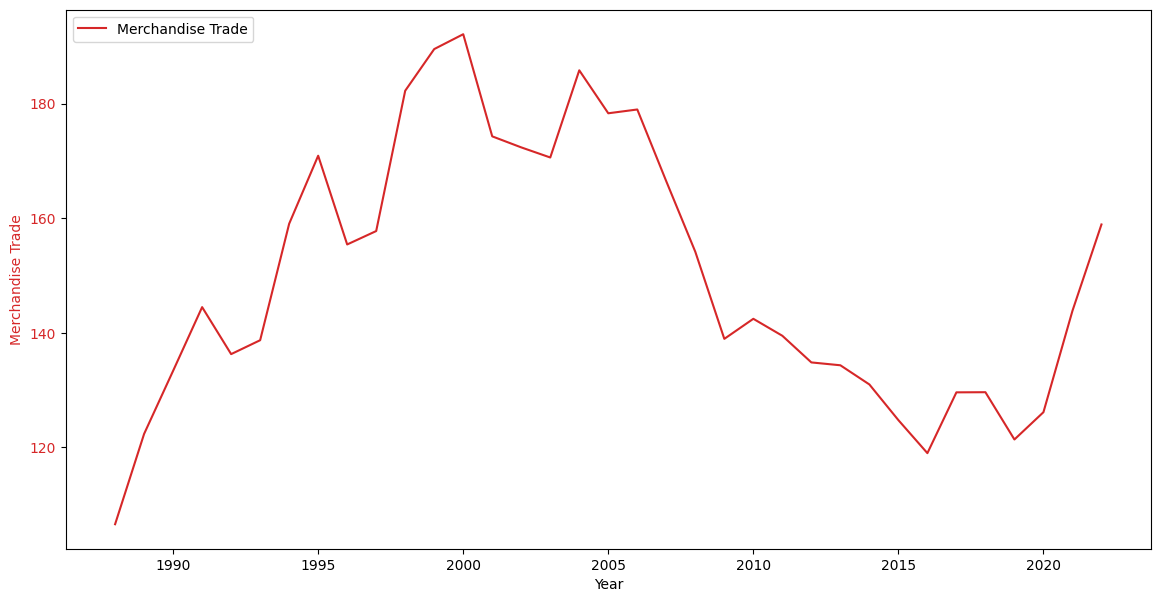

In [43]:
# Melt the merchandise trade data
Merchandise_Trade_data_long = Merchandise_Trade_data.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], 
                                                  var_name='Year', 
                                                  value_name='Merchandise_Trade')
Merchandise_Trade_data_long['Year'] = pd.to_numeric(Merchandise_Trade_data_long['Year'], errors='coerce')

# Filter for Malaysia
Merchandise_Trade_my = Merchandise_Trade_data_long[Merchandise_Trade_data_long['Country Name'] == 'Malaysia']

# Filter years for the period 1988 - 2022
Merchandise_Trade_my = Merchandise_Trade_my[(Merchandise_Trade_my['Year'] >= 1988) & (Merchandise_Trade_my['Year'] <= 2022)]

# Assuming exchange_rates_cleaned is already defined and cleaned with 'Year' as a column
exchange_rates_sg = exchange_rates_cleaned[(exchange_rates_cleaned['Year'] >= 1988) & (exchange_rates_cleaned['Year'] <= 2022)]

# Merge the datasets
Merge_data_Merchandise_Trade_my = pd.merge(Merchandise_Trade_my, exchange_rates_sg, on='Year')

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Merchandise Trade', color=color)
ax1.plot(Merge_data_Merchandise_Trade_my['Year'], Merge_data_Merchandise_Trade_my['Merchandise_Trade'], color=color, label='Merchandise Trade')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

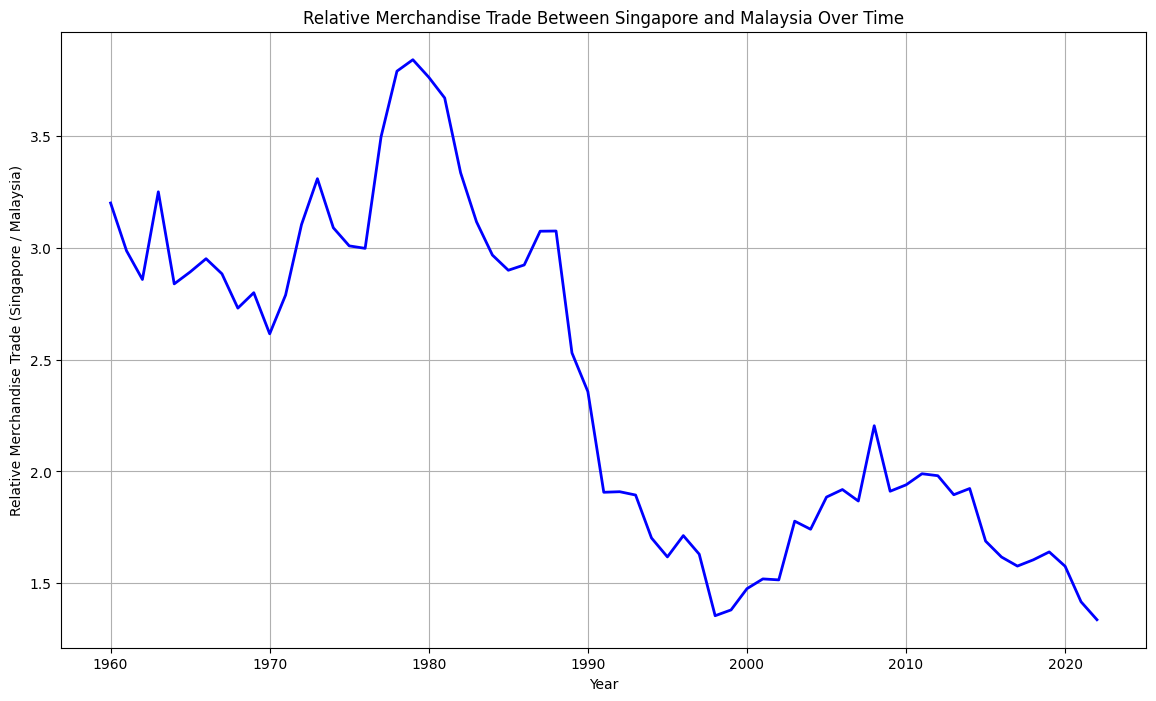

In [44]:
# Isolating merchandise trade data for Singapore and Malaysia
Merchandise_Trade_sg = Merchandise_Trade_long_format[Merchandise_Trade_long_format['Country Name'] == 'Singapore'].set_index('Year')['Merchandise_Trade']
Merchandise_Trade_my = Merchandise_Trade_long_format[Merchandise_Trade_long_format['Country Name'] == 'Malaysia'].set_index('Year')['Merchandise_Trade']

# Calculating relative merchandise trade manually
relative_Merchandise_Trade = Merchandise_Trade_sg / Merchandise_Trade_my

# Resetting index for easier manipulation
relative_Merchandise_Trade_df = relative_Merchandise_Trade.reset_index()

# Plotting the relative merchandise trade over time
plt.figure(figsize=(14, 8))
plt.plot(relative_Merchandise_Trade_df['Year'], relative_Merchandise_Trade_df['Merchandise_Trade'], marker='', color='blue', linewidth=2)
plt.title('Relative Merchandise Trade Between Singapore and Malaysia Over Time')
plt.xlabel('Year')
plt.ylabel('Relative Merchandise Trade (Singapore / Malaysia)')
plt.grid(True)

Overall Trends: The graph depicting relative merchandise trade between Singapore and Malaysia demonstrates considerable volatility over the observed period. There is no clear long-term trend towards either an increase or decrease in the ratio of trade between the two nations. Instead, the graph suggests a cyclical nature with periods of relative trade increase and decrease.

Periods of Convergence and Divergence: Through the decades, we observe that the relative trade has seen periods of convergence where the trade ratio narrows, and periods of divergence where it widens significantly. The data shows some stabilization in the later years, with fewer extreme spikes or drops compared to earlier decades.

Historical economic events are very likely to have influenced trade, such as the Asian Financial Crisis, the 2008 global recession, and the recent global economic changes due to pandemics or shifts in global trade dynamics.

In [45]:
# Note: The exchange rate data needs to be aligned with the years available in the Mechandise Trade data
# We'll focus on years up to 2019 for training, and use 2020-2023 for testing our predictions

# Preparing exchange rate data for merge
exchange_rates_sg_my = exchange_rates_cleaned[['Year', 'SGD_per_100_MYR']].copy()
exchange_rates_sg_my['Year'] = pd.to_numeric(exchange_rates_sg_my['Year'])

# Merging Mechandise Trade and exchange rate data on Year
Merge_data_Merchandise_Trade = pd.merge(left=relative_Merchandise_Trade_df, right=exchange_rates_sg_my, on='Year', how='inner')

# Splitting the dataset into training and testing sets
# Training set: Years up to 2019
# Testing set: Years 2020-2023
train_data_Merchandise_Trade = Merge_data_Merchandise_Trade[Merge_data_Merchandise_Trade['Year'] <= 2019]
test_data_Merchandise_Trade = Merge_data_Merchandise_Trade[(Merge_data_Merchandise_Trade['Year'] >= 2020) & (Merge_data_Merchandise_Trade['Year'] < 2022)]

# Checking the final structure of our training and testing datasets
train_data_Merchandise_Trade.tail(), test_data_Merchandise_Trade.head()

(      Year  Merchandise_Trade  SGD_per_100_MYR
 27  2015.0           1.688331            32.94
 28  2016.0           1.617128            32.24
 29  2017.0           1.576599            32.90
 30  2018.0           1.604601            32.98
 31  2019.0           1.639967            32.92,
       Year  Merchandise_Trade  SGD_per_100_MYR
 32  2020.0           1.575634            32.94
 33  2021.0           1.416809            32.37)

<font size="6">  
    !---PPP Analysis---!

RMSE: 7.812165746761329


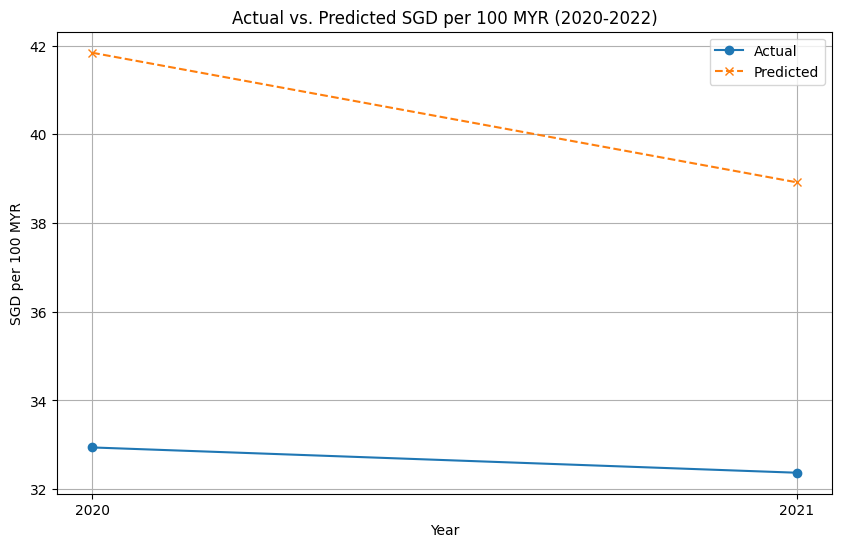

In [46]:
model_Merchandise_Trade = LinearRegression()

# Training the model
X_train_Merchandise_Trade = train_data_Merchandise_Trade[['Merchandise_Trade']]
y_train_Merchandise_Trade = train_data_Merchandise_Trade['SGD_per_100_MYR']
model_Merchandise_Trade.fit(X_train_Merchandise_Trade, y_train_Merchandise_Trade)

# Making predictions for the test set
X_test_Merchandise_Trade = test_data_Merchandise_Trade[['Merchandise_Trade']]
y_test_Merchandise_Trade = test_data_Merchandise_Trade['SGD_per_100_MYR']
predictions_Merchandise_Trade = model_Merchandise_Trade.predict(X_test_Merchandise_Trade)

# Calculating error metrics
mae_Merchandise_Trade = mean_absolute_error(y_test_Merchandise_Trade, predictions_Merchandise_Trade)
rmse_Merchandise_Trade = np.sqrt(mean_squared_error(y_test_Merchandise_Trade, predictions_Merchandise_Trade))

# Preparing the DataFrame for results display
predictions_Merchandise_Trade_df = test_data_Merchandise_Trade.copy()
predictions_Merchandise_Trade_df['Predicted_SGD_per_100_MYR'] = predictions_Merchandise_Trade

# Displaying predictions and error metrics
results_display = predictions_Merchandise_Trade_df[['Year', 'SGD_per_100_MYR', 'Predicted_SGD_per_100_MYR']]
mae_Merchandise_Trade, rmse_Merchandise_Trade  # These can be printed or returned depending on your context
print(f"RMSE: {rmse_Merchandise_Trade}")

# Plotting actual vs. predicted exchange rates for 2020-2022
plt.figure(figsize=(10, 6))
plt.plot(predictions_Merchandise_Trade_df['Year'], predictions_Merchandise_Trade_df['SGD_per_100_MYR'], label='Actual', marker='o')
plt.plot(predictions_Merchandise_Trade_df['Year'], predictions_Merchandise_Trade_df['Predicted_SGD_per_100_MYR'], label='Predicted', marker='x', linestyle='--')

plt.title('Actual vs. Predicted SGD per 100 MYR (2020-2022)')
plt.xlabel('Year')
plt.ylabel('SGD per 100 MYR')
plt.xticks(predictions_Merchandise_Trade_df['Year'].unique())  # Ensure unique years if necessary
plt.legend()
plt.grid(True)
plt.show()


In [47]:
ppp_file_path = 'Parity_Purchasing_Power.xlsx'
ppp_excel_data = pd.ExcelFile(ppp_file_path)

In [48]:
#  loading the CPI data
ppp_data = pd.read_excel(ppp_excel_data)

# Display the first few rows of the dataframe to understand its structure and contents
ppp_data.head()

# Setting the correct header and dropping unnecessary rows
ppp_data.columns = ppp_data.iloc[3]  # Setting the fourth row as the header
ppp_data = ppp_data[4:]  # Dropping the rows above the header

ppp_data.reset_index(drop=True, inplace=True)

# Dropping columns for years 1960 to 1989, 2023
years_to_drop = [int(year) for year in range(1960, 1990)] + ['2023']
ppp_data.drop(columns=years_to_drop, errors='ignore', inplace=True)

# Filter for Singapore and Malaysia
ppp_singapore_malaysia = ppp_data[(ppp_data['Country Name'] == 'Singapore') | (ppp_data['Country Name'] == 'Malaysia')]
ppp_singapore_malaysia.head()

3,Country Name,Country Code,Indicator Name,Indicator Code,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,...,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0
169,Malaysia,MYS,"GDP, PPP (current international $)",NY.GDP.MKTP.PP.CD,1.227992e+11,1.390702e+11,1.548776e+11,1.742371e+11,1.943513e+11,2.179302e+11,...,7.349475e+11,7.507771e+11,7.838741e+11,8.292970e+11,8.903629e+11,9.463337e+11,9.063687e+11,9.783216e+11,1.137789e+12,NaN
208,Singapore,SGP,"GDP, PPP (current international $)",NY.GDP.MKTP.PP.CD,7.256128e+10,8.003244e+10,8.729141e+10,9.960091e+10,1.130152e+11,1.236644e+11,...,4.617716e+11,4.814054e+11,5.018239e+11,5.350393e+11,5.674919e+11,5.853626e+11,5.698678e+11,6.483626e+11,7.193224e+11,NaN


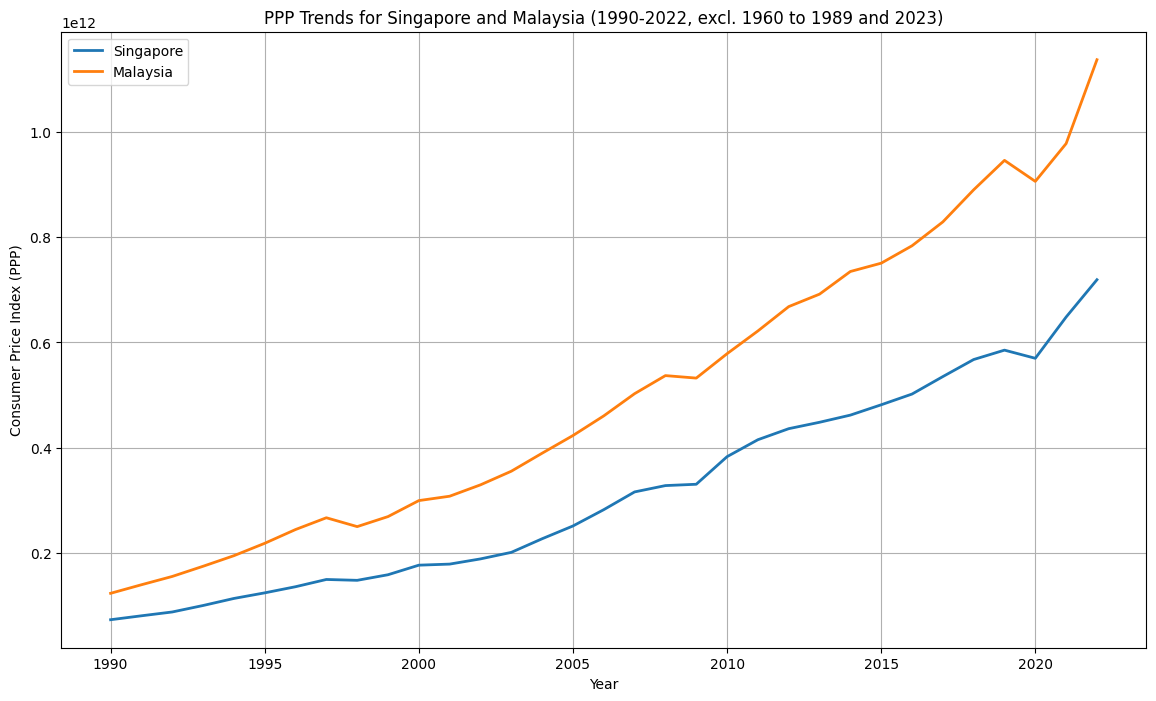

In [49]:
# Converting year columns to numeric and pivoting the dataframe for easier plotting
ppp_long_format = ppp_singapore_malaysia.melt(id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"], 
                                              var_name="Year", value_name="ppp")

# Converting 'Year' to numeric for plotting
ppp_long_format['Year'] = pd.to_numeric(ppp_long_format['Year'])

# Plotting CPI trends for Singapore and Malaysia
plt.figure(figsize=(14, 8))
for country in ['Singapore', 'Malaysia']:
    country_data = ppp_long_format[ppp_long_format['Country Name'] == country]
    plt.plot(country_data['Year'], country_data['ppp'], marker='', linewidth=2, label=country)

plt.title('PPP Trends for Singapore and Malaysia (1990-2022, excl. 1960 to 1989 and 2023)')
plt.xlabel('Year')
plt.ylabel('Consumer Price Index (PPP)')
plt.legend()
plt.grid(True)

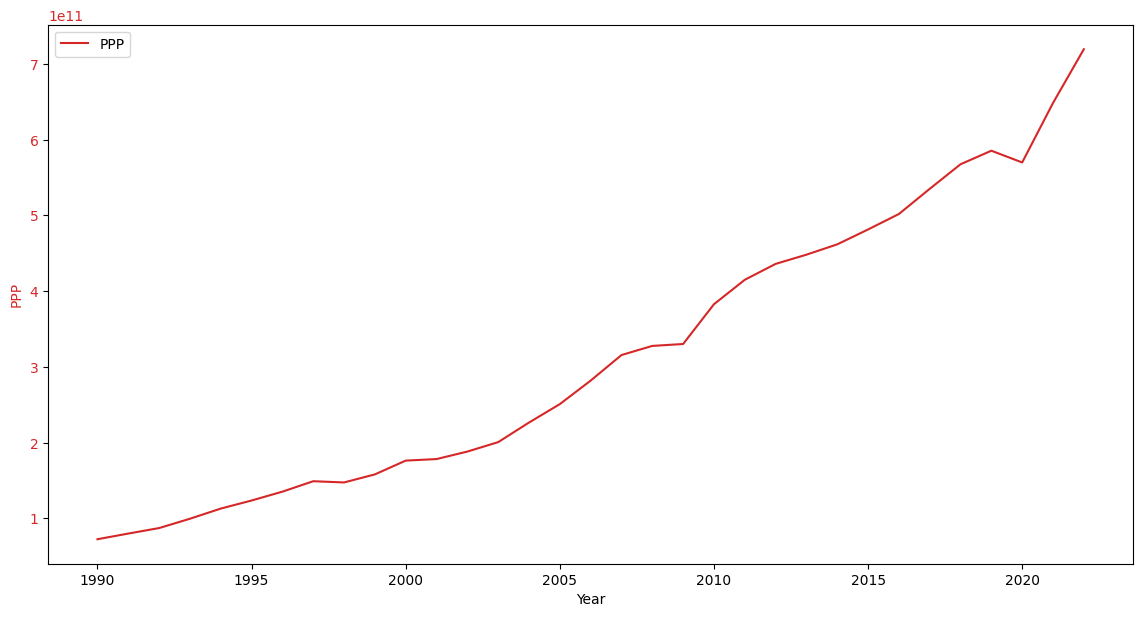

In [50]:
# Melt the PPP data into a long format
ppp_data_long = ppp_data.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], 
                              var_name='Year', 
                              value_name='PPP')

# Convert 'Year' to numeric, correcting the variable name to 'ppp_data_long'
ppp_data_long['Year'] = pd.to_numeric(ppp_data_long['Year'], errors='coerce')

# Filter for Singapore
ppp_sg = ppp_data_long[ppp_data_long['Country Name'] == 'Singapore']

# Filter years for the period 1990 - 2022, correcting variable names and filtering conditions
ppp_sg = ppp_sg[(ppp_sg['Year'] >= 1990) & (ppp_sg['Year'] <= 2022)]

exchange_rates_sg = exchange_rates_cleaned[(exchange_rates_cleaned['Year'] >= 1990) & (exchange_rates_cleaned['Year'] <= 2022)]

# Merge the datasets on 'Year'
Merge_data_ppp_sg = pd.merge(ppp_sg, exchange_rates_sg, on='Year')

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('PPP', color=color)
ax1.plot(Merge_data_ppp_sg['Year'], Merge_data_ppp_sg['PPP'], color=color, label='PPP')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

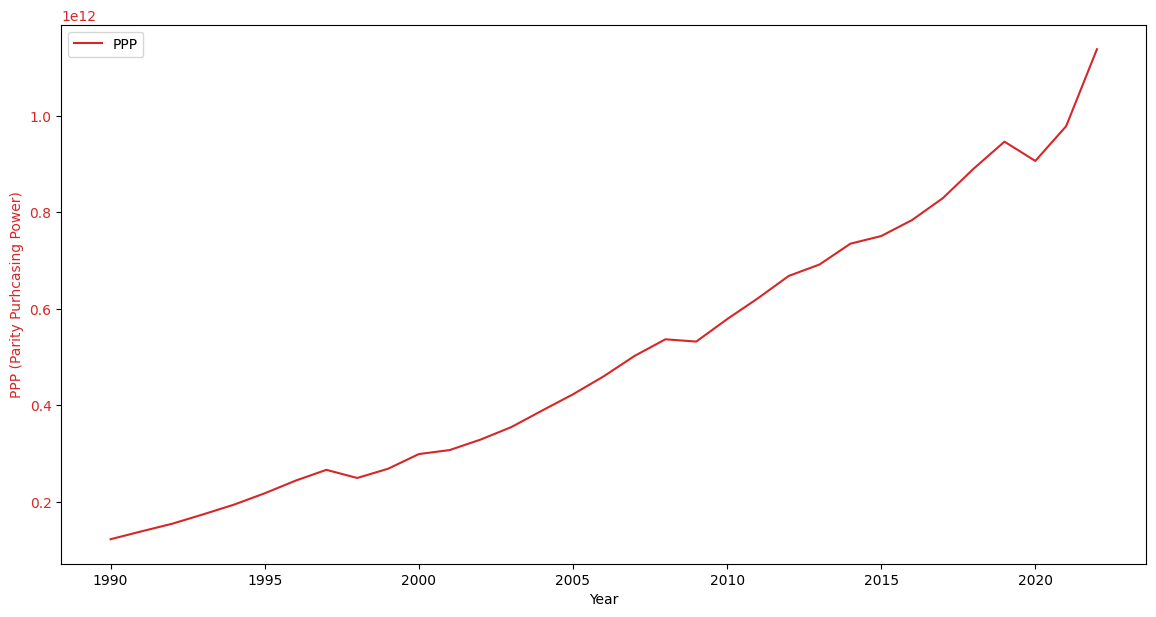

In [51]:
ppp_data_long = ppp_data.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], 
                                    var_name='Year', 
                                    value_name='PPP')
ppp_data_long['Year'] = pd.to_numeric(ppp_data_long['Year'], errors='coerce')

# Filter for Malaysia and the years 1990 - 2022
ppp_my = ppp_data_long[ppp_data_long['Country Name'] == 'Malaysia']
ppp_my = ppp_my[(ppp_my['Year'] >= 1990) & (ppp_my['Year'] <= 2022)]

exchange_rates_sg = exchange_rates_cleaned[(exchange_rates_cleaned['Year'] >= 1990) & (exchange_rates_cleaned['Year'] <= 2022)]

# Merge the datasets on 'Year'
Merge_data_ppp_my = pd.merge(ppp_my, exchange_rates_sg, on='Year', how='inner')

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('PPP (Parity Purhcasing Power)', color=color)
ax1.plot(Merge_data_ppp_my['Year'], Merge_data_ppp_my['PPP'], color=color, label='PPP')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

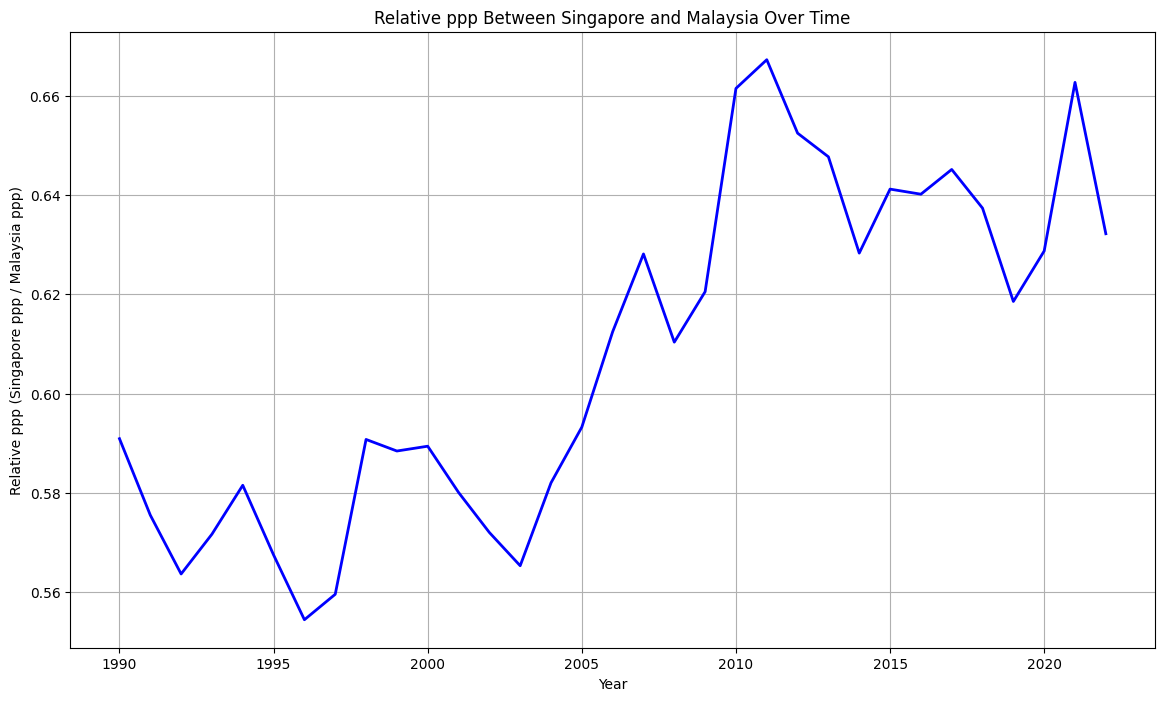

In [52]:
# Calculating Relative ppp between Singapore and Malaysia for each available year
# Relative ppp is calculated as ppp_Singapore / ppp_Malaysia

# Isolating ppp data for Singapore and Malaysia
ppp_sg = ppp_long_format[ppp_long_format['Country Name'] == 'Singapore'].set_index('Year')['ppp']
ppp_my = ppp_long_format[ppp_long_format['Country Name'] == 'Malaysia'].set_index('Year')['ppp']

# Calculating Relative ppp
relative_ppp = ppp_sg / ppp_my

# Preparing data for a simple analysis or visualization
relative_ppp_df = relative_ppp.reset_index()
relative_ppp_df.columns = ['Year', 'Relative_ppp']

# Display the first few rows to verify
relative_ppp_df.head()

# Plotting the Relative ppp over time
plt.figure(figsize=(14, 8))
plt.plot(relative_ppp_df['Year'], relative_ppp_df['Relative_ppp'], marker='', color='blue', linewidth=2)
plt.title('Relative ppp Between Singapore and Malaysia Over Time')
plt.xlabel('Year')
plt.ylabel('Relative ppp (Singapore ppp / Malaysia ppp)')
plt.grid(True)
plt.show()

General Trend: The graph shows the relative PPP between Singapore and Malaysia over approximately three decades. It exhibits a general upward trend, indicating that, over time, Singapore's currency has tended to offer more purchasing power compared to Malaysia's currency when adjusted for the cost of living.

Cyclical Movements: Despite the overall upward trend, there are noticeable cyclical patterns, with periods where the relative PPP rises and falls. This cyclicality may reflect economic cycles in each country, such as periods of expansion and contraction, or could be due to fluctuating exchange rates and inflation differentials.

In [53]:
# Note: The exchange rate data needs to be aligned with the years available in the ppp data
# We'll focus on years up to 2019 for training, and use 2020-2023 for testing our predictions

# Preparing exchange rate data for merge
exchange_rates_sg_my = exchange_rates_cleaned[['Year', 'SGD_per_100_MYR']].copy()
exchange_rates_sg_my['Year'] = pd.to_numeric(exchange_rates_sg_my['Year'])

# Merging ppp and exchange rate data on Year
Merge_data_ppp = pd.merge(left=relative_ppp_df, right=exchange_rates_sg_my, on='Year', how='inner')

# Splitting the dataset into training and testing sets
# Training set: Years up to 2019
# Testing set: Years 2020-2023
train_data_ppp = Merge_data_ppp[Merge_data_ppp['Year'] <= 2019]
test_data_ppp = Merge_data_ppp[(Merge_data_ppp['Year'] >= 2020) & (Merge_data_ppp['Year'] < 2023)]

# Checking the final structure of our training and testing datasets
train_data_ppp.tail(), test_data_ppp.head()

(      Year  Relative_ppp  SGD_per_100_MYR
 25  2015.0      0.641209            32.94
 26  2016.0      0.640184            32.24
 27  2017.0      0.645172            32.90
 28  2018.0      0.637371            32.98
 29  2019.0      0.618558            32.92,
       Year  Relative_ppp  SGD_per_100_MYR
 30  2020.0      0.628737            32.94
 31  2021.0      0.662730            32.37
 32  2022.0      0.632211            30.47)

RMSE: 6.963520349263338


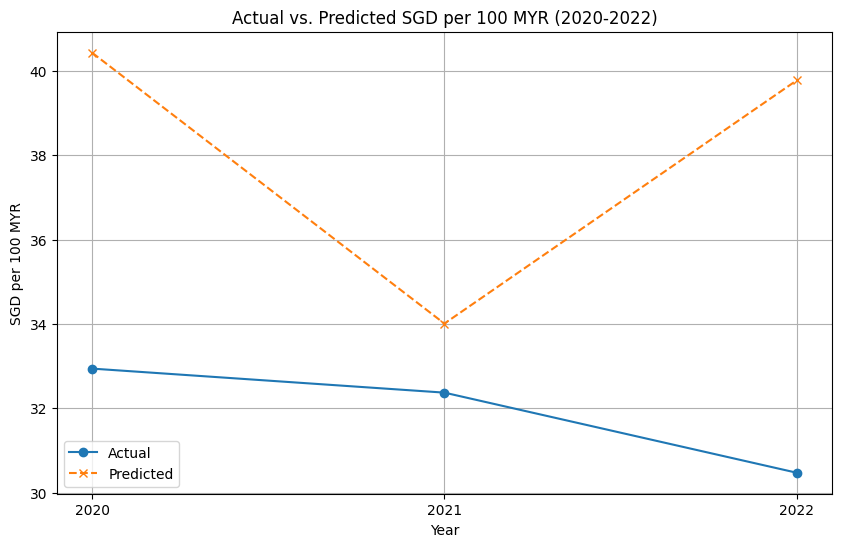

In [54]:
# Initializing the linear regression model
model_ppp = LinearRegression()

# Training the model
X_train_ppp = train_data_ppp[['Relative_ppp']]
y_train_ppp = train_data_ppp['SGD_per_100_MYR']
model_ppp.fit(X_train_ppp, y_train_ppp)

# Making predictions for the test set
X_test_ppp = test_data_ppp[['Relative_ppp']]
y_test_ppp = test_data_ppp['SGD_per_100_MYR']
predictions_ppp = model_ppp.predict(X_test_ppp)

# Calculating error metrics
mae_ppp = mean_absolute_error(y_test_ppp, predictions_ppp)
rmse_ppp = np.sqrt(mean_squared_error(y_test_ppp, predictions_ppp))
print(f"RMSE: {rmse_ppp}")

# Preparing the DataFrame for results display
predictions_ppp_df = test_data_ppp.copy()
predictions_ppp_df['Predicted_SGD_per_100_MYR'] = predictions_ppp

# Plotting actual vs. predicted exchange rates for the relevant years
plt.figure(figsize=(10, 6))
plt.plot(predictions_ppp_df['Year'], predictions_ppp_df['SGD_per_100_MYR'], label='Actual', marker='o')
plt.plot(predictions_ppp_df['Year'], predictions_ppp_df['Predicted_SGD_per_100_MYR'], label='Predicted', marker='x', linestyle='--')
plt.title('Actual vs. Predicted SGD per 100 MYR (2020-2022)')
plt.xlabel('Year')
plt.ylabel('SGD per 100 MYR')
plt.legend()
plt.grid(True)
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Justification

The choice of factors/predictors regarding the SGD to MYR exchange rate is informed by their significant impacts on economic growth, currency values, and exchange rate dynamics within the ASEAN region.

Firstly, tourism receipts emerge as a crucial determinant due to their positive effects on GDP in ASEAN countries, including Singapore and Malaysia. These findings underscore the importance of tourism as a driver of economic growth, indicating that increasing tourist arrivals can lead to higher GDP and, consequently, influence exchange rate movements.

Furthermore, the significant role of tourism in Singapore's long-run economic growth and its positive effect on Malaysia's economic growth highlight the relevance of tourism receipts as a predictor of the SGD to MYR exchange rate. Given the reliance of both countries on tourism, fluctuations in tourist arrivals and spending patterns can impact their respective currencies.

Central government debt is another pertinent factor influencing exchange rate dynamics. Studies suggest that significant effects of debt on exchange rates exist, implying that changes in government debt levels can affect currency values. As such, monitoring central government debt becomes crucial in understanding and predicting SGD to MYR exchange rate movements.

Trade balance, which reflects the difference between a country's exports and imports, also plays a crucial role. The relationship between trade balance and economic growth is well-established, with a deterioration in trade balance negatively impacting economic growth. This suggests that fluctuations in trade balance can influence currency values, including the SGD to MYR exchange rate.

Lastly, portfolio investment emerges as a significant factor affecting exchange rate volatility. Net equity and net bond portfolio inflows have been found to significantly impact exchange rate volatility in most countries. Given the importance of portfolio investment flows in shaping currency values, monitoring these inflows becomes essential in predicting SGD to MYR exchange rate movements.


### References

For ASEAN countries, "Tourism receipts and export revenues have positive effects on GDPs in the region. These results indicate that the region has potential to attract more tourists and to realize higher economic growth" (2)

"tourism in Singapore plays a vital role in its economic growth in the long-run." (1)

"tourism has a positive and momentous long-run effect on the economic growth in Malaysia." (3)

"successful economic development results in a currency appreciation with improvement in the standard of living" (4)

"significant effects of debt on the exchange rate" (5)

"deterioration of trade balance has a negative impact on economic growth or vice versa" (6)

"net equity and net bond portfolio inflows affect significantly exchange rate volatility in most countries" (7)
(The term "net equity and net bond portfolio inflows" refers to the movement of funds into a country's financial markets through investments in equities (stocks) and bonds by foreign investors.)

(1) https://www.researchgate.net/profile/Hooi-Hooi-Lean/publication/286495276_Tourism_and_economic_growth_Comparing_Malaysia_and_Singapore/links/57c3d8c308ae2f5eb3396797/Tourism-and-economic-growth-Comparing-Malaysia-and-Singapore.pdf
(2) https://link-springer-com.remotexs.ntu.edu.sg/chapter/10.1007/978-981-13-2463-5_3#Abs1
(3) https://link.springer.com/article/10.1007/s11135-014-0037-4?sa_campaign=email/event/articleAuthor/onlineFirst&error=cookies_not_supported&code=8221b8f2-2ce4-4d4e-9849-511b2b66afb8#Sec16
(4) https://www.nber.org/system/files/chapters/c8616/c8616.pdf
(5)https://www-sciencedirect-com.remotexs.ntu.edu.sg/science/article/pii/014861959090037D?via%3Dihub
(6)https://www.mdpi.com/2227-7099/8/3/54
(7) https://www-sciencedirect-com.remotexs.ntu.edu.sg/science/article/pii/S0261560617300529#s0035

<font size="6">  
    !---Tourism Receipts Analysis---!

In [55]:
tourism_file_path = 'Tourism Receipts.xlsx'
tourism_excel_data = pd.ExcelFile(tourism_file_path)

In [56]:
pd.options.display.float_format = '{:.1f}'.format

tourism_data = pd.read_excel(tourism_excel_data)

tourism_data.columns = tourism_data.iloc[2] 
tourism_data = tourism_data[4:] 

tourism_data.reset_index(drop=True, inplace=True)

tourism_data.drop(columns=[2019, 2020], inplace=True) #Singapore has no data in year 2019 and 2020

tourism_singapore_malaysia = tourism_data[(tourism_data['Country Name'] == 'Singapore') | (tourism_data['Country Name'] == 'Malaysia')]

tourism_singapore_malaysia.head()

2,Country Name,Country Code,Indicator Name,Indicator Code,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,...,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0
168,Malaysia,MYS,"International tourism, receipts (current US$)",ST.INT.RCPT.CD,5044000000.0,5732000000.0,4925000000.0,3237000000.0,4403000000.0,5873000000.0,...,17231000000.0,19619000000.0,21338000000.0,21711000000.0,23283000000.0,24469000000.0,19194000000.0,19682000000.0,20311000000.0,21775000000.0
207,Singapore,SGP,"International tourism, receipts (current US$)",ST.INT.RCPT.CD,7611000000.0,7402000000.0,6326000000.0,4603000000.0,5089000000.0,5142000000.0,...,9225000000.0,14178000000.0,17929000000.0,18795000000.0,19231000000.0,19161000000.0,16617000000.0,18944000000.0,19891000000.0,20416000000.0


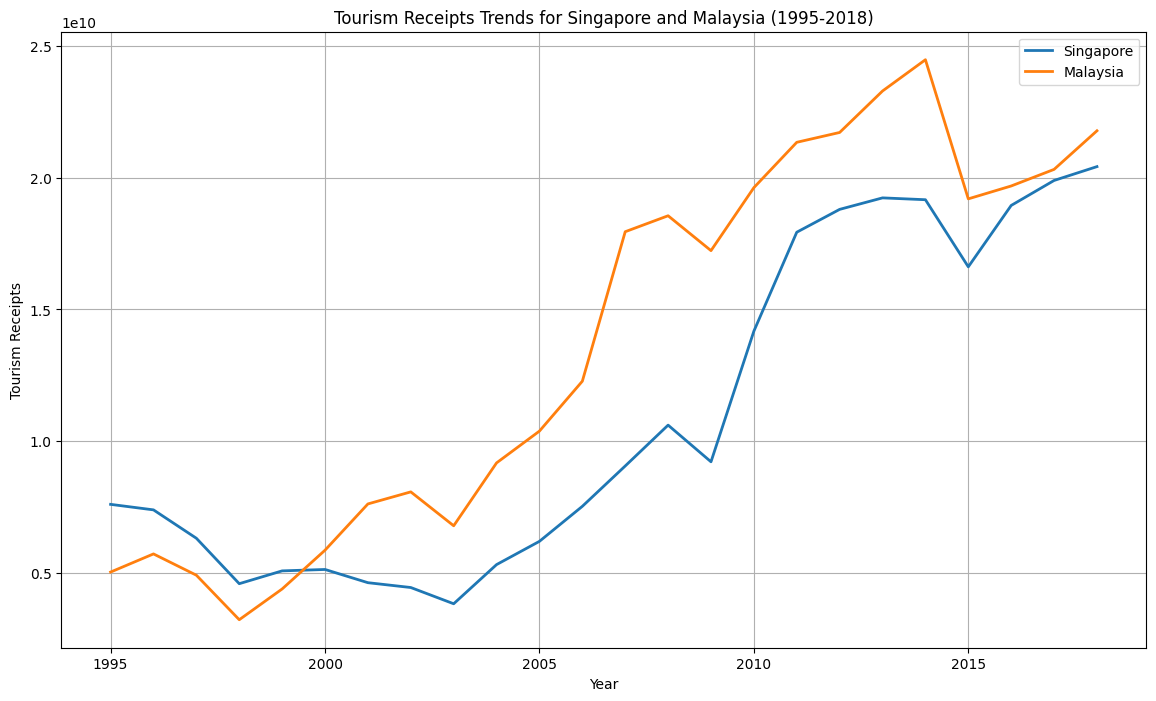

In [57]:
# Converting year columns to numeric and pivoting the dataframe for easier plotting
tourism_long_format = tourism_singapore_malaysia.melt(id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"], 
                                              var_name="Year", value_name="Tourism Receipts")

# Converting 'Year' to numeric for plotting
tourism_long_format['Year'] = pd.to_numeric(tourism_long_format['Year'])

# Plotting Tourism Receipts trends for Singapore and Malaysia
plt.figure(figsize=(14, 8))
for country in ['Singapore', 'Malaysia']:
    country_data = tourism_long_format[tourism_long_format['Country Name'] == country]
    plt.plot(country_data['Year'], country_data['Tourism Receipts'], marker='', linewidth=2, label=country)

plt.title('Tourism Receipts Trends for Singapore and Malaysia (1995-2018)')
plt.xlabel('Year')
plt.ylabel('Tourism Receipts')
plt.legend()
plt.grid(True)
plt.show()

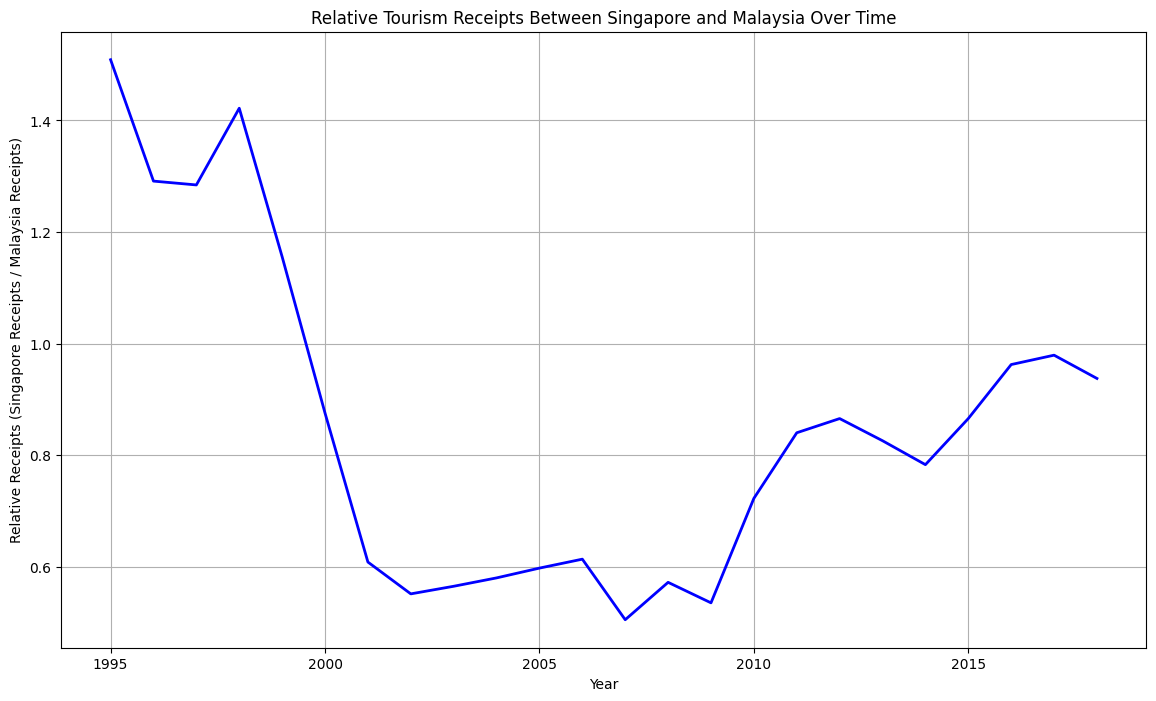

In [58]:
# Calculating Relative Receipts between Singapore and Malaysia for each available year
# Relative Receipts is calculated as Receipts_Singapore / Receipts_Malaysia

# Isolating Receipts data for Singapore and Malaysia
receipts_sg = tourism_long_format[tourism_long_format['Country Name'] == 'Singapore'].set_index('Year')['Tourism Receipts']
receipts_my = tourism_long_format[tourism_long_format['Country Name'] == 'Malaysia'].set_index('Year')['Tourism Receipts']

# Calculating Relative Receipts
relative_receipts = receipts_sg / receipts_my

# Preparing data for a simple analysis or visualization
relative_receipts_df = relative_receipts.reset_index()
relative_receipts_df.columns = ['Year', 'Relative_Receipts']

# Plotting the Relative Receipts over time
plt.figure(figsize=(14, 8))
plt.plot(relative_receipts_df['Year'], relative_receipts_df['Relative_Receipts'], marker='', color='blue', linewidth=2)
plt.title('Relative Tourism Receipts Between Singapore and Malaysia Over Time')
plt.xlabel('Year')
plt.ylabel('Relative Receipts (Singapore Receipts / Malaysia Receipts)')
plt.grid(True)
plt.show()

General Trend: The graph illustrates the relative tourism receipts between Singapore and Malaysia over a span of two decades. It shows an overall trend of fluctuations without a clear directional pattern, indicating that the tourism receipts relative to each other have varied significantly year over year.

Recent Trends: In the most recent years on the graph, the relative tourism receipts between the two countries again show some volatility. This could reflect changing travel patterns, economic factors, or new tourism attractions or infrastructures that influence tourists' choice between the two destinations.

In [59]:
exchange_rates_sg_my = exchange_rates_cleaned[['Year', 'SGD_per_100_MYR']].copy()
exchange_rates_sg_my['Year'] = pd.to_numeric(exchange_rates_sg_my['Year'])

merged_data_tourism = pd.merge(left=relative_receipts_df, right=exchange_rates_sg_my, on='Year', how='inner')

# Splitting the dataset into training and testing sets
# Training set: Years up to 2014
# Testing set: Years 2015-2018
train_data = merged_data_tourism[merged_data_tourism['Year'] <= 2014]
test_data = merged_data_tourism[(merged_data_tourism['Year'] >= 2015) & (merged_data_tourism['Year'] <= 2018)]

train_data.tail(), test_data.head()

(     Year  Relative_Receipts  SGD_per_100_MYR
 15 2010.0                0.7             41.8
 16 2011.0                0.8             40.9
 17 2012.0                0.9             40.0
 18 2013.0                0.8             38.6
 19 2014.0                0.8             37.8,
      Year  Relative_Receipts  SGD_per_100_MYR
 20 2015.0                0.9             32.9
 21 2016.0                1.0             32.2
 22 2017.0                1.0             32.9
 23 2018.0                0.9             33.0)

RMSE: 12.027814516954928


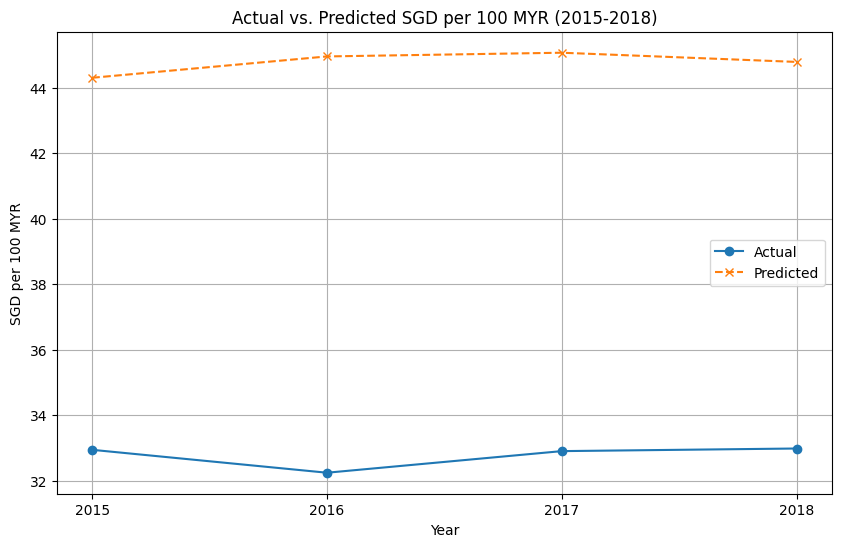

In [60]:
# Initializing the linear regression model
model = LinearRegression()

# Training the model
X_train = train_data[['Relative_Receipts']]
y_train = train_data['SGD_per_100_MYR']
model.fit(X_train, y_train)

# Making predictions for the test set
X_test = test_data[['Relative_Receipts']]
y_test = test_data['SGD_per_100_MYR']
predictions = model.predict(X_test)

# Calculating error metrics
mae_tourism = mean_absolute_error(y_test, predictions)
rmse_tourism = np.sqrt(mean_squared_error(y_test, predictions))
print(f"RMSE: {rmse_tourism}")

# Displaying predictions and error metrics
predictions_df = test_data.copy()
predictions_df['Predicted_SGD_per_100_MYR'] = predictions
predictions_df[['Year', 'SGD_per_100_MYR', 'Predicted_SGD_per_100_MYR']]

# Plotting actual vs. predicted exchange rates for 2020-2022
plt.figure(figsize=(10, 6))
plt.plot(predictions_df['Year'], predictions_df['SGD_per_100_MYR'], label='Actual', marker='o')
plt.plot(predictions_df['Year'], predictions_df['Predicted_SGD_per_100_MYR'], label='Predicted', marker='x', linestyle='--')

plt.title('Actual vs. Predicted SGD per 100 MYR (2015-2018)')
plt.xlabel('Year')
plt.ylabel('SGD per 100 MYR')
plt.xticks(predictions_df['Year'])
plt.legend()
plt.grid(True)
plt.show()

<font size="6">  
    !---Central Government Debt Analysis---!

In [61]:
debt_file_path = 'Central Government Debt.xlsx'
debt_excel_data = pd.ExcelFile(debt_file_path)

In [62]:
debt_data = pd.read_excel(debt_excel_data)

debt_data.columns = debt_data.iloc[2] 
debt_data = debt_data[4:] 

debt_data.reset_index(drop=True, inplace=True)

debt_data.drop(columns=[1996, 1997, 1998, 1999, 2000, 2001, 2022], inplace=True) #These years do not have data

debt_singapore_malaysia = debt_data[(debt_data['Country Name'] == 'Singapore') | (debt_data['Country Name'] == 'Malaysia')]

debt_singapore_malaysia.head()

2,Country Name,Country Code,Indicator Name,Indicator Code,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
168,Malaysia,MYS,"Central government debt, total (% of GDP)",GC.DOD.TOTL.GD.ZS,79.5,73.3,64.4,55.7,47.6,41.1,...,51.6,53.0,52.7,53.6,51.9,50.0,51.2,52.4,62.0,63.3
207,Singapore,SGP,"Central government debt, total (% of GDP)",GC.DOD.TOTL.GD.ZS,77.9,79.0,81.9,72.9,70.3,72.8,...,107.8,99.4,99.6,103.3,109.1,109.3,110.8,127.8,152.0,153.8


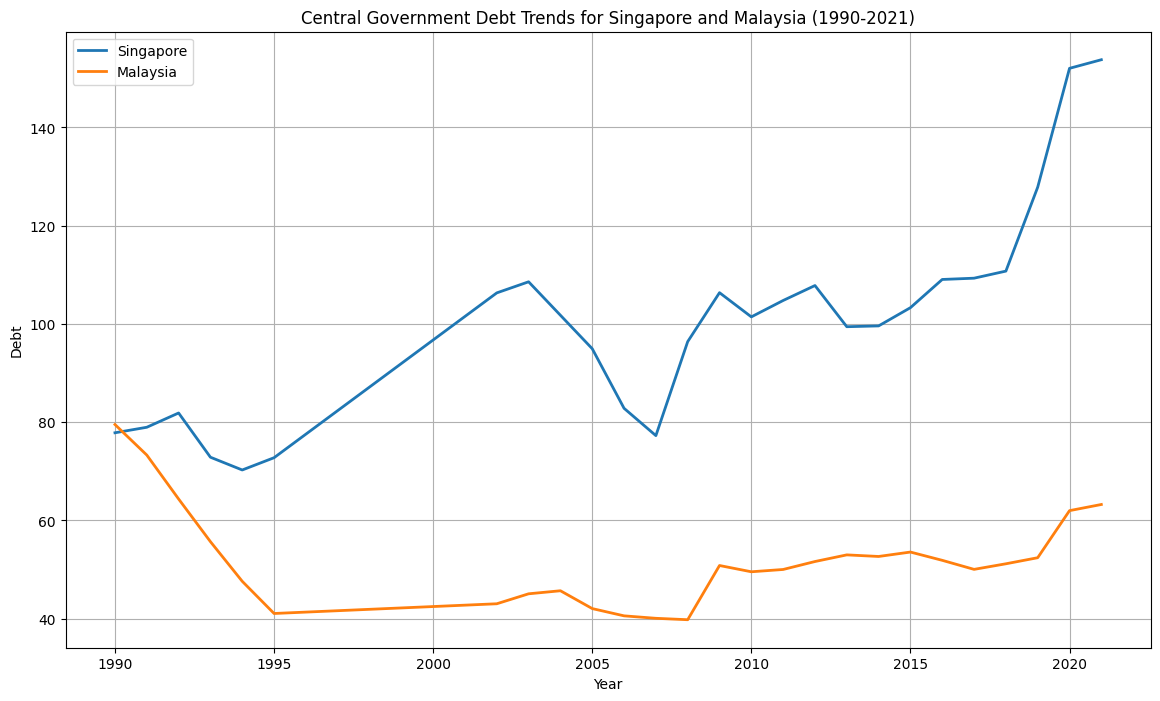

In [63]:
# Converting year columns to numeric and pivoting the dataframe for easier plotting
debt_long_format = debt_singapore_malaysia.melt(id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"], 
                                              var_name="Year", value_name="Debt")

# Converting 'Year' to numeric for plotting
debt_long_format['Year'] = pd.to_numeric(debt_long_format['Year'])

# Plotting Central Government Debt Trends trends for Singapore and Malaysia
plt.figure(figsize=(14, 8))
for country in ['Singapore', 'Malaysia']:
    country_data = debt_long_format[debt_long_format['Country Name'] == country]
    plt.plot(country_data['Year'], country_data['Debt'], marker='', linewidth=2, label=country)

plt.title('Central Government Debt Trends for Singapore and Malaysia (1990-2021)')
plt.xlabel('Year')
plt.ylabel('Debt')
plt.legend()
plt.grid(True)
plt.show()

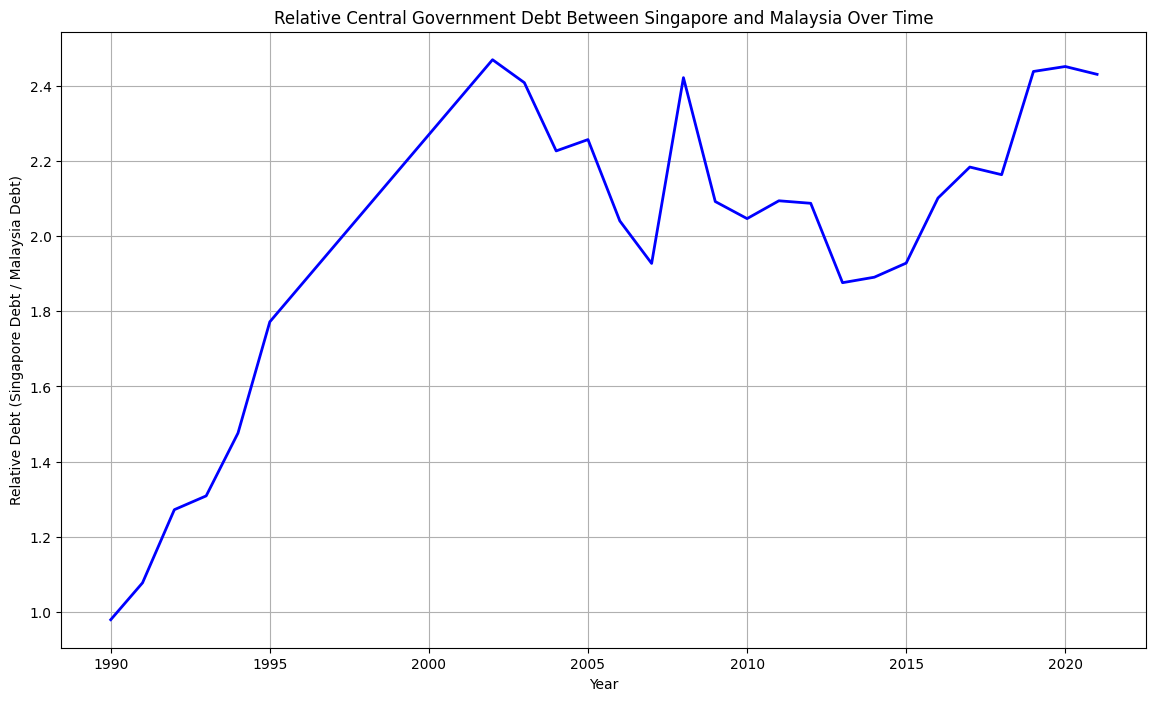

In [64]:
# Calculating Relative Debt between Singapore and Malaysia for each available year
# Relative Debt is calculated as Debt_Singapore / Debt_Malaysia

# Isolating Debt data for Singapore and Malaysia
debt_sg = debt_long_format[debt_long_format['Country Name'] == 'Singapore'].set_index('Year')['Debt']
debt_my = debt_long_format[debt_long_format['Country Name'] == 'Malaysia'].set_index('Year')['Debt']

# Calculating Relative Debt
relative_debt = debt_sg / debt_my

# Preparing data for a simple analysis or visualization
relative_debt_df = relative_debt.reset_index()
relative_debt_df.columns = ['Year', 'Relative_Debt']

# Plotting the Relative Debt over time
plt.figure(figsize=(14, 8))
plt.plot(relative_debt_df['Year'], relative_debt_df['Relative_Debt'], marker='', color='blue', linewidth=2)
plt.title('Relative Central Government Debt Between Singapore and Malaysia Over Time')
plt.xlabel('Year')
plt.ylabel('Relative Debt (Singapore Debt / Malaysia Debt)')
plt.grid(True)
plt.show()

Overall Trend: The graph depicting the relative central government debt between Singapore and Malaysia indicates a general upward trend since the early 1990s, showing that Singapore's government debt has been increasing relative to Malaysia's over this period.

A larger relative debt does not necessarily imply fiscal irresponsibility; it might also reflect strategic long-term investments that could benefit the country's economy in the future.

Potential Impact of Global Events: Significant global events, such as the Asian Financial Crisis, the 2008 Financial Crisis, and other economic downturns, might have influenced these debt trends, as governments typically increase spending to stimulate the economy during such periods.

In [65]:
exchange_rates_sg_my = exchange_rates_cleaned[['Year', 'SGD_per_100_MYR']].copy()
exchange_rates_sg_my['Year'] = pd.to_numeric(exchange_rates_sg_my['Year'])

merged_data = pd.merge(left=relative_debt_df, right=exchange_rates_sg_my, on='Year', how='inner')

# Splitting the dataset into training and testing sets
# Training set: Years up to 2017
# Testing set: Years 2018-2021
train_data = merged_data[merged_data['Year'] <= 2017]
test_data = merged_data[(merged_data['Year'] >= 2018) & (merged_data['Year'] <= 2021)]

train_data.tail(), test_data.head()

(     Year  Relative_Debt  SGD_per_100_MYR
 17 2013.0            1.9             38.6
 18 2014.0            1.9             37.8
 19 2015.0            1.9             32.9
 20 2016.0            2.1             32.2
 21 2017.0            2.2             32.9,
      Year  Relative_Debt  SGD_per_100_MYR
 22 2018.0            2.2             33.0
 23 2019.0            2.4             32.9
 24 2020.0            2.5             32.9
 25 2021.0            2.4             32.4)

RMSE: 4.948379981940758


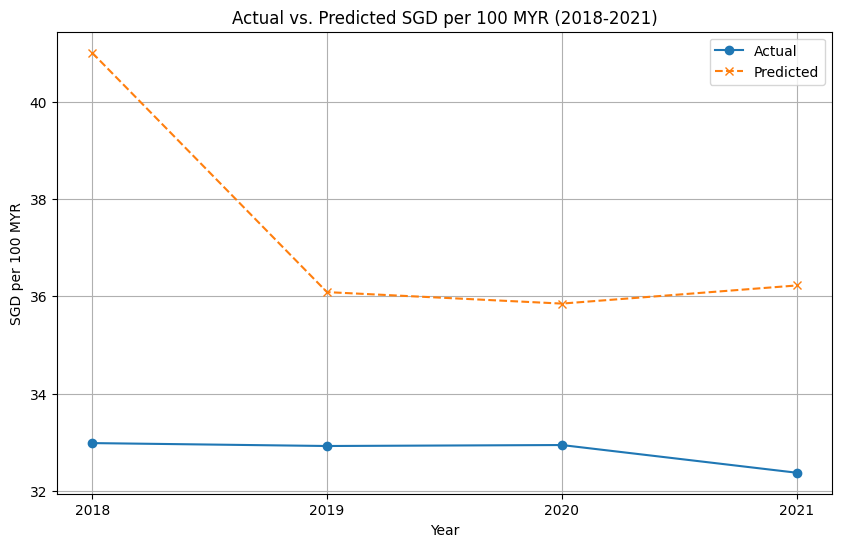

In [66]:
# Initializing the linear regression model
model = LinearRegression()

# Training the model
X_train = train_data[['Relative_Debt']]
y_train = train_data['SGD_per_100_MYR']
model.fit(X_train, y_train)

# Making predictions for the test set
X_test = test_data[['Relative_Debt']]
y_test = test_data['SGD_per_100_MYR']
predictions = model.predict(X_test)

# Calculating error metrics
mae_debt = mean_absolute_error(y_test, predictions)
rmse_debt = np.sqrt(mean_squared_error(y_test, predictions))
print(f"RMSE: {rmse_debt}")

# Displaying predictions and error metrics
predictions_df = test_data.copy()
predictions_df['Predicted_SGD_per_100_MYR'] = predictions
predictions_df[['Year', 'SGD_per_100_MYR', 'Predicted_SGD_per_100_MYR']]

# Plotting actual vs. predicted exchange rates for 2020-2022
plt.figure(figsize=(10, 6))
plt.plot(predictions_df['Year'], predictions_df['SGD_per_100_MYR'], label='Actual', marker='o')
plt.plot(predictions_df['Year'], predictions_df['Predicted_SGD_per_100_MYR'], label='Predicted', marker='x', linestyle='--')

plt.title('Actual vs. Predicted SGD per 100 MYR (2018-2021)')
plt.xlabel('Year')
plt.ylabel('SGD per 100 MYR')
plt.xticks(predictions_df['Year'])
plt.legend()
plt.grid(True)
plt.show()

<font size="6">  
    !---Trade Balance Analysis---!

In [67]:
balance_file_path = 'Trade Balance.xlsx'
balance_excel_data = pd.ExcelFile(balance_file_path)

In [68]:
balance_data = pd.read_excel(balance_excel_data)

balance_singapore_malaysia = balance_data[(balance_data['Trade Flow'] == 'Trade Balance')]

balance_singapore_malaysia.head()

,Reporter Name,Partner Name,Trade Flow,Product Group,Indicator,1989,1990,1991,1992,1993,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
2,Singapore,World,Trade Balance,All Products,Trade Balance (US$ Thousand),-5002498.0,-8074317.8,-7140380.7,-8710533.1,-11225014.3,...,29782418.0,31884955.9,37480603.7,49819573.8,46173601.7,45544841.3,41239773.2,31357120.2,45059274.4,50851619.4
5,Malaysia,World,Trade Balance,All Products,Trade Balance (US$ Thousand),2567292.9,207611.9,-2233567.2,980111.4,1737207.8,...,31252880.9,22502582.7,25311548.2,24036273.7,21038844.9,23002320.4,30693264.9,35181410.3,43645735.5,60980671.7


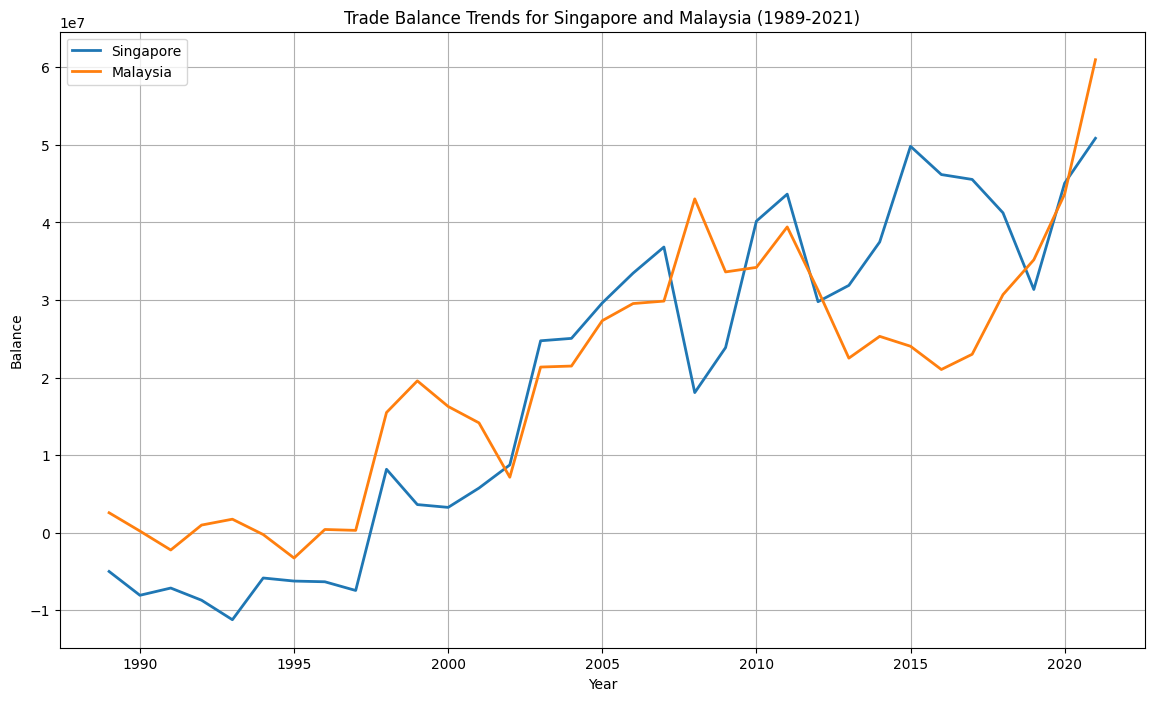

In [69]:
# Converting year columns to numeric and pivoting the dataframe for easier plotting
balance_long_format = balance_singapore_malaysia.melt(id_vars=["Reporter Name", "Partner Name", "Trade Flow","Product Group", "Indicator"], 
                                              var_name="Year", value_name="Balance")

# Converting 'Year' to numeric for plotting
balance_long_format['Year'] = pd.to_numeric(balance_long_format['Year'])

# Plotting Central Government Debt Trends trends for Singapore and Malaysia
plt.figure(figsize=(14, 8))
for country in ['Singapore', 'Malaysia']:
    country_data = balance_long_format[balance_long_format['Reporter Name'] == country]
    plt.plot(country_data['Year'], country_data['Balance'], marker='', linewidth=2, label=country)

plt.title('Trade Balance Trends for Singapore and Malaysia (1989-2021)')
plt.xlabel('Year')
plt.ylabel('Balance')
plt.legend()
plt.grid(True)
plt.show()

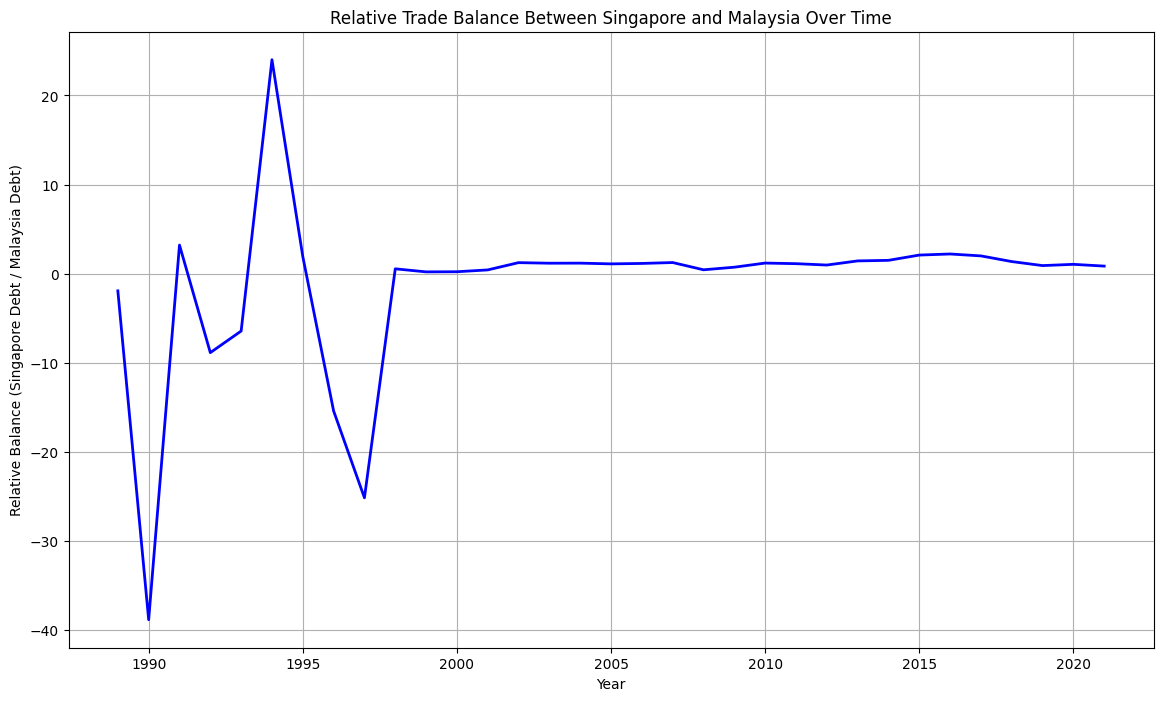

In [70]:
# Calculating Relative Balance between Singapore and Malaysia for each available year
# Relative Balance is calculated as Balance_Singapore / Balance_Malaysia

# Isolating Debt data for Singapore and Malaysia
balance_sg = balance_long_format[balance_long_format['Reporter Name'] == 'Singapore'].set_index('Year')['Balance']
balance_my = balance_long_format[balance_long_format['Reporter Name'] == 'Malaysia'].set_index('Year')['Balance']

# Calculating Relative Debt
relative_balance = balance_sg / balance_my

# Preparing data for a simple analysis or visualization
relative_balance_df = relative_balance.reset_index()
relative_balance_df.columns = ['Year', 'Relative_Balance']

# Plotting the Relative Debt over time
plt.figure(figsize=(14, 8))
plt.plot(relative_balance_df['Year'], relative_balance_df['Relative_Balance'], marker='', color='blue', linewidth=2)
plt.title('Relative Trade Balance Between Singapore and Malaysia Over Time')
plt.xlabel('Year')
plt.ylabel('Relative Balance (Singapore Debt / Malaysia Debt)')
plt.grid(True)
plt.show()

Initial Fluctuations: The graph exhibits significant fluctuations in the relative trade balance between Singapore and Malaysia from the early 1990s to the early 2000s. These fluctuations indicate that there were periods when one country had a trade surplus relative to the other and vice versa.

Sharp Variations: There are a few sharp variations in the graph, particularly noticeable in the early 1990s and around 2000. Such sharp increases and decreases could correspond to economic events that drastically changed the trade dynamics between the two countries, such as financial crises, sudden shifts in trade policies, or significant changes in global market demands.

Stabilization Trend: Since around 2005, the relative trade balance line appears to level off, suggesting a period of relative stabilization in trade balance between Singapore and Malaysia. The trade balance becomes less volatile and more predictable, which could indicate more balanced trade relations or synchronized economic growth patterns.

Recent Plateau: In the most recent years, the relative trade balance appears to plateau, with minor ups and downs, which might suggest that the countries have reached some form of trade equilibrium or that their economic cycles have become more synchronized.

In [71]:
exchange_rates_sg_my = exchange_rates_cleaned[['Year', 'SGD_per_100_MYR']].copy()
exchange_rates_sg_my['Year'] = pd.to_numeric(exchange_rates_sg_my['Year'])

merged_data_balance = pd.merge(left=relative_balance_df, right=exchange_rates_sg_my, on='Year', how='inner')

# Splitting the dataset into training and testing sets
# Training set: Years up to 2017
# Testing set: Years 2018-2021
train_data = merged_data_balance[merged_data_balance['Year'] <= 2017]
test_data = merged_data_balance[(merged_data_balance['Year'] >= 2018) & (merged_data_balance['Year'] <= 2021)]

train_data.tail(), test_data.head()

(    Year  Relative_Balance  SGD_per_100_MYR
 24  2013               1.4             38.6
 25  2014               1.5             37.8
 26  2015               2.1             32.9
 27  2016               2.2             32.2
 28  2017               2.0             32.9,
     Year  Relative_Balance  SGD_per_100_MYR
 29  2018               1.3             33.0
 30  2019               0.9             32.9
 31  2020               1.0             32.9
 32  2021               0.8             32.4)

RMSE: 13.166602106417008


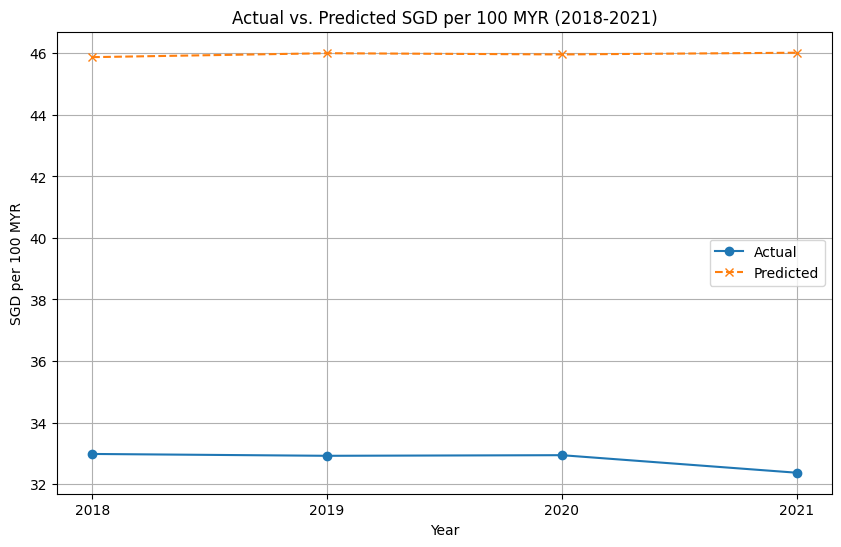

In [72]:
# Initializing the linear regression model
model = LinearRegression()

# Training the model
X_train = train_data[['Relative_Balance']]
y_train = train_data['SGD_per_100_MYR']
model.fit(X_train, y_train)

# Making predictions for the test set
X_test = test_data[['Relative_Balance']]
y_test = test_data['SGD_per_100_MYR']
predictions = model.predict(X_test)

# Calculating error metrics
mae_balance = mean_absolute_error(y_test, predictions)
rmse_balance = np.sqrt(mean_squared_error(y_test, predictions))
print(f"RMSE: {rmse_balance}")

# Displaying predictions and error metrics
predictions_df = test_data.copy()
predictions_df['Predicted_SGD_per_100_MYR'] = predictions
predictions_df[['Year', 'SGD_per_100_MYR', 'Predicted_SGD_per_100_MYR']]

# Plotting actual vs. predicted exchange rates for 2020-2022
plt.figure(figsize=(10, 6))
plt.plot(predictions_df['Year'], predictions_df['SGD_per_100_MYR'], label='Actual', marker='o')
plt.plot(predictions_df['Year'], predictions_df['Predicted_SGD_per_100_MYR'], label='Predicted', marker='x', linestyle='--')

plt.title('Actual vs. Predicted SGD per 100 MYR (2018-2021)')
plt.xlabel('Year')
plt.ylabel('SGD per 100 MYR')
plt.xticks(predictions_df['Year'])
plt.legend()
plt.grid(True)
plt.show()

<font size="6">  
    !---Portfolio Investment Analysis---!

In [73]:
investment_file_path = 'Portfolio Investment.xlsx'
investment_excel_data = pd.ExcelFile(investment_file_path)

In [74]:
investment_data = pd.read_excel(investment_excel_data)

investment_data.columns = investment_data.iloc[2] 
investment_data = investment_data[4:] 

investment_data.reset_index(drop=True, inplace=True)

investment_data.drop(columns=[1960, 1961, 1962, 1963, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 2023], inplace=True)

investment_singapore_malaysia = investment_data[(investment_data['Country Name'] == 'Singapore') | (investment_data['Country Name'] == 'Malaysia')]

investment_singapore_malaysia.head()

2,Country Name,Country Code,Indicator Name,Indicator Code,1974.0,1975.0,1976.0,1977.0,1978.0,1979.0,...,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0
168,Malaysia,MYS,"Portfolio investment, net (BoP, current US$)",BN.KLT.PTXL.CD,-12463302.5,-268194698.8,-51542842.5,-62568985.0,-79014122.5,-194202115.0,...,813576453.4,11883325038.9,7226139225.4,3331961295.8,3298702715.9,12431150395.9,7757677164.5,12033737658.1,-4560040626.0,11398009256.1
207,Singapore,SGP,"Portfolio investment, net (BoP, current US$)",BN.KLT.PTXL.CD,-15183432.3,2108548.1,-50185328.2,-95925227.5,126647684.2,77716931.1,...,64035962598.9,46534154137.6,61651555652.5,14489054096.8,19903760160.8,53044179882.7,108603888844.8,60513574401.0,60334726891.5,69207011605.4


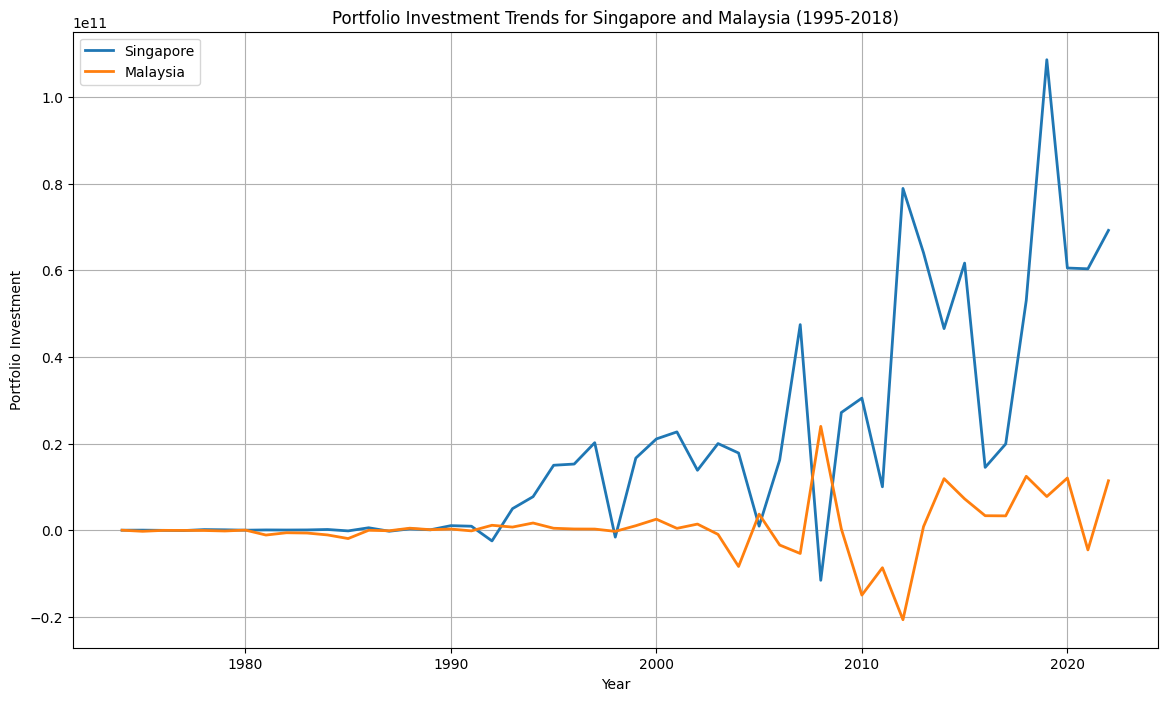

In [75]:
# Converting year columns to numeric and pivoting the dataframe for easier plotting
investment_long_format = investment_singapore_malaysia.melt(id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"], 
                                              var_name="Year", value_name="Portfolio Investment")

# Converting 'Year' to numeric for plotting
investment_long_format['Year'] = pd.to_numeric(investment_long_format['Year'])

# Plotting Portfolio Investment trends for Singapore and Malaysia
plt.figure(figsize=(14, 8))
for country in ['Singapore', 'Malaysia']:
    country_data = investment_long_format[investment_long_format['Country Name'] == country]
    plt.plot(country_data['Year'], country_data['Portfolio Investment'], marker='', linewidth=2, label=country)

plt.title('Portfolio Investment Trends for Singapore and Malaysia (1995-2018)')
plt.xlabel('Year')
plt.ylabel('Portfolio Investment')
plt.legend()
plt.grid(True)
plt.show()

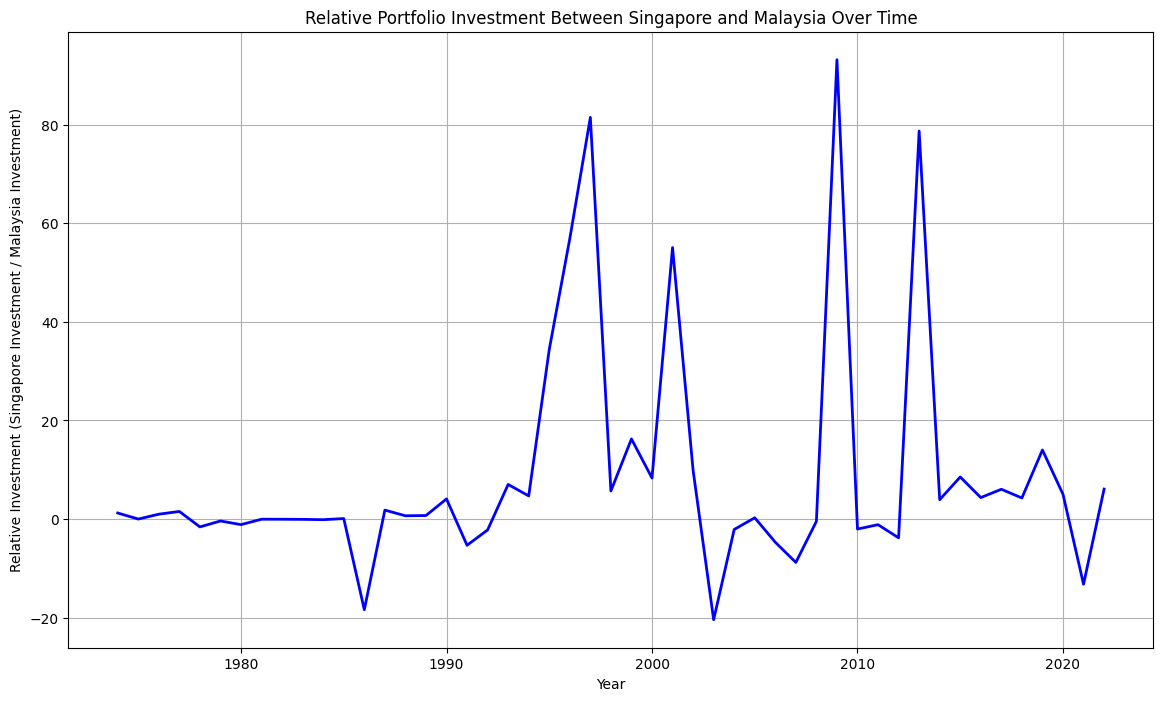

In [76]:
# Calculating Relative Investment between Singapore and Malaysia for each available year
# Relative Investment is calculated as Investment_Singapore / Investment_Malaysia

# Isolating Investment data for Singapore and Malaysia
investment_sg = investment_long_format[investment_long_format['Country Name'] == 'Singapore'].set_index('Year')['Portfolio Investment']
investment_my = investment_long_format[investment_long_format['Country Name'] == 'Malaysia'].set_index('Year')['Portfolio Investment']

# Calculating Relative Investment
relative_investment = investment_sg / investment_my

# Preparing data for a simple analysis or visualization
relative_investment_df = relative_investment.reset_index()
relative_investment_df.columns = ['Year', 'Relative_Investment']

# Plotting the Relative Investment over time
plt.figure(figsize=(14, 8))
plt.plot(relative_investment_df['Year'], relative_investment_df['Relative_Investment'], marker='', color='blue', linewidth=2)
plt.title('Relative Portfolio Investment Between Singapore and Malaysia Over Time')
plt.xlabel('Year')
plt.ylabel('Relative Investment (Singapore Investment / Malaysia Investment)')
plt.grid(True)
plt.show()

Overall Trend: Despite the volatility, there doesn't appear to be a clear long-term trend in one direction or another, suggesting that over the long term, the relative attractiveness of Singapore and Malaysia for portfolio investors has fluctuated without a persistent bias towards one market.

Volatility in Investment Flows: The graph shows significant volatility in relative portfolio investment between Singapore and Malaysia. Sharp spikes and deep troughs indicate periods of intense investment activity followed by potential divestments or reduced investment levels.

Dramatic Peaks: There are particularly dramatic peaks observed in the graph, most notably in the late 1990s and the early 2010s. These could correspond to periods of economic optimism or investor sentiment favoring one country's financial markets over the other's, perhaps influenced by economic reforms, favorable market conditions, or changes in investor risk appetite.

Stabilization Phases: Between the peaks and troughs, there are phases where the relative portfolio investment appears to stabilize. These phases may indicate a more balanced investment climate where inflows and outflows between the two countries' markets are more or less equal, or when market conditions do not drastically favor one over the other.

In [77]:
exchange_rates_sg_my = exchange_rates_cleaned[['Year', 'SGD_per_100_MYR']].copy()
exchange_rates_sg_my['Year'] = pd.to_numeric(exchange_rates_sg_my['Year'])

merged_data = pd.merge(left=relative_investment_df, right=exchange_rates_sg_my, on='Year', how='inner')

# Splitting the dataset into training and testing sets
# Training set: Years up to 2014
# Testing set: Years 2015-2018
train_data = merged_data[merged_data['Year'] <= 1999]
test_data = merged_data[(merged_data['Year'] >= 2020) & (merged_data['Year'] <= 2022)]

train_data.tail(), test_data.head()

(     Year  Relative_Investment  SGD_per_100_MYR
 7  1995.0                 34.4             55.7
 8  1996.0                 56.9             55.4
 9  1997.0                 81.5             43.1
 10 1998.0                  5.7             43.7
 11 1999.0                 16.2             43.8,
      Year  Relative_Investment  SGD_per_100_MYR
 32 2020.0                  5.0             32.9
 33 2021.0                -13.2             32.4
 34 2022.0                  6.1             30.5)

RMSE: 28.93802361537887


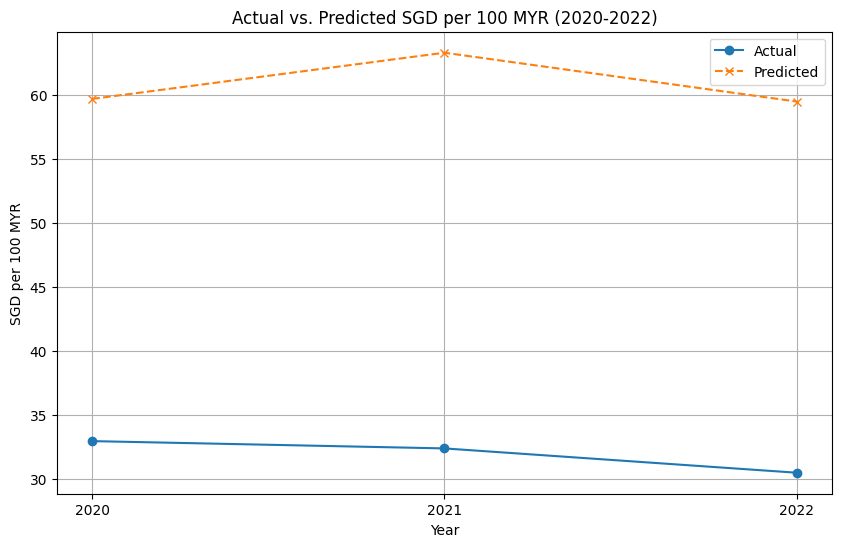

In [78]:
# Initializing the linear regression model
model = LinearRegression()

# Training the model
X_train = train_data[['Relative_Investment']]
y_train = train_data['SGD_per_100_MYR']
model.fit(X_train, y_train)

# Making predictions for the test set
X_test = test_data[['Relative_Investment']]
y_test = test_data['SGD_per_100_MYR']
predictions = model.predict(X_test)

# Calculating error metrics
mae_investment = mean_absolute_error(y_test, predictions)
rmse_investment = np.sqrt(mean_squared_error(y_test, predictions))
print(f"RMSE: {rmse_investment}")

# Displaying predictions and error metrics
predictions_df = test_data.copy()
predictions_df['Predicted_SGD_per_100_MYR'] = predictions
predictions_df[['Year', 'SGD_per_100_MYR', 'Predicted_SGD_per_100_MYR']]

# Plotting actual vs. predicted exchange rates for 2020-2022
plt.figure(figsize=(10, 6))
plt.plot(predictions_df['Year'], predictions_df['SGD_per_100_MYR'], label='Actual', marker='o')
plt.plot(predictions_df['Year'], predictions_df['Predicted_SGD_per_100_MYR'], label='Predicted', marker='x', linestyle='--')

plt.title('Actual vs. Predicted SGD per 100 MYR (2020-2022)')
plt.xlabel('Year')
plt.ylabel('SGD per 100 MYR')
plt.xticks(predictions_df['Year'])
plt.legend()
plt.grid(True)
plt.show()

<font size="9">
    End of EDA for currency exchange factors

<font size="9">
    Start of predicting future Currency Exchange Rates

# Predicting exchange rates with no NaN values

     Year  Relative_CPI   GDP_Malaysia  GDP_Singapore  \
35 1995.0           1.2  88705342902.7  87812540788.4   
42 2002.0           1.0 100845526315.8  92538372869.7   
43 2003.0           1.0 110202368421.1  97646401095.6   
44 2004.0           1.0 124749473684.2 115033593101.0   
45 2005.0           1.0 143534405818.5 127807848728.4   

    Employment_to_Population_Rate_Malaysia  \
35                                    59.3   
42                                    59.0   
43                                    58.8   
44                                    58.7   
45                                    58.6   

    Employment_to_Population_Rate_Singapore  Relative_Inflation  \
35                                     62.1                 0.5   
42                                     61.7                -0.2   
43                                     61.6                 0.5   
44                                     61.6                 1.2   
45                                     62.5  

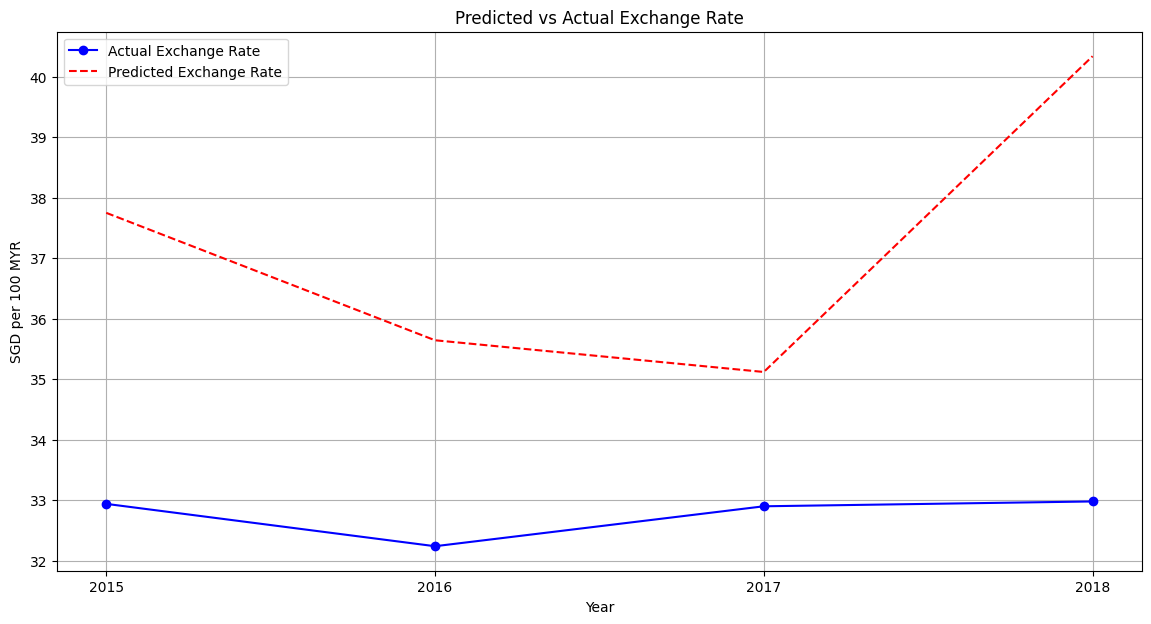

In [79]:
# Start with the first dataframe as the base
final_df = relative_cpi_df

# List of all other dataframes to be merged
dataframes_to_merge = [
    gdp_pivoted,
    employment_pivoted,
    relative_inflation_df,
    relative_Real_Interest_df,
    relative_Merchandise_Trade_df,
    relative_receipts_df,
    relative_ppp_df,
    relative_debt_df,
    relative_balance_df,
    relative_investment_df,
    exchange_rates_cleaned
]

# Merge each dataframe with the base using 'Year' as the key
for df in dataframes_to_merge:
    final_df = pd.merge(final_df, df, on='Year', how='outer')

final_df = final_df.dropna()
print(final_df.head())
final_df.set_index('Year', inplace=True)

X = final_df.drop(['SGD_per_100_MYR'], axis=1)  # Drop the target variable
y = final_df['SGD_per_100_MYR']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Define base models
base_models = [
    ('dt_reg', DecisionTreeRegressor()),
    ('svr', SVR()),
    ('rf', RandomForestRegressor()),
    ('knn', KNeighborsRegressor(n_neighbors=5))
]

# Define the meta-learner model
meta_learner = LinearRegression()

# Create the stacking ensemble
stacking_ensemble = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_learner,
    cv=5  # Number of folds in cross-validation
)

# Train the stacking ensemble
stacking_ensemble.fit(X_train, y_train)

# Evaluate the model
y_pred = stacking_ensemble.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"RMSE: {rmse}")

# Convert y_test and y_pred to dataframes to use the 'Year' index
y_test_df = pd.DataFrame(y_test)
y_test_df['Predicted'] = pd.Series(y_pred, index=y_test_df.index)

# Plot the actual vs predicted exchange rate using 'Year' as the x-axis
plt.figure(figsize=(14, 7))
plt.plot(y_test_df.index, y_test_df['SGD_per_100_MYR'], label='Actual Exchange Rate', color='blue', marker='o')
plt.plot(y_test_df.index, y_test_df['Predicted'], label='Predicted Exchange Rate', color='red', linestyle='--')
plt.title('Predicted vs Actual Exchange Rate')
plt.xlabel('Year')
plt.ylabel('SGD per 100 MYR')
plt.legend()
plt.grid(True)

# Set x-axis major formatter to format ticks as integers
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.show()


# Predicting exchange rates with imputed values

RMSE: 12.440849585713732


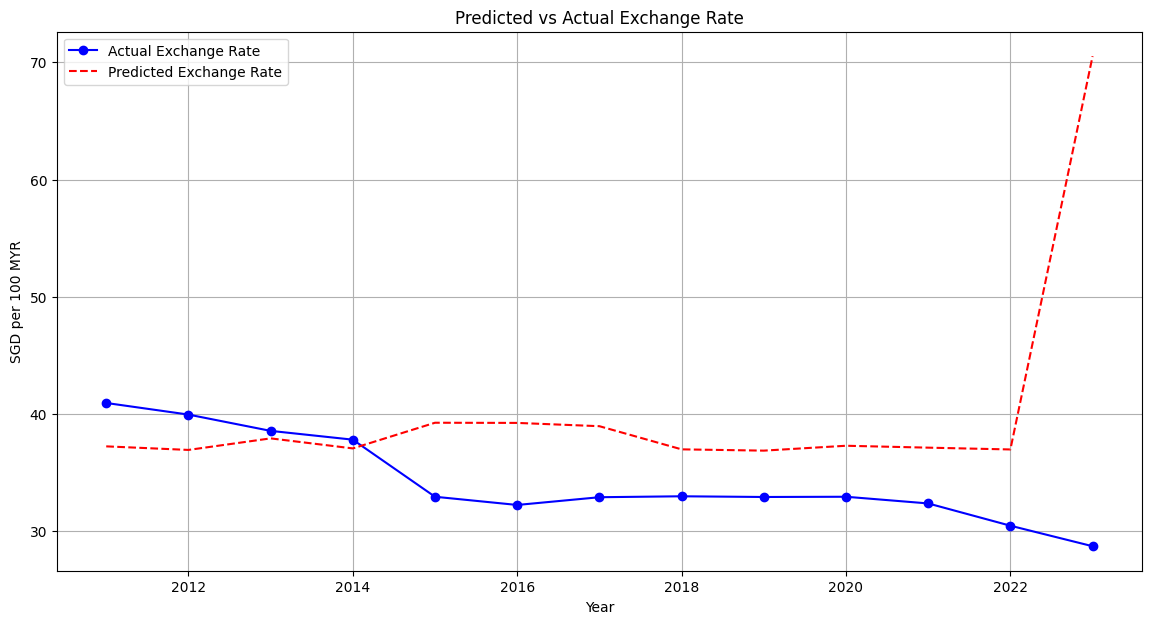

,Employment_to_Population_Rate_Malaysia,Employment_to_Population_Rate_Singapore,GDP_Malaysia,GDP_Singapore,Merchandise_Trade,Relative_Balance,Relative_Debt,Relative_Inflation,Relative_Investment,Relative_Real_Interest,Relative_Receipts,Relative_ppp,SGD_per_100_MYR
Year,,,,,,,,,,,,,
2019.0,63.5,68.3,365177721021.5,376837580397.6,1.6,0.9,2.4,0.9,14.0,1.1,0.9,0.6,32.9
2020.0,62.3,67.4,337456163961.2,348392090695.2,1.6,1.0,2.5,0.2,5.0,1.7,0.9,0.6,32.9
2021.0,63.0,67.9,373832428055.4,423797100521.6,1.4,0.8,2.4,0.9,-13.2,1.5,0.9,0.7,32.4
2022.0,62.9,68.7,407027451714.6,466788426792.0,1.3,1.0,2.3,1.8,6.1,1.0,0.9,0.6,30.5
2023.0,59.0,60.6,39381553250.9,30660387998.5,2.7,-12.5,1.1,0.9,1.8,0.4,1.4,0.6,28.7


In [80]:
dataframes_to_merge = [
    gdp_pivoted,
    employment_pivoted,
    relative_inflation_df,
    relative_Real_Interest_df,
    relative_Merchandise_Trade_df,
    relative_receipts_df,
    relative_ppp_df,
    relative_debt_df,
    relative_balance_df,
    relative_investment_df,
    exchange_rates_cleaned
]

final_df = dataframes_to_merge[0]  # This is your initial dataframe

# Merge each dataframe with the base using 'Year' as the key
for df in dataframes_to_merge[1:]:
    final_df = pd.merge(final_df, df, on='Year', how='outer')

# Initialize KNNImputer
knn_imputer = KNNImputer(n_neighbors=3)

# Make sure to not include 'Year' column in the imputation process
columns_to_impute = final_df.columns.difference(['Year'])
imputed_values = knn_imputer.fit_transform(final_df[columns_to_impute])

# Construct the DataFrame with imputed values and add 'Year' back
final_df_imputed = pd.DataFrame(imputed_values, columns=columns_to_impute, index=final_df.index)
final_df_imputed['Year'] = final_df['Year']

# Set 'Year' back as the index if required
final_df_imputed.set_index('Year', inplace=True)


final_df_imputed.head(20)

X_imputed = final_df_imputed.drop(['SGD_per_100_MYR'], axis=1)  # Drop the target variable
y_imputed = final_df_imputed['SGD_per_100_MYR']

# Split the data into train and test sets
X_train_imputed, X_test_imputed, y_train_imputed, y_test_imputed = train_test_split(X_imputed, y_imputed, test_size=0.2, shuffle=False)

# Define base models
base_models = [
    ('dt_reg', DecisionTreeRegressor()),
    ('svr', SVR()),
    ('rf', RandomForestRegressor()),
    ('knn', KNeighborsRegressor(n_neighbors=5))
]

# Define the meta-learner model
meta_learner = LinearRegression()

# Create the stacking ensemble
stacking_ensemble = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_learner,
    cv=5  # Number of folds in cross-validation
)

# Train the stacking ensemble
stacking_ensemble.fit(X_train_imputed, y_train_imputed)

# Evaluate the model
y_pred_imputed = stacking_ensemble.predict(X_test_imputed)
mse_imputed = mean_squared_error(y_test_imputed, y_pred_imputed)
rmse_imputed = np.sqrt(mse_imputed)

print(f"RMSE: {rmse_imputed}")


# Convert y_test and y_pred to dataframes to use the 'Year' index
y_test_df_imputed = pd.DataFrame(y_test_imputed)
y_test_df_imputed['Predicted'] = pd.Series(y_pred_imputed, index=y_test_df_imputed.index)

# Plot the actual vs predicted exchange rate using 'Year' as the x-axis
plt.figure(figsize=(14, 7))
plt.plot(y_test_df_imputed.index, y_test_df_imputed['SGD_per_100_MYR'], label='Actual Exchange Rate', color='blue', marker='o')
plt.plot(y_test_df_imputed.index, y_test_df_imputed['Predicted'], label='Predicted Exchange Rate', color='red', linestyle='--')
plt.title('Predicted vs Actual Exchange Rate')
plt.xlabel('Year')
plt.ylabel('SGD per 100 MYR')
plt.legend()
plt.grid(True)

# Set x-axis major formatter to format ticks as integers
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.show()
final_df_imputed.tail()

# Excluding 2023 spoiled data

RMSE (excluding 2023): 4.698068201098175


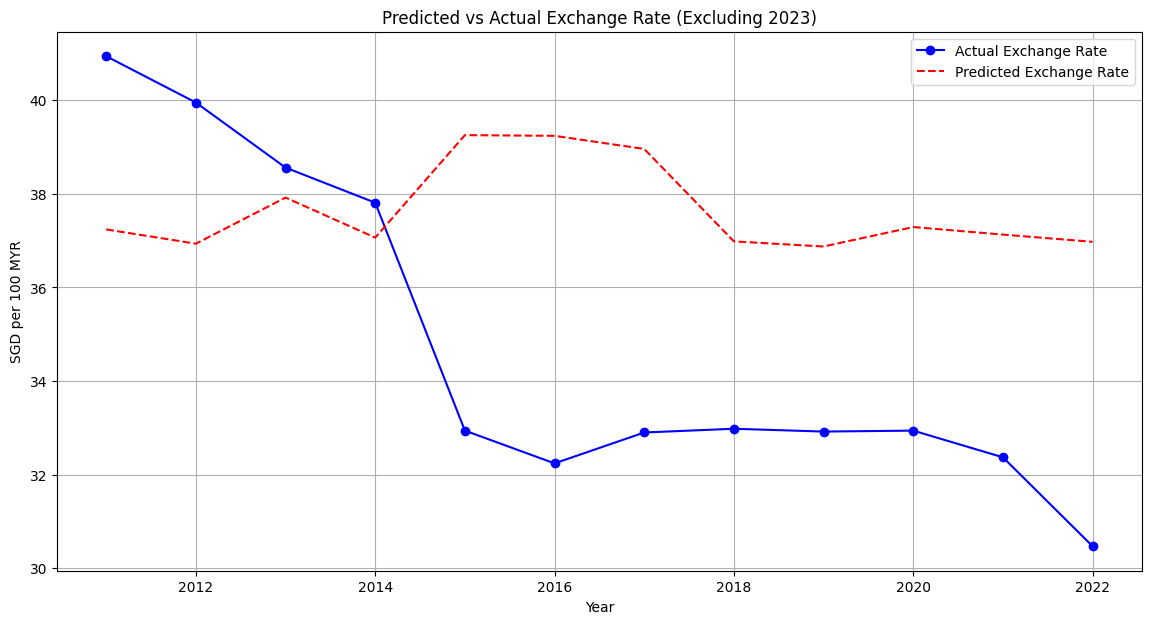

In [81]:
# Filter out the year 2023 from X_test and y_test
X_test_imputed_filtered = X_test_imputed[X_test_imputed.index != 2023]
y_test_imputed_filtered = y_test_imputed[y_test_imputed.index != 2023]

# Make predictions using the filtered test set
y_pred_imputed_filtered = stacking_ensemble.predict(X_test_imputed_filtered)

# Calculate the RMSE excluding the year 2023
mse_imputed_filtered = mean_squared_error(y_test_imputed_filtered, y_pred_imputed_filtered)
rmse_imputed_filtered = np.sqrt(mse_imputed_filtered)

# Print the RMSE for data excluding 2023
print(f"RMSE (excluding 2023): {rmse_imputed_filtered}")

# Convert y_test_filtered and y_pred_filtered to dataframes to use the 'Year' index
y_test_df_imputed_filtered = pd.DataFrame(y_test_imputed_filtered)
y_test_df_imputed_filtered['Predicted'] = pd.Series(y_pred_imputed_filtered, index=y_test_df_imputed_filtered.index)

# Plot the actual vs predicted exchange rate using 'Year' as the x-axis, excluding 2023
plt.figure(figsize=(14, 7))
plt.plot(y_test_df_imputed_filtered.index, y_test_df_imputed_filtered['SGD_per_100_MYR'], label='Actual Exchange Rate', color='blue', marker='o')
plt.plot(y_test_df_imputed_filtered.index, y_test_df_imputed_filtered['Predicted'], label='Predicted Exchange Rate', color='red', linestyle='--')
plt.title('Predicted vs Actual Exchange Rate (Excluding 2023)')
plt.xlabel('Year')
plt.ylabel('SGD per 100 MYR')
plt.legend()
plt.grid(True)

# Set x-axis major formatter to format ticks as integers
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.show()


# Predicting exchange rates with imputed mean values

RMSE: 13.009957218975156


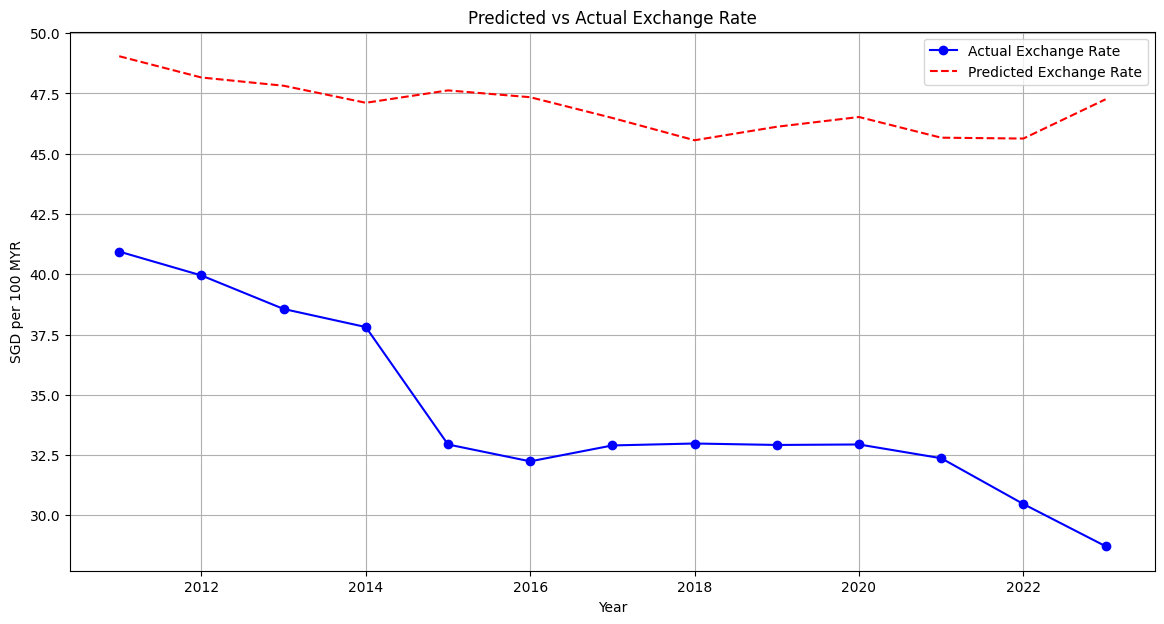

In [82]:
# Start with the first dataframe as the base
final_df = relative_cpi_df

dataframes_imputed_mean = [
    gdp_pivoted,
    employment_pivoted,
    relative_inflation_df,
    relative_Real_Interest_df,
    relative_Merchandise_Trade_df,
    relative_receipts_df,
    relative_ppp_df,
    relative_debt_df,
    relative_balance_df,
    relative_investment_df,
    exchange_rates_cleaned
]

# Merge each dataframe with the base using 'Year' as the key
for df in dataframes_imputed_mean:
    final_df = pd.merge(final_df, df, on='Year', how='outer')

# Initialize the SimpleImputer with mean strategy
mean_imputer = SimpleImputer(strategy='mean')

# Exclude 'Year' from imputation
columns_to_impute = final_df.columns.difference(['Year'])

# Apply the imputer to the DataFrame
final_df_imputed_values = mean_imputer.fit_transform(final_df[columns_to_impute])

# Construct the DataFrame with imputed values and add 'Year' back
final_df_imputed_mean = pd.DataFrame(final_df_imputed_values, columns=columns_to_impute)
final_df_imputed_mean['Year'] = final_df['Year'].values

# Sort the DataFrame by 'Year'
final_df_imputed_mean.sort_values('Year', inplace=True)

# Set 'Year' as the index after sorting
final_df_imputed_mean.set_index('Year', inplace=True)

X_imputer_mean = final_df_imputed_mean.drop(['SGD_per_100_MYR'], axis=1)
y_imputer_mean = final_df_imputed_mean['SGD_per_100_MYR']

# Split the data into train and test sets
X_train_imputer_mean, X_test_imputer_mean, y_train_imputer_mean, y_test_imputer_mean = train_test_split(
    X_imputer_mean, y_imputer_mean, test_size=0.2, shuffle=False)

# Define base models
base_models = [
    ('dt_reg', DecisionTreeRegressor()),
    ('svr', SVR()),
    ('rf', RandomForestRegressor()),
    ('knn', KNeighborsRegressor(n_neighbors=5))
]

# Define the meta-learner model
meta_learner = LinearRegression()

# Create the stacking ensemble
stacking_ensemble_imputer_mean = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_learner,
    cv=5  # Number of folds in cross-validation
)

# Train the stacking ensemble
stacking_ensemble_imputer_mean.fit(X_train_imputer_mean, y_train_imputer_mean)

# Evaluate the model
y_pred_imputer_mean = stacking_ensemble_imputer_mean.predict(X_test_imputer_mean)
mse_imputer_mean = mean_squared_error(y_test_imputer_mean, y_pred_imputer_mean)
rmse_imputer_mean = np.sqrt(mse_imputer_mean)

print(f"RMSE: {rmse_imputer_mean}")

# Create a DataFrame to hold actual and predicted values along with Year for plotting
results_df = pd.DataFrame({
    'Year': y_test_imputer_mean.index,
    'Actual Exchange Rate': y_test_imputer_mean.values,
    'Predicted Exchange Rate': y_pred_imputer_mean
})

# Ensure the results DataFrame is sorted by Year
results_df.sort_values('Year', inplace=True)

# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(results_df['Year'], results_df['Actual Exchange Rate'], label='Actual Exchange Rate', color='blue', marker='o')
plt.plot(results_df['Year'], results_df['Predicted Exchange Rate'], label='Predicted Exchange Rate', color='red', linestyle='--')
plt.title('Predicted vs Actual Exchange Rate')
plt.xlabel('Year')
plt.ylabel('SGD per 100 MYR')
plt.legend()
plt.grid(True)

# Set x-axis major formatter to format ticks as integers
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.show()

# Macro Economics Ensemble Model

RMSE: 12.606656948435887


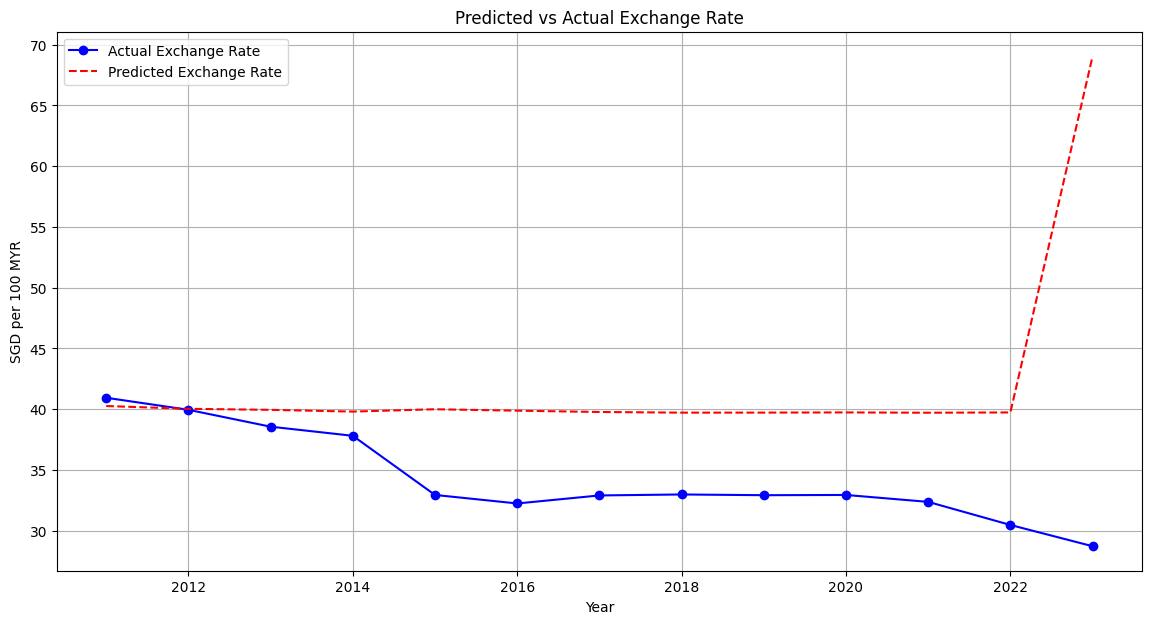

RMSE (excluding 2023): 6.049121511642556


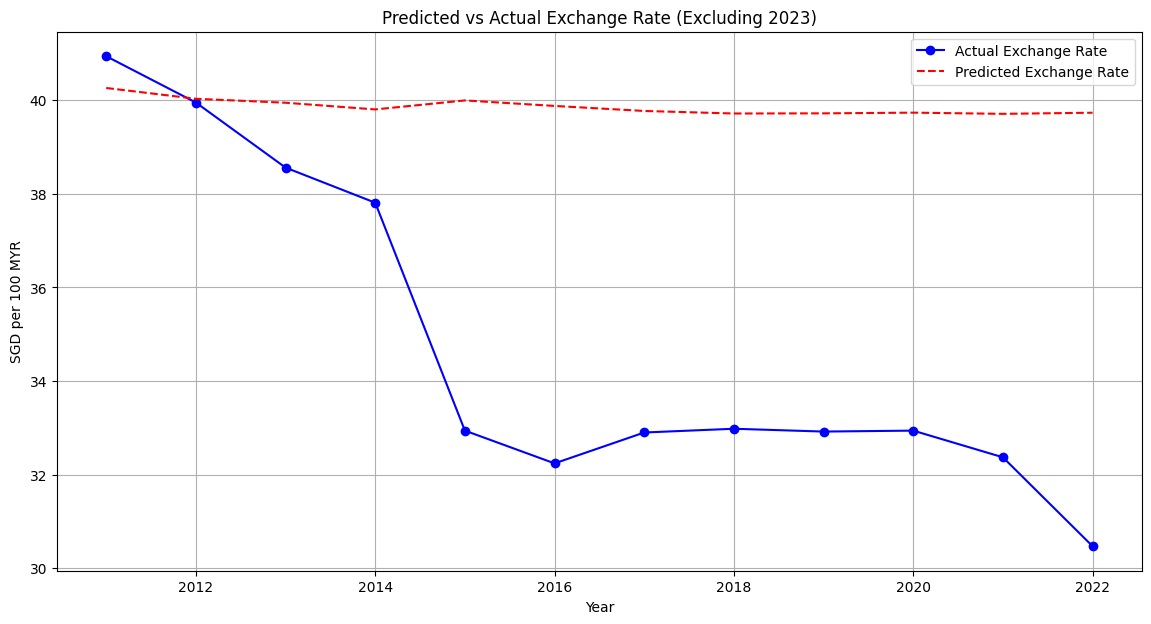

In [83]:
dataframes_to_merge_macro = [
    gdp_pivoted,
    employment_pivoted,
    relative_inflation_df,
    relative_Real_Interest_df,
    exchange_rates_cleaned
]

final_df_macro = dataframes_to_merge_macro[0]

# Merge each dataframe with the base using 'Year' as the key
for df in dataframes_to_merge_macro[1:]:
    final_df_macro = pd.merge(final_df_macro, df, on='Year', how='outer')

# Initialize KNNImputer
knn_imputer_macro = KNNImputer(n_neighbors=3)

# Make sure to not include 'Year' column in the imputation process
columns_to_impute_macro = final_df_macro.columns.difference(['Year'])
imputed_values_macro = knn_imputer_macro.fit_transform(final_df_macro[columns_to_impute_macro])

# Construct the DataFrame with imputed values and add 'Year' back
final_df_imputed_macro = pd.DataFrame(imputed_values_macro, columns=columns_to_impute_macro, index=final_df_macro.index)
final_df_imputed_macro['Year'] = final_df_macro['Year']

# Set 'Year' back as the index if required
final_df_imputed_macro.set_index('Year', inplace=True)


final_df_imputed_macro.head(20)

X_imputed_macro = final_df_imputed_macro.drop(['SGD_per_100_MYR'], axis=1)  # Drop the target variable
y_imputed_macro = final_df_imputed_macro['SGD_per_100_MYR']

# Split the data into train and test sets
X_train_imputed_macro, X_test_imputed_macro, y_train_imputed_macro, y_test_imputed_macro = train_test_split(X_imputed_macro, y_imputed_macro, test_size=0.2, shuffle=False)

# Define base models
base_models = [
    ('dt_reg', DecisionTreeRegressor()),
    ('svr', SVR()),
    ('rf', RandomForestRegressor()),
    ('knn', KNeighborsRegressor(n_neighbors=5))
]

# Define the meta-learner model
meta_learner = LinearRegression()

# Create the stacking ensemble
stacking_ensemble_macro = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_learner,
    cv=5  # Number of folds in cross-validation
)

# Train the stacking ensemble
stacking_ensemble_macro.fit(X_train_imputed_macro, y_train_imputed_macro)

# Evaluate the model
y_pred_imputed_macro = stacking_ensemble_macro.predict(X_test_imputed_macro)
mse_imputed_macro = mean_squared_error(y_test_imputed_macro, y_pred_imputed_macro)
rmse_imputed_macro = np.sqrt(mse_imputed_macro)

print(f"RMSE: {rmse_imputed_macro}")


# Convert y_test and y_pred to dataframes to use the 'Year' index
y_test_df_imputed_macro = pd.DataFrame(y_test_imputed_macro)
y_test_df_imputed_macro['Predicted'] = pd.Series(y_pred_imputed_macro, index=y_test_df_imputed_macro.index)

# Plot the actual vs predicted exchange rate using 'Year' as the x-axis
plt.figure(figsize=(14, 7))
plt.plot(y_test_df_imputed_macro.index, y_test_df_imputed_macro['SGD_per_100_MYR'], label='Actual Exchange Rate', color='blue', marker='o')
plt.plot(y_test_df_imputed_macro.index, y_test_df_imputed_macro['Predicted'], label='Predicted Exchange Rate', color='red', linestyle='--')
plt.title('Predicted vs Actual Exchange Rate')
plt.xlabel('Year')
plt.ylabel('SGD per 100 MYR')
plt.legend()
plt.grid(True)

# Set x-axis major formatter to format ticks as integers
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.show()
final_df_imputed_macro.tail()

# Filter out the year 2023 from X_test and y_test
X_test_imputed_filtered_macro = X_test_imputed_macro[X_test_imputed_macro.index != 2023]
y_test_imputed_filtered_macro = y_test_imputed_macro[y_test_imputed_macro.index != 2023]

# Make predictions using the filtered test set
y_pred_imputed_filtered_macro = stacking_ensemble_macro.predict(X_test_imputed_filtered_macro)

# Calculate the RMSE excluding the year 2023
mse_imputed_filtered_macro = mean_squared_error(y_test_imputed_filtered_macro, y_pred_imputed_filtered_macro)
rmse_imputed_filtered_macro = np.sqrt(mse_imputed_filtered_macro)

# Print the RMSE for data excluding 2023
print(f"RMSE (excluding 2023): {rmse_imputed_filtered_macro}")

# Convert y_test_filtered and y_pred_filtered to dataframes to use the 'Year' index
y_test_df_imputed_filtered_macro = pd.DataFrame(y_test_imputed_filtered_macro)
y_test_df_imputed_filtered_macro['Predicted'] = pd.Series(y_pred_imputed_filtered_macro, index=y_test_df_imputed_filtered_macro.index)

# Plot the actual vs predicted exchange rate using 'Year' as the x-axis, excluding 2023
plt.figure(figsize=(14, 7))
plt.plot(y_test_df_imputed_filtered_macro.index, y_test_df_imputed_filtered_macro['SGD_per_100_MYR'], label='Actual Exchange Rate', color='blue', marker='o')
plt.plot(y_test_df_imputed_filtered_macro.index, y_test_df_imputed_filtered_macro['Predicted'], label='Predicted Exchange Rate', color='red', linestyle='--')
plt.title('Predicted vs Actual Exchange Rate (Excluding 2023)')
plt.xlabel('Year')
plt.ylabel('SGD per 100 MYR')
plt.legend()
plt.grid(True)

# Set x-axis major formatter to format ticks as integers
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.show()

# Trading and Investing Ensemble Model

RMSE: 17.70424779708323


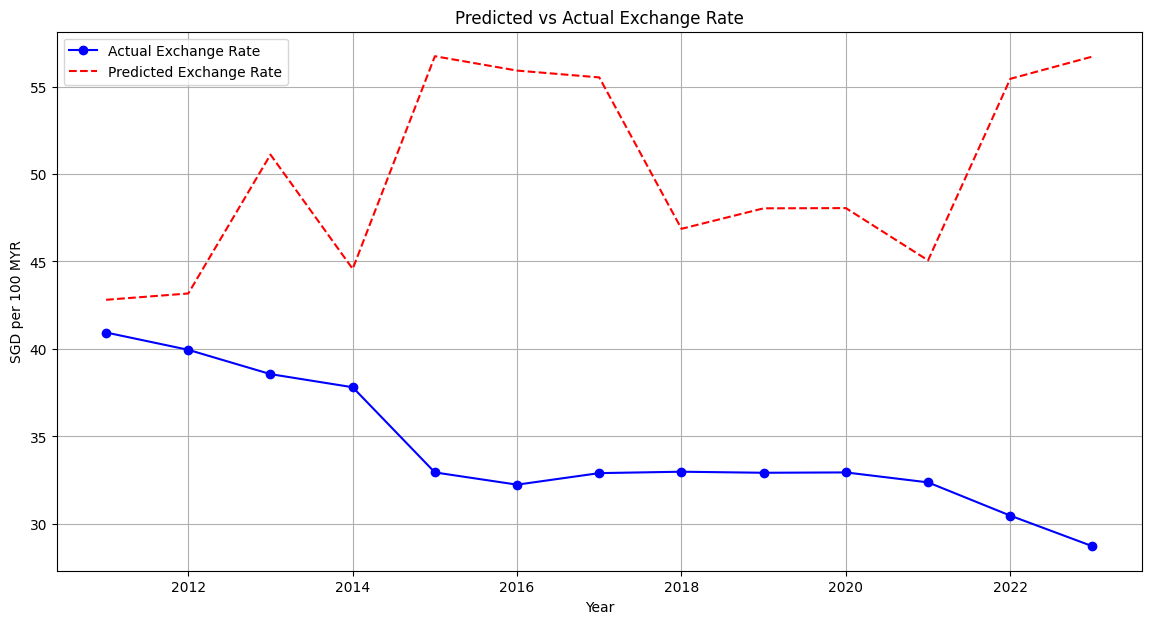

RMSE (excluding 2023): 16.56003804453632


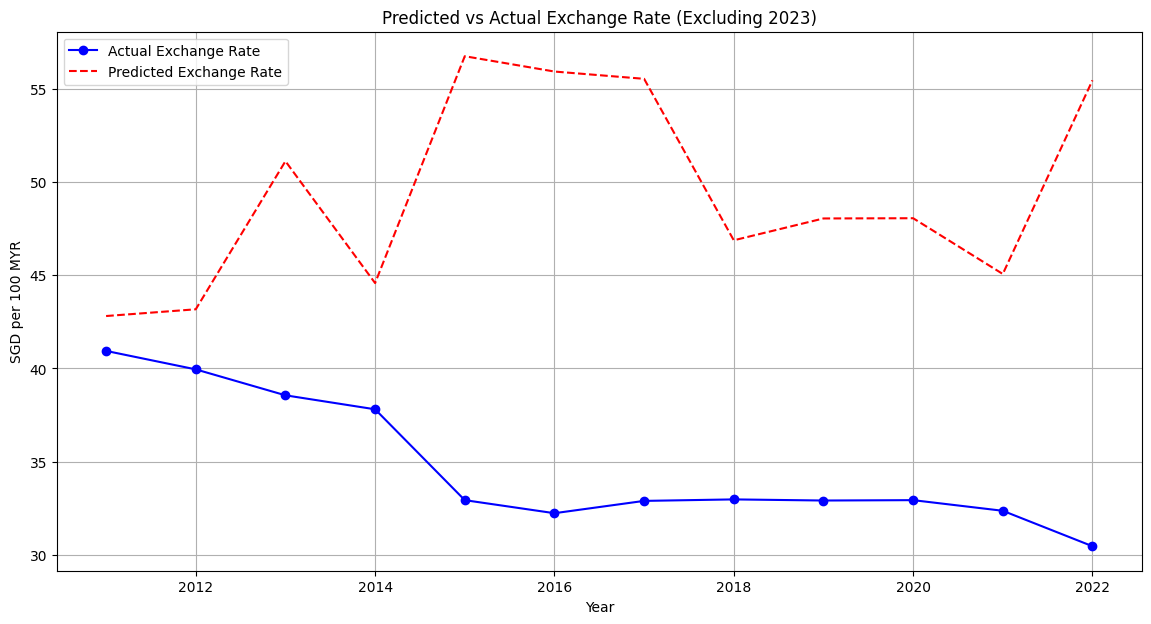

In [84]:
dataframes_to_merge_tradeinvest = [
    relative_Merchandise_Trade_df,
    relative_balance_df,
    relative_investment_df,
    exchange_rates_cleaned
]

final_df_tradeinvest = dataframes_to_merge_tradeinvest[0]

# Merge each dataframe with the base using 'Year' as the key
for df in dataframes_to_merge_tradeinvest[1:]:
    final_df_tradeinvest = pd.merge(final_df_tradeinvest, df, on='Year', how='outer')

# Initialize KNNImputer
knn_imputer_tradeinvest = KNNImputer(n_neighbors=3)

# Make sure to not include 'Year' column in the imputation process
columns_to_impute_tradeinvest = final_df_tradeinvest.columns.difference(['Year'])
imputed_values_tradeinvest = knn_imputer_tradeinvest.fit_transform(final_df_tradeinvest[columns_to_impute_tradeinvest])

# Construct the DataFrame with imputed values and add 'Year' back
final_df_imputed_tradeinvest = pd.DataFrame(imputed_values_tradeinvest, columns=columns_to_impute_tradeinvest, index=final_df_tradeinvest.index)
final_df_imputed_tradeinvest['Year'] = final_df_tradeinvest['Year']

# Set 'Year' back as the index if required
final_df_imputed_tradeinvest.set_index('Year', inplace=True)


final_df_imputed_tradeinvest.head(20)

X_imputed_tradeinvest = final_df_imputed_tradeinvest.drop(['SGD_per_100_MYR'], axis=1)  # Drop the target variable
y_imputed_tradeinvest = final_df_imputed_tradeinvest['SGD_per_100_MYR']  # This is what you want to predict

# Split the data into train and test sets
X_train_imputed_tradeinvest, X_test_imputed_tradeinvest, y_train_imputed_tradeinvest, y_test_imputed_tradeinvest = train_test_split(X_imputed_tradeinvest, y_imputed_tradeinvest, test_size=0.2, shuffle=False)

# Define base models
base_models = [
    ('dt_reg', DecisionTreeRegressor()),
    ('svr', SVR()),
    ('rf', RandomForestRegressor()),
    ('knn', KNeighborsRegressor(n_neighbors=5))
]

# Define the meta-learner model
meta_learner = LinearRegression()

# Create the stacking ensemble
stacking_ensemble_tradeinvest = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_learner,
    cv=5  # Number of folds in cross-validation
)

# Train the stacking ensemble
stacking_ensemble_tradeinvest.fit(X_train_imputed_tradeinvest, y_train_imputed_tradeinvest)

# Evaluate the model
y_pred_imputed_tradeinvest = stacking_ensemble_tradeinvest.predict(X_test_imputed_tradeinvest)
mse_imputed_tradeinvest = mean_squared_error(y_test_imputed_tradeinvest, y_pred_imputed_tradeinvest)
rmse_imputed_tradeinvest = np.sqrt(mse_imputed_tradeinvest)

print(f"RMSE: {rmse_imputed_tradeinvest}")


# Convert y_test and y_pred to dataframes to use the 'Year' index
y_test_df_imputed_tradeinvest = pd.DataFrame(y_test_imputed_tradeinvest)
y_test_df_imputed_tradeinvest['Predicted'] = pd.Series(y_pred_imputed_tradeinvest, index=y_test_df_imputed_tradeinvest.index)

# Plot the actual vs predicted exchange rate using 'Year' as the x-axis
plt.figure(figsize=(14, 7))
plt.plot(y_test_df_imputed_tradeinvest.index, y_test_df_imputed_tradeinvest['SGD_per_100_MYR'], label='Actual Exchange Rate', color='blue', marker='o')
plt.plot(y_test_df_imputed_tradeinvest.index, y_test_df_imputed_tradeinvest['Predicted'], label='Predicted Exchange Rate', color='red', linestyle='--')
plt.title('Predicted vs Actual Exchange Rate')
plt.xlabel('Year')
plt.ylabel('SGD per 100 MYR')
plt.legend()
plt.grid(True)

# Set x-axis major formatter to format ticks as integers
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.show()
final_df_imputed_tradeinvest.tail()


# Filter out the year 2023 from X_test and y_test
X_test_imputed_filtered_tradeinvest = X_test_imputed_tradeinvest[X_test_imputed_tradeinvest.index != 2023]
y_test_imputed_filtered_tradeinvest = y_test_imputed_tradeinvest[y_test_imputed_tradeinvest.index != 2023]

# Make predictions using the filtered test set
y_pred_imputed_filtered_tradeinvest = stacking_ensemble_tradeinvest.predict(X_test_imputed_filtered_tradeinvest)

# Calculate the RMSE excluding the year 2023
mse_imputed_filtered_tradeinvest = mean_squared_error(y_test_imputed_filtered_tradeinvest, y_pred_imputed_filtered_tradeinvest)
rmse_imputed_filtered_tradeinvest = np.sqrt(mse_imputed_filtered_tradeinvest)

# Print the RMSE for data excluding 2023
print(f"RMSE (excluding 2023): {rmse_imputed_filtered_tradeinvest}")

# Convert y_test_filtered and y_pred_filtered to dataframes to use the 'Year' index
y_test_df_imputed_filtered_tradeinvest = pd.DataFrame(y_test_imputed_filtered_tradeinvest)
y_test_df_imputed_filtered_tradeinvest['Predicted'] = pd.Series(y_pred_imputed_filtered_tradeinvest, index=y_test_df_imputed_filtered_tradeinvest.index)

# Plot the actual vs predicted exchange rate using 'Year' as the x-axis, excluding 2023
plt.figure(figsize=(14, 7))
plt.plot(y_test_df_imputed_filtered_tradeinvest.index, y_test_df_imputed_filtered_tradeinvest['SGD_per_100_MYR'], label='Actual Exchange Rate', color='blue', marker='o')
plt.plot(y_test_df_imputed_filtered_tradeinvest.index, y_test_df_imputed_filtered_tradeinvest['Predicted'], label='Predicted Exchange Rate', color='red', linestyle='--')
plt.title('Predicted vs Actual Exchange Rate (Excluding 2023)')
plt.xlabel('Year')
plt.ylabel('SGD per 100 MYR')
plt.legend()
plt.grid(True)

# Set x-axis major formatter to format ticks as integers
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.show()

# Economic Health Ensemble Model

RMSE: 12.887101554074356


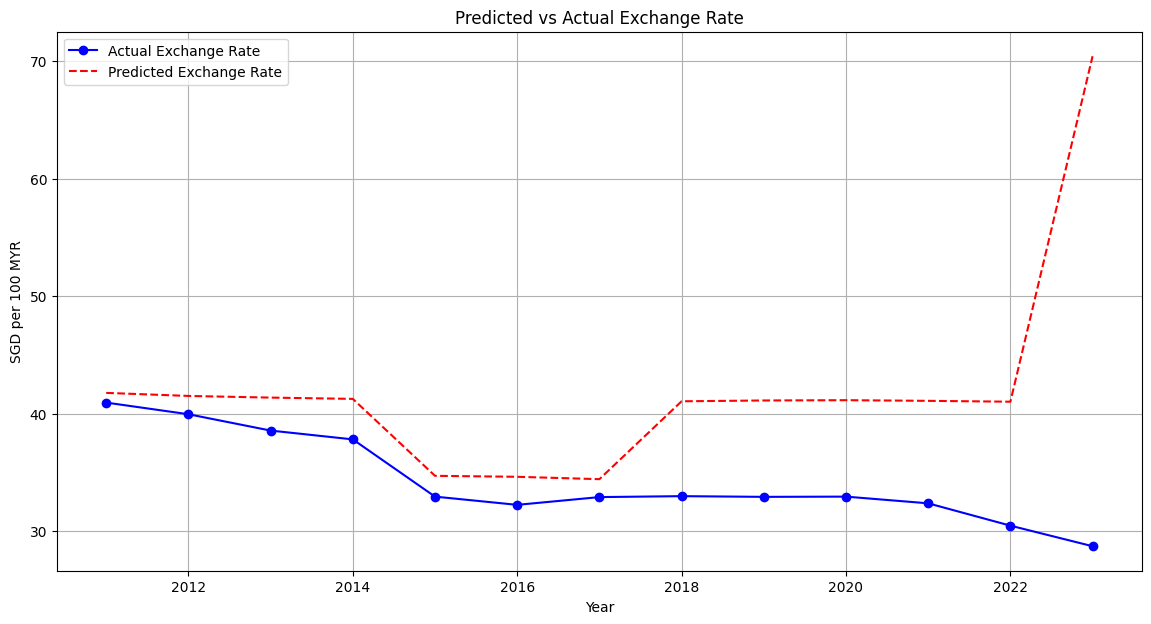

RMSE (excluding 2023): 5.922672251128259


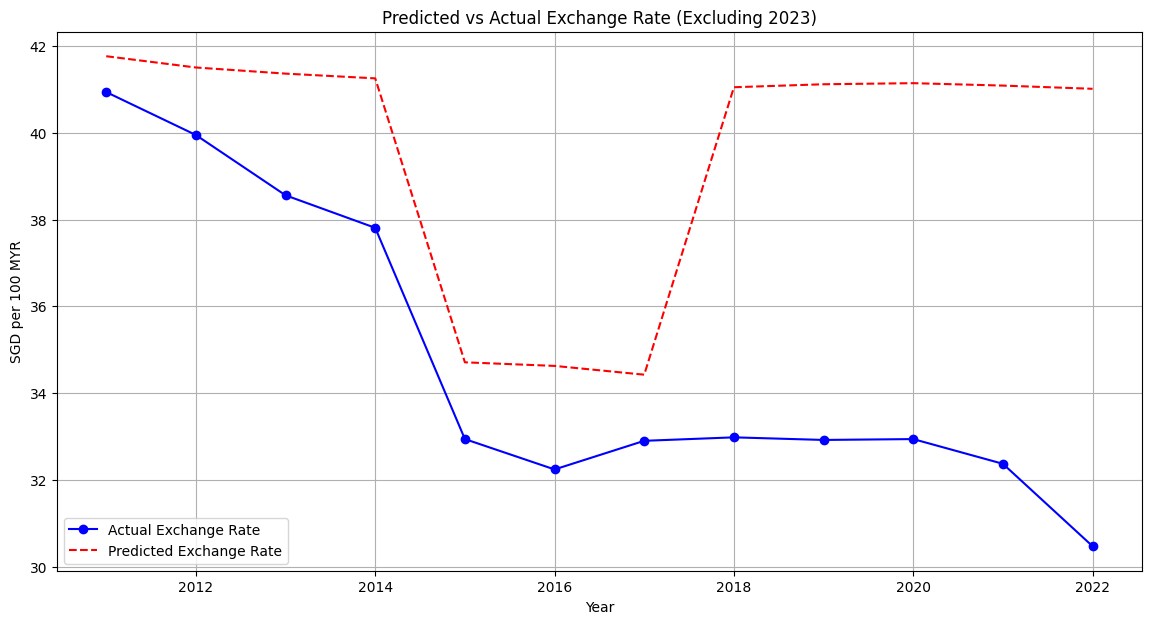

In [85]:
dataframes_to_merge_eco_health = [
    gdp_pivoted,
    employment_pivoted,
    relative_balance_df,
    exchange_rates_cleaned  
]

final_df_eco_health = dataframes_to_merge_eco_health[0]

for df in dataframes_to_merge_eco_health[1:]:
    final_df_eco_health = pd.merge(final_df_eco_health, df, on='Year', how='outer')

final_df_eco_health = dataframes_to_merge_eco_health[0]  

for df in dataframes_to_merge_eco_health[1:]:
    final_df_eco_health = pd.merge(final_df_eco_health, df, on='Year', how='outer')

knn_imputer_eco_health = KNNImputer(n_neighbors=3)

columns_to_impute_eco_health = final_df_eco_health.columns.difference(['Year'])
imputed_values_eco_health = knn_imputer_eco_health.fit_transform(final_df_eco_health[columns_to_impute_eco_health])

final_df_imputed_eco_health = pd.DataFrame(imputed_values_eco_health, columns=columns_to_impute_eco_health, index=final_df_eco_health.index)
final_df_imputed_eco_health['Year'] = final_df_eco_health['Year']

final_df_imputed_eco_health.set_index('Year', inplace=True)

final_df_imputed_eco_health.head(1)

X_imputed_eco_health = final_df_imputed_eco_health.drop(['SGD_per_100_MYR'], axis=1)  # Drop the target variable
y_imputed_eco_health = final_df_imputed_eco_health['SGD_per_100_MYR']  # This is what you want to predict

X_train_imputed_eco_health, X_test_imputed_eco_health, y_train_imputed_eco_health, y_test_imputed_eco_health = train_test_split(X_imputed_eco_health, y_imputed_eco_health, test_size=0.2, shuffle=False)

base_models = [
    ('dt_reg', DecisionTreeRegressor()),
    ('svr', SVR()),
    ('rf', RandomForestRegressor()),
    ('knn', KNeighborsRegressor(n_neighbors=5))
  
]

meta_learner = LinearRegression()

stacking_ensemble_eco_health = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_learner,
    cv=5  
)

stacking_ensemble_eco_health.fit(X_train_imputed_eco_health, y_train_imputed_eco_health)

y_pred_imputed_eco_health = stacking_ensemble_eco_health.predict(X_test_imputed_eco_health)
mse_imputed_eco_health = mean_squared_error(y_test_imputed_eco_health, y_pred_imputed_eco_health)
rmse_imputed_eco_health = np.sqrt(mse_imputed_eco_health)

print(f"RMSE: {rmse_imputed_eco_health}")

y_test_df_imputed_eco_health = pd.DataFrame(y_test_imputed_eco_health)
y_test_df_imputed_eco_health['Predicted'] = pd.Series(y_pred_imputed_eco_health, index=y_test_df_imputed_eco_health.index)

plt.figure(figsize=(14, 7))
plt.plot(y_test_df_imputed_eco_health.index, y_test_df_imputed_eco_health['SGD_per_100_MYR'], label='Actual Exchange Rate', color='blue', marker='o')
plt.plot(y_test_df_imputed_eco_health.index, y_test_df_imputed_eco_health['Predicted'], label='Predicted Exchange Rate', color='red', linestyle='--')
plt.title('Predicted vs Actual Exchange Rate')
plt.xlabel('Year')
plt.ylabel('SGD per 100 MYR')
plt.legend()
plt.grid(True)

ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.show()

X_test_imputed_filtered_eco_health = X_test_imputed_eco_health[X_test_imputed_eco_health.index != 2023]
y_test_imputed_filtered_eco_health = y_test_imputed_eco_health[y_test_imputed_eco_health.index != 2023]

y_pred_imputed_filtered_eco_health = stacking_ensemble_eco_health.predict(X_test_imputed_filtered_eco_health)

mse_imputed_filtered_eco_health = mean_squared_error(y_test_imputed_filtered_eco_health, y_pred_imputed_filtered_eco_health)
rmse_imputed_filtered_eco_health = np.sqrt(mse_imputed_filtered_eco_health)

print(f"RMSE (excluding 2023): {rmse_imputed_filtered_eco_health}")

y_test_df_imputed_filtered_eco_health = pd.DataFrame(y_test_imputed_filtered_eco_health)
y_test_df_imputed_filtered_eco_health['Predicted'] = pd.Series(y_pred_imputed_filtered_eco_health, index=y_test_df_imputed_filtered_eco_health.index)

plt.figure(figsize=(14, 7))
plt.plot(y_test_df_imputed_filtered_eco_health.index, y_test_df_imputed_filtered_eco_health['SGD_per_100_MYR'], label='Actual Exchange Rate', color='blue', marker='o')
plt.plot(y_test_df_imputed_filtered_eco_health.index, y_test_df_imputed_filtered_eco_health['Predicted'], label='Predicted Exchange Rate', color='red', linestyle='--')
plt.title('Predicted vs Actual Exchange Rate (Excluding 2023)')
plt.xlabel('Year')
plt.ylabel('SGD per 100 MYR')
plt.legend()
plt.grid(True)

ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.show()